In [1]:
from orpe import ProvenanceExplorer

In [2]:
op1 = ProvenanceExplorer("../collaborative_demo_t1.openrefine.db")

In [3]:
op2 = ProvenanceExplorer("../collaborative_demo_t2.openrefine.db")

In [4]:
parallel_workflow = op1.parallel_workflow()
process_nodes,parallel_graph,gv_string = op1.gv_template(parallel_workflow)
print(parallel_graph.nodes)

2
0
['state_1', 'col0_0', 'col0_1', 'state_2', 'col1_0', 'col1_1', 'state_3', 'col2_0', 'col2_1', 'state_4', 'col1_2', 'state_5', 'col5_0', 'col4_0', 'state_6', 'col4_1', 'state_7', 'col5_1', 'state_9', 'col2_2']


In [5]:
source_nodes = [node for node, indegree in dict(parallel_graph.in_degree(parallel_graph.nodes())).items() if indegree == 0]
source_nodes

['col0_0', 'col1_0', 'col2_0']

In [6]:
# source to sink comparison
ps1 = []
for ss in source_nodes:
    pt = op1.parallel_state(parallel_graph,ss)
    #print(pt)
    ps1.append(pt)

ps2 = []
pw2 = op2.parallel_workflow()
pn2,pg2,gv2 = op2.gv_template(parallel_workflow)
sn2 = [node for node, indegree in dict(pg2.in_degree(pg2.nodes())).items() if indegree == 0]
for ss in sn2:
    pt = op1.parallel_state(parallel_graph,ss)
    #print(pt)
    ps2.append(pt)

('col0_0', 'col0_1')
('col1_0', 'col4_1')
('col1_0', 'col5_1')
('col2_0', 'col2_2')
('col0_0', 'col0_1')
('col1_0', 'col4_1')
('col1_0', 'col5_1')
('col2_0', 'col2_2')


In [7]:
import networkx as nx

all_par = []
all_col = []
for ps in ps1:
    print("PS0: ",ps[0])
    print("PS1: ",ps[1])
    ps_dag = nx.DiGraph()
    ps_node = nx.DiGraph()
    for psd in ps[1]:
        #print(psd)        
        for i,psx in enumerate(psd[0][:-1]):
            ps_dag.add_edge(psd[0][i],psd[0][i+1])
        for i,psx in enumerate(psd[1][:-1]):
            ps_node.add_edge(psd[1][i],psd[1][i+1])            
        if len(psd[0])==1:
            ps_dag.add_node(psd[0][0])
    mutual_states = []
    mutual_nodes = []
    if len(ps_dag.edges)>0:
        for dfs in list(nx.dfs_edges(ps_dag)):
            if dfs[0] not in mutual_states:
                mutual_states.append(dfs[0])
            if dfs[1] not in mutual_states:
                mutual_states.append(dfs[1])
        print("DFS:",mutual_states)
        all_par.append(mutual_states)
    else:
        print("DFS:",ps_dag.nodes)
        all_par.append(list(ps_dag.nodes))
    for dfs in list(nx.dfs_edges(ps_node)):
        if dfs[0] not in mutual_nodes:
            mutual_nodes.append(dfs[0])
        if dfs[1] not in mutual_nodes:
            mutual_nodes.append(dfs[1])    
    all_col.append(mutual_nodes)    


PS0:  [[{'op': 'core/text-transform', 'engineConfig': {'facets': [], 'mode': 'row-based'}, 'columnName': 'Book Title', 'expression': "value.replace(/\\s+/,' ')", 'onError': 'keep-original', 'repeat': False, 'repeatCount': 10, 'description': "Text transform on cells in column Book Title using expression value.replace(/\\s+/,' ')"}]]
PS1:  [(['state_1'], ['col0_0', 'col0_1'])]
DFS: ['state_1']
PS0:  [[{'op': 'core/text-transform', 'engineConfig': {'facets': [], 'mode': 'row-based'}, 'columnName': 'Author', 'expression': "value.replace(/\\s+/,' ')", 'onError': 'keep-original', 'repeat': False, 'repeatCount': 10, 'description': "Text transform on cells in column Author using expression value.replace(/\\s+/,' ')"}, {'op': 'core/mass-edit', 'engineConfig': {'facets': [], 'mode': 'row-based'}, 'columnName': 'Author', 'expression': 'value', 'edits': [{'from': [' P. Kyle Stanford'], 'fromBlank': False, 'fromError': False, 'to': 'Stanford, P. Kyle'}], 'description': 'Mass edit cells in column Au

In [8]:
all_par,all_col

([['state_1'],
  ['state_2', 'state_4', 'state_5', 'state_6', 'state_7'],
  ['state_3', 'state_9']],
 [['col0_0', 'col0_1'],
  ['col1_0', 'col1_1', 'col1_2', 'col4_0', 'col4_1', 'col5_0', 'col5_1'],
  ['col2_0', 'col2_1', 'col2_2']])

In [9]:
for x in all_par:
    for y in x:
        sid = int(y.split("state_")[-1])
        snapshot_pd = op1.get_snapshot_at_state(sid)
        print(snapshot_pd)

get_values_state 8
                      Book Title                     Author           Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  ( 1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  ( 1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. Kyle Stanford, 2, 1)  ( 2006, 2, 2)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)  ( 1992, 3, 2)   

          Entrance Date  
0    (1996-02-01, 0, 3)  
1    (2003-12-31, 1, 3)  
2  (Feb, 29 2008, 2, 3)  
3    (2010-31-01, 3, 3)  
get_values_state 7
                      Book Title                     Author           Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  ( 1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  ( 1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. Kyle Stanford, 2, 1)  ( 2006, 2, 2)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)  ( 1992, 3, 2)   

          Entrance Date  
0    (1996-02-01, 0, 3) 

In [10]:
# transform dcm
import logging 
import pandas as pd

logging.basicConfig(level=logging.DEBUG)
#logging.basicConfig(level=logging.INFO)

class TransformDCM():
    def __init__(self,trace):
        self.trace = trace
        self.source = []
        self.dataset = []
        self.state = []
        self.array = []
        self.column = []
        self.row = []
        self.cell = []
        self.cell_values = []
        self.column_position = []
        self.row_position = []
        
        self.value_derived_from = []        
        self.col_derived_from = []
        self.state_derived_from = []
        self.col_dependency = []
        self.state_detail = []
        
        self.pd_index = None
        
        self.source_id = 0
        self.dataset_id = 0
        self.array_id = 0
        self.col_id = 0
        self.row_id = 0
        self.cell_id = 0
        self.value_id = 0
        self.state_id = -1
        self.col_pos_id = 0
        self.row_pos_id = 0
        
        self.col_names_coll = set()
        
        
        self.curr_df = None
        self.curr_col = None
        self.curr_row = None
        self.curr_index = None
        
        self.curr_row_pos = {}
        self.curr_col_pos = {}
        self.curr_col_schema = []
        self.curr_row_list = []
        
        self.curr_state = 0            
        
    
    def render_curr_df(self):
        pass
    
    def render_col(self):
        pass
    
    def render_row(self):
        pass
        
    
    def init_df(self,df):
        self.pd_index = pd.DataFrame(np.empty(df.shape),dtype=object)    
        self.col_names = df.columns
        
        for i,x in enumerate(df.to_records()):
            jj = 0
            #print(i)
            for j,y in enumerate(x):
                #print(j)
                if j==0:
                    continue
                
                self.cell.append((self.cell_id,jj,self.row_id))
                self.cell_values.append((self.value_id,self.cell_id,self.state_id,y[0],-1))
                #print(self.pd_index.loc[i,jj])
                self.pd_index.loc[i,jj] = (self.cell_id,self.value_id,i,jj) 
                
                self.value_derived_from.append((self.cell_id,self.state_id,-1))

                self.cell_id+=1
                self.value_id+=1
                if i == 0:
                    if jj == 0:
                        prev_j = -1
                    
                    
                    self.column.append((self.col_id,self.array_id))                    
                    self.column_position.append((self.col_pos_id,self.col_id,self.state_id,self.col_names[jj],prev_j,-1))
                    self.col_names_coll.add(self.col_names[jj])
                    self.curr_col_schema.append((self.col_names[jj],jj,self.col_id,prev_j))
                    self.curr_col_pos[self.col_id] = (self.col_pos_id,prev_j)
                    prev_j = jj
                    self.col_pos_id+=1                    
                    self.col_id+=1    
                jj+=1
            if i == 0:
                prev_i = -1
                
            self.row.append((self.row_id,self.array_id))            
            self.row_position.append((self.row_pos_id,self.row_id,self.state_id,prev_i,-1))
            self.curr_row_pos[self.row_id] = (self.row_pos_id,prev_i)
            self.curr_row_list.append(self.row_pos_id)
            prev_i = self.row_id
            self.row_id+=1       
            self.row_pos_id+=1            
        
        """            
        col_id = np.where(df.columns==col.name)[0][0]
        columns.append((col_id,self.array_id))
        #temp_col = []
        for i,x in enumerate(col):
            if not row_processed:
                rows.append((i,array_id))
            #temp_col.append((cell_id,col_id,i))
            cells.append((cell_id,col_id,i))
            cell_values.append((value_id,cell_id,state_id,x,-1))
            pd_index.loc[i,col_id] = (cell_id,value_id,col_id,i)        
            cell_id+=1
            value_id+=1
            #print(i,col_id)
        row_processed = True        
        """
    
    def init_dataset(self,tt):
        logging.debug("init dataset")
        # get filename from trace        
        df = tt[5]
        code = tt[6]
        self.source.append((self.source_id,code,"dataframe"))
        self.dataset.append((self.dataset_id,self.source_id))
        self.array.append((self.array_id,self.dataset_id))
        # state creation
        
        prev_state_id = self.state_id
        self.state_id+=1        
        self.state.append((self.state_id,prev_state_id))            
        
        # generate column, row, cell
        self.init_df(df)
        self.state_id+=1        

        
        #self.state_id+=1
        #self.array_id+=1
        #self.dataset_id+=1
        #self.source_id+=1
        
    def init_dataset_df(self,df,state_ss={'op':"initial"},fname=None):
        logging.debug("init dataset")
        self.source.append((self.source_id,fname,"dataframe"))
        self.dataset.append((self.dataset_id,self.source_id))
        self.array.append((self.array_id,self.dataset_id))
        # state creation
                
        # generate column, row, cell
        self.init_df(df)       

        prev_state_id = self.state_id
        self.state_id+=1
        self.state.append((self.state_id,prev_state_id))
        self.state_detail.append((prev_state_id,state_ss))
    
    def change_column_schema(self,prev_df,now_df):
        #old_col = list(self.curr_col)  
        old_col = list(prev_df.columns)
        now_col = list(now_df.columns)
        #logging.debug(now_df)
        #logging.debug(("old new col",old_col,self.curr_col_schema,now_col))
        new_col = set(now_col)-set(old_col)
        ocol = set(old_col) - set(now_col)
        
        logging.debug(("change_col_schema old_col",old_col,self.curr_col_schema,now_col))
        logging.debug(("change_col_schema new_col",new_col,ocol))
        
        old_schema = [x[0] for x in self.curr_col_schema]
        
        temp_new_col = []
        
        temp_prev = None
        
        logging.debug(("change_col_schema old_schema:",old_schema))
                
        for n_idx,x in enumerate(now_col):
            logging.debug("change_col_schema now_col:")
            try:
                idx_schema = old_schema.index(x)
            except:
                # check the potential column
                for y in ocol:                    
                    test = self.curr_df.loc[:,y].fillna(0) == now_df.loc[:,x].fillna(0)
                    logging.debug(("test",test.sum(),self.curr_df.shape[0],self.curr_df,now_df))
                    if test.sum() == self.curr_df.shape[0]:
                        idx = old_col.index(y)
                        prev_idx = (-1,None)
                        logging.debug(("idx_test",idx))
                        if idx > 0:
                            prev_idx = old_col[idx-1]
                            idx_n = now_col.index(x)
                            now_idx = self.curr_col_schema[idx_n]
                            prev_col_schema = (None,None,-1,None)
                            if idx_n > 0:
                                prev_col_schema = self.curr_col_schema[idx_n-1]
                            logging.debug(("change_col_schema now_idx:",now_idx,prev_idx))
                            self.column_position.append((self.col_pos_id,now_idx[-2],self.state_id,x,prev_col_schema[2],now_idx[1]))
                            logging.debug(("change_col_schema adding_col_pos1:",(self.col_pos_id,now_idx[-2],self.state_id,x,n_idx-1,now_idx[2])))
                            temp_new_col.append((x,self.col_pos_id,now_idx[2],now_idx[3]))
                            #temp_new_col.append((x,self.col_pos_id,now_idx[2]))
                            #temp_new_col.append((x,self.col_pos_id,-1))
                            self.col_pos_id+=1  
                            
                            logging.debug(("change_col_schema now_idx",now_idx))
                            self.col_dependency.append((self.state_id,now_idx[-2] if len(now_idx)==4 else now_idx[-1],now_idx[-2] if len(now_idx)==4 else now_idx[-1]))                                                                      
                            break
                continue
                                        
            old_schema_idx = self.curr_col_schema[idx_schema]
            idx = idx_schema
            #idx = old_col.index(x)
            #prev_idx = (-1,None)
            prev_idx = -1
            prev_old_schema = (None,None,None,None)
            if idx > 0:
                prev_idx = idx - 1
                prev_old_schema = self.curr_col_schema[prev_idx]            

            prev_nidx = -1
            prev_new_schema = (None,None,None,None)
            if n_idx > 0:     
                prev_nidx = n_idx - 1
                prev_new_schema = temp_new_col[-1]
                
            #logging.debug(("change_col_schema old",n_idx,x,idx,prev_idx,self.curr_col_schema[idx_schema]))
            #logging.debug(("change_col_schema cur_col_schema:",self.curr_col_schema[n_idx][0],x))
            logging.debug(("change_col_schema prev next:",prev_old_schema,prev_new_schema))
            
            #if self.curr_col_schema[n_idx][0] != x:
            if prev_old_schema[2] != prev_new_schema[2]:
                #if prev_idx[1] != prev_nidx[1]: 
                #if prev_idx[0] != prev_nidx[1]:         
                #logging.debug(("tempnewcol:",temp_new_col[n_idx-1], now_idx))
                #if temp_new_col[n_idx-1][2] != now_idx[2]:
                """
                if temp_new_col[n_idx-1][2] != now_idx[2]:
                    idx_n = now_col.index(x)
                    self.column_position.append((self.col_pos_id,now_idx[-2],self.state_id,x,temp_new_col[n_idx-1][2],now_idx[2]))
                    logging.debug(("adding_col_pos2:",(self.col_pos_id,now_idx[-2],self.state_id,x,temp_new_col[n_idx-1][2],now_idx[2])))                            
                    #temp_new_col.append((x,self.col_pos_id,now_idx[1],now_idx[2],temp_prev))
                    temp_new_col.append((x,self.col_pos_id,now_idx[2],temp_prev))
                    self.col_pos_id+=1
                """
                self.column_position.append((self.col_pos_id,old_schema_idx[1],self.state_id,x,prev_new_schema[1],old_schema_idx[1]))
                #logging.debug(("adding_col_pos2:",(self.col_pos_id,now_idx[-2],self.state_id,x,temp_new_col[n_idx-1][2],now_idx[2])))                            
                #temp_new_col.append((x,self.col_pos_id,now_idx[1],now_idx[2],temp_prev))
                temp_new_col.append((x,self.col_pos_id,old_schema_idx[1],prev_new_schema[1]))
                self.col_pos_id+=1
                #aaa
            else:
                 #temp_new_col.append((x,now_idx[1],now_idx[2],now_idx[3]))
                temp_new_col.append(self.curr_col_schema[idx_schema])
        
        
        logging.debug(("change_col_schema temp_new_col:",temp_new_col))
        
        self.curr_col_schema = temp_new_col
                
        return None
        
        for n_idx,x in enumerate(now_col):
            try:
                idx_schema = old_schema.index(x)
            except:
                # check the potential column
                for y in ocol:                    
                    test = self.curr_df.loc[:,y].fillna(0) == now_df.loc[:,x].fillna(0)
                    logging.debug(("test",test.sum(),self.curr_df.shape[0],self.curr_df,now_df))
                    if test.sum() == self.curr_df.shape[0]:
                        idx = old_col.index(y)
                        prev_idx = (-1,None)
                        logging.debug(("idx_test",idx))
                        if idx > 0:
                            prev_idx = old_col[idx-1]
                            idx_n = now_col.index(x)
                            now_idx = self.curr_col_schema[idx_n]  
                            logging.debug(("now_idx:",now_idx,prev_idx))
                            self.column_position.append((self.col_pos_id,now_idx[-2],self.state_id,x,n_idx-1,now_idx[2]))
                            logging.debug(("adding_col_pos1:",(self.col_pos_id,now_idx[-2],self.state_id,x,n_idx-1,now_idx[2])))
                            temp_new_col.append((x,self.col_pos_id,now_idx[2],now_idx[3]))
                            #temp_new_col.append((x,self.col_pos_id,now_idx[2]))
                            #temp_new_col.append((x,self.col_pos_id,-1))
                            self.col_pos_id+=1  
                            
                            logging.debug(("now_idx",now_idx))
                            self.col_dependency.append((self.state_id,now_idx[-2] if len(now_idx)==4 else now_idx[-1],now_idx[-2] if len(now_idx)==4 else now_idx[-1]))                              
                continue
            
            old_schema_idx = self.curr_col_schema[idx_schema]
            
            idx = old_col.index(x)
            prev_idx = (-1,None)
            next_idx = None
            if idx > 0:
                prev_idx = old_col[idx-1]
            #if idx < len(old_col)-1:
            #    next_idx = old_col[idx+1]

            logging.debug(("change_schema",n_idx,x,idx,prev_idx,self.curr_col_schema[idx_schema]))
                        
            now_idx = self.curr_col_schema[idx_schema]    
            
            prev_nidx = (-1,None)
            if n_idx > 0:                
                prev_nidx = (n_idx-1,now_col[n_idx-1])                        
                prev_idx = self.curr_col_schema[n_idx-1]
            
            #logging.debug((self.curr_col_pos[old_schema_idx[2]],now_idx))
            
            
            if temp_prev == None:
                temp_prev = -1
            else:
                temp_prev = now_idx[-1]
                
            #if self.curr_col_pos[old_schema_idx[2]][1] != now_idx[3]:
            #print(now_idx,temp_new_col[n_idx-1])
            logging.debug(("prev_idx,nidx:",prev_idx,prev_nidx,temp_new_col,n_idx))
            if prev_idx[1] != prev_nidx[1]:         
                #if prev_idx[0] != prev_nidx[1]:         
                logging.debug(("tempnewcol:",temp_new_col[n_idx-1], now_idx))
                #if temp_new_col[n_idx-1][2] != now_idx[2]:
                if temp_new_col[n_idx-1][2] != now_idx[2]:
                    idx_n = now_col.index(x)
                    self.column_position.append((self.col_pos_id,now_idx[-2],self.state_id,x,temp_new_col[n_idx-1][2],now_idx[2]))
                    logging.debug(("adding_col_pos2:",(self.col_pos_id,now_idx[-2],self.state_id,x,temp_new_col[n_idx-1][2],now_idx[2])))                            
                    #temp_new_col.append((x,self.col_pos_id,now_idx[1],now_idx[2],temp_prev))
                    temp_new_col.append((x,self.col_pos_id,now_idx[2],temp_prev))
                    self.col_pos_id+=1
            else:
                 temp_new_col.append((x,now_idx[1],now_idx[2],now_idx[3]))
            
                                
            """
            #if idx_n > 0:
            prev_idx_n = -1
            try:
                prev_idx_n = now_col[idx_n-1]
            except:
                pass
            logging.debug(("test column",prev_idx,prev_idx_n))

            if prev_idx is not None and prev_idx[0]!=prev_idx_n:
                self.column_position.append((self.col_pos_id,prev_idx[0],self.state_id,x,prev_idx_n,prev_idx[1]))
                self.col_pos_id+=1        
            #self.curr_col_schema.insert(idx,(x,self.col_id))            
            self.col_names_coll.add(x)
            """
            
        self.curr_col_schema = temp_new_col
            
        pass
    
    def change_row_position(self,prev_df,now_df):
        old_row = list(self.curr_row)
        now_row = list(now_df.index)
        #new_row = set(now_row)-set(old_row)
        
        temp_cur_row_pos = []
        for x in now_row:
            #logging.debug((x))
            temp_cur_row_pos.append(self.curr_row_pos[x])            
        
        logging.debug(temp_cur_row_pos)
        pass
    
    def add_column(self,prev_df,df,state_ss=None):   
        #old_col = self.curr_col
        old_col = prev_df.columns
        now_col = df.columns
        new_col = set(now_col)-set(old_col)
        logging.debug(("new_col:",new_col,self.curr_col_schema))
        
        # sort new_col by the index
        new_col = list(filter(lambda x:x in new_col,now_col))

        in_col,out_col = dep_input_output_col(prev_df,df,state_ss["operation"]["description"])
        #print("in_col,out_col",in_col,out_col)
        
        old_col_schema = self.curr_col_schema.copy()
        
        for j,x in enumerate(new_col):
            last_col = self.curr_col_schema[-1][1]
            new_col_val = df.loc[:,[x]]
            logging.debug(new_col_val.values.tolist())
            idx = list(now_col).index(x)
                
            logging.debug(idx)
            if idx > 0:
                prev_idx = self.curr_col_schema[idx-1]
            
            self.column_position.append((self.col_pos_id,self.col_id,self.state_id,x,prev_idx[2],-1))       
            logging.debug(("curr_col_schema",self.curr_col_schema))
            #self.curr_col_schema.insert(idx,(x,self.col_pos_id,self.col_id,self.curr_col_schema[-1][3] if len(self.curr_col_schema[-1])==4 else self.curr_col_schema[-1][-1]))
            self.curr_col_schema.insert(idx,(x,self.col_pos_id,self.col_id,self.curr_col_schema[-1][2]))
            self.curr_col_pos[self.col_id] = (self.col_pos_id,last_col)
            self.col_names_coll.add(x)            
            
            # add values
            self.column.append((self.col_id,self.array_id))
            #self.cell_values.append()
            temp_idx = []
            for y,i in zip(new_col_val.values.tolist(),self.curr_row):
            #for y,i in zip(new_col_val.values.tolist(),self.curr_row):
                self.cell.append((self.cell_id,self.col_id,i))
                self.cell_values.append((self.value_id,self.cell_id,self.state_id,y[0][0] if y[0]!=None else y[0],-1))
                #print(self.pd_index.loc[i,jj])
                #self.pd_index.loc[i,jj] = (self.cell_id,self.value_id,i,jj) 
                temp_idx.append([(self.cell_id,self.value_id,i,self.col_id)])
                
                # add linkage to the derived by cell
                # lookup value id for input col_value
                logging.debug(("in_col:",in_col,self.curr_col_schema))
                for z in in_col:                    
                    zzl = [x[-2] if len(x)==4 else x[-1] for x in list(filter(lambda x:(x[0]==z),self.curr_col_schema))]
                    logging.debug(("zzl:",zzl))
                    for zz in zzl:                        
                        op_cid = list(filter(lambda x:(x[1]==zz)&(x[2]==i),self.cell))
                        logging.debug(("op_cid:",op_cid))
                        for zzz in op_cid:
                            op_val = list(filter(lambda x:x[1]==zzz[0],sorted(self.cell_values,key=lambda x:x[0])))[::-1]
                            logging.debug(("op_val:",op_val))
                            for v in op_val:
                                self.value_derived_from.append((self.value_id,self.state_id,v[0]))
                                break
                                            
                #filter(lambda x:,self.cell_values)
                
                self.value_id+=1
                self.cell_id+=1
            
            #self.pd_index[self.col_id] = pd.DataFrame(temp_idx)
            self.pd_index.insert(loc=idx,column=self.col_id,value=pd.DataFrame(temp_idx)[0].tolist())
            
            #self.curr_col_pos[self.col_id] = (self.col_pos_id,prev_j)

            for z in in_col:
                zzl = [x[-2] for x in list(filter(lambda x:(x[0]==z),self.curr_col_schema))]
                for zz in zzl:                        
                    self.col_dependency.append((self.state_id,self.col_id,zz))                                            
            
            #prev_j = j
            self.col_pos_id+=1                    
            self.col_id+=1
        
        # normalize column position
        temp_new_col = []
        for n_idx,x in enumerate(self.curr_col_schema):
            filtered_col = list(filter(lambda y: y[2] == x[2],old_col_schema))
            if len(filtered_col)>0:
                idx = [y[2] for y in old_col_schema].index(x[2])
                prev_idx = -1
                prev_old_schema = (None,None,None,None)
                if idx > 0:
                    prev_idx = idx - 1
                    prev_old_schema = old_col_schema[prev_idx]
                old_schema_idx = old_col_schema[idx]
                
                prev_nidx = -1
                prev_new_schema = (None,None,None,None)
                if n_idx > 0:     
                    prev_nidx = n_idx - 1
                    prev_new_schema = self.curr_col_schema[prev_nidx]

                if prev_old_schema[2] != prev_new_schema[2]:                
                    self.column_position.append((self.col_pos_id,old_schema_idx[1],self.state_id,x[0],prev_new_schema[1],old_schema_idx[1]))
                    
                    temp_new_col.append((x[0],self.col_pos_id,old_schema_idx[1],prev_new_schema[1]))
                    self.col_pos_id+=1                
                else:
                    temp_new_col.append(old_col_schema[idx])
            else:
                temp_new_col.append(self.curr_col_schema[n_idx])
        
        logging.debug(("add column",temp_new_col))
        
        self.curr_col_schema = temp_new_col
                        
        #len(now_col)>len(prev_col)
        pass
    
    def remove_column(self,prev_df,df):
        #old_col = self.curr_col
        old_col = prev_df.columns
        curr_col = self.curr_col_schema
        now_col = df.columns
        
        removed = set(old_col) - set(now_col)
        logging.debug(("remove_column: ",removed))
        for x in removed:
            idx = list(old_col).index(x)

            #logging.debug(idx)
            prev_idx = None
            next_idx = None
            if idx > 0:
                prev_idx = self.curr_col_schema[idx-1]
            if idx < len(old_col)-1:
                next_idx = self.curr_col_schema[idx+1]
            
            self.column_position.append((self.col_pos_id,self.curr_col_schema[idx][1],self.state_id,x,-2,self.curr_col_schema[idx][1]))
            self.curr_col_pos[idx] = (self.col_pos_id,-2)
            old_col = self.curr_col_schema.pop(idx)
            
            
            self.col_pos_id+=1          
            if next_idx is not None:
                self.column_position.append((self.col_pos_id,next_idx[1],self.state_id,x,prev_idx[1],next_idx[0]))                
                self.col_pos_id+=1                                        
        pass
    
    def add_row(self,df):
        old_row = list(self.curr_row)
        now_row = list(df.index)
        new_row = set(now_row)-set(old_row)           
        logging.debug((old_row,now_row,new_row))
        
        
        for x in new_row:
            new_row_val = df.loc[[x],:]
            logging.debug(("new row",new_row_val.values.tolist(),self.curr_col_schema))
        
            for y,i in zip(new_row_val.values.tolist()[0],self.curr_col_schema):
                #print(i)
                self.cell.append((self.cell_id,i[1],self.row_id))
                self.cell_values.append((self.value_id,self.cell_id,self.state_id,y[0],-1))
                self.cell_id+=1
                self.value_id+=1
            
            self.row.append((self.row_id,self.array_id))            
            
            if self.curr_row_pos[self.row_id-1][1]!=-2:
                self.curr_row_pos[self.row_id] = (self.row_pos_id,self.row_id-1)
                self.row_position.append((self.row_pos_id,self.row_id,self.state_id,self.row_id-1,-1))
            else:
                temp_prev_row = list(filter(lambda x:(x[1]==self.row_id-1)&(x[3]!=-2),self.row_position))
                if len(temp_prev_row)>0:
                    self.curr_row_pos[self.row_id] = (self.row_pos_id,temp_prev_row[-1][3])
                    self.row_position.append((self.row_pos_id,self.row_id,temp_prev_row[-1][3],-1))

                else: 
                    self.curr_row_pos[self.row_id] = (self.row_pos_id,self.row_id-1)
            
            self.row_id+=1    
            self.row_pos_id+=1
                
            """
            idx = list(now_col).index(x)
                
            logging.debug(idx)
            if idx > 0:
                prev_idx = self.curr_col_schema[idx-1]
            
            self.column_position.append((self.col_pos_id,self.col_id,self.state_id,x,prev_idx[1],-1))
            
            self.curr_col_schema.insert(idx,(x,self.col_id))
            
            self.col_names_coll.add(x)
            
            
            # add values
            self.column.append((self.col_id,self.array_id))
            #self.cell_values.append()
            temp_idx = []
            for y,i in zip(new_col_val.values.tolist(),self.curr_row):
                self.cell.append((self.cell_id,self.col_id,i))
                self.cell_values.append((self.value_id,self.cell_id,self.state_id,y[0],-1))
                #print(self.pd_index.loc[i,jj])
                #self.pd_index.loc[i,jj] = (self.cell_id,self.value_id,i,jj) 
                temp_idx.append([(self.cell_id,self.value_id,i,self.col_id)])
                self.value_id+=1
                self.cell_id+=1
            
            self.pd_index[self.col_id] = pd.DataFrame(temp_idx)

            #prev_j = j
            self.col_pos_id+=1                    
            self.col_id+=1             
            """
        
        
        pass

    def remove_row(self,df):
        old_row = list(self.curr_row)
        now_row = list(df.index)
        removed_row = set(old_row)-set(now_row)           
        logging.debug((old_row,now_row,removed_row))
        
        
        for x in removed_row:
            temp_row_pos = self.curr_row_pos[x]

            self.row_position.append((self.row_pos_id,x,self.state_id,-2,temp_row_pos[0]))
            self.curr_row_pos[x] = (self.row_pos_id,-2)
            self.row_pos_id+=1
            # next pos

            # filter with previous row_pos_id
            next_row = list(filter(lambda x:x[1][1]==x,self.curr_row_pos.items()))
            if len(next_row)>0:
                next_row = next_row[0]
                self.row_position.append((self.row_pos_id,next_row[0],self.state_id,temp_row_pos[1],next_row[1][0]))
                self.curr_row_pos[next_row[0]] = (self.row_pos_id,temp_row_pos[1])

                self.row_pos_id+=1        
        pass
    
    def change_values(self,df,change):
        #self.curr_index = self.pd_index[change]
        
        #change.columns = df.columns
        #change.index = df.index                
        
        l_idx = self.pd_index[change]
        
        tt = np.where(np.matrix(change.to_numpy())==True)     
        tt = list(zip(tt[0],tt[1]))
        #logging.debug((list(zip(tt[0],tt[1]))))
        #if tt[0].shape[0] == 1:
        #    tt = [(tt[0][0],tt[1][0])]
        #logging.debug((np.where(np.matrix(change.to_numpy())==True)))
        #logging.debug(("tt",tt))
        logging.debug(("change_values pd_index:",self.pd_index,change.to_numpy()))
        idx = self.pd_index.to_numpy()[change.to_numpy()].flatten()        
        val = df[change].to_numpy().flatten()
        logging.debug(("idx:",idx,val))
        #list(idx)
        idx_list = list(filter(lambda x:pd.isna(x)!=True,idx))
        val_list = list(filter(lambda x:pd.isna(x)!=True,val))
        
        logging.debug(("change_values idxlist:",idx_list,val_list))
        
        #?filter
        
        #print(idx_list,val_list)
        
        set_temp_col = set()

        for x in zip(idx_list,val_list,tt):
            logging.debug(("change_values idxlist:",x))
            self.cell_values.append((self.value_id,x[0][0],self.state_id,x[1][0],x[0][1]))   
            #logging.debug(("x2",x[2]))
            ttx = list(self.pd_index.loc[x[2][0],x[2][1]])
            ttx[1] = self.value_id
            #logging.debug((ttx))
            self.pd_index.loc[x[2][0],x[2][1]] = tuple(ttx)
            #x[0] = self.value_id            
            
            
            self.value_derived_from.append((self.value_id,self.state_id,x[0][1]))
                        
            temp_col = list(filter(lambda y: y[0]==x[0][0],self.cell))[0][1]   
            if temp_col not in set_temp_col:
                self.col_dependency.append((self.state_id,temp_col,temp_col))  
                set_temp_col.add(temp_col)
                #aaa
            
            """            
            logging.debug(("in_col",in_col))
            for z in in_col:
                zzl = [x[-1] for x in list(filter(lambda x:(x[0]==z),self.curr_col_schema))]
                logging.debug(("zzl",zzl))
                for zz in zzl:                        
                    op_cid = list(filter(lambda x:(x[1]==zz)&(x[2]==i),self.cell))
                    logging.debug(("op_cid",op_cid))
                    for zzz in op_cid:
                        op_val = list(filter(lambda x:x[1]==zzz[0],self.cell_values))
                        logging.debug(("op_val",op_val))
                        for v in op_val:
                            self.value_derived_from.append((self.value_id,v[0]))
            """
            
            self.value_id+=1
            #print(x)

        #prev_state_id = state_id
        #state_id+=1
        #state.append((state_id,prev_state_id))
        
        pass
                    
    
    def change_df(self,prev_df,now_df,state_ss):  
        try:
            in_col,out_col = dep_input_output_col(prev_df,now_df,state_ss["operation"]["description"])
        
            # add linkage to the derived by cell
            # lookup value id for input col_value
            if len(out_col)==0:
                logging.debug(("in_col:",in_col,self.curr_col_schema))
                for z in in_col:
                    zzl = [x[-2] if len(x)==4 else x[-1] for x in list(filter(lambda x:(x[0]==z),self.curr_col_schema))]
                    logging.debug(("zzl",zzl))
                    for zzy in zzl:
                        self.col_dependency.append((self.state_id,zzy,zzy))                                
        except:
            pass
        
        #prev_col = np.array(self.curr_col)
        prev_col = prev_df.columns
        now_col = now_df.columns
        
        #print(prev_col,now_col)
        
        
        # condition for add and remove columns
        if len(now_col)>len(prev_col):
            # condition for add_columns:
            logging.debug("add column")
            self.add_column(prev_df,now_df,state_ss)            
        elif len(prev_col)>len(now_col):
            # condition for remove_columns:
            logging.debug("remove_column")
            self.remove_column(prev_df,now_df)
            
        # condition for change of schema:
        if len(prev_col)==len(now_col) and np.sum(prev_col!=now_col)>0:
            logging.debug("change column schema")
            self.change_column_schema(prev_df,now_df)
        
        #prev_row = np.array(self.curr_row)
        prev_row = np.array(list(prev_df.index))
        now_row = np.array(list(now_df.index))
        
        # condition for add and remove rows        
        if len(now_row)>len(prev_row):
            # condition for add_columns:
            logging.debug("add row")
            self.add_row(now_df)            
        elif len(prev_row)>len(now_row):
            # condition for remove_columns:
            logging.debug("remove row")
            self.remove_row(now_df)
            
        # condition for change of schema:
        if len(prev_row)==len(now_row) and np.sum(prev_row!=now_row)>1:
            logging.debug("change row position")
            self.change_row_position(prev_df,now_df)
            
        
        # condition for change of values
        try:
            change_val = now_df.fillna("null")!=prev_df.fillna("null")
            if change_val.to_numpy().sum()>0:
                logging.debug("change values")
                self.change_values(now_df,change_val)
            else:
                logging.debug("nothing change")
        except BaseException as ex:
            logging.debug(ex)
            pass
        
                
        #prev_state_id = self.state_id
        prev_state_id = self.state_id
        self.state_id+=1        
        self.state_detail.append((prev_state_id,state_ss))       
        self.state.append((self.state_id,prev_state_id))    
        
        
        return True
        
        """
        
        col_id = np.where(prev_df.columns==col.name)[0][0]
        columns.append((col_id,array_id))
        #temp_col = []
        for i,x in enumerate(col):
            if not row_processed:
                rows.append((i,array_id))
            #temp_col.append((cell_id,col_id,i))
            cells.append((cell_id,col_id,i))
            cell_values.append((value_id,cell_id,state_id,x,-1))
            cell_id+=1
            value_id+=1
            #print(i,col_id)
            pd_index.loc[i,col_id] = (cell_id,col_id,i)            
        row_processed = True
        state_id+=1
        """
        
    def transform(self):
        prev_df = None
        now_df = None
        for i,x in enumerate(self.trace):
            now_df = x[5]
            #print(now_df)
            if i == 0:
                #init dataset
                self.init_dataset(x)
            else:
                self.change_df(prev_df,now_df)
                pass
            
            
            self.curr_col = now_df.columns
            #self.curr_col_schema = [for x in self.curr_col]
            self.curr_row = list(now_df.index)        
            self.curr_df = now_df                        
            prev_df = now_df
        
        

In [11]:
def dep_input_output_col(prev_df,now_df,desc):
    new_col = set(now_df.columns) - set(prev_df.columns)
    old_col = set(list(prev_df.columns))
    sort_old_cols = sorted(old_col,key=lambda x:len(x))[::-1]
    sort_new_cols = sorted(new_col,key=lambda x:len(x))[::-1]
    desc = ops["description"]

    import re
    out_cols = []
    in_cols = []
    for x in sort_new_cols:
        sx = r'\b{}\b'.format(x)
        #print(sx,desc)
        xx = re.findall(sx,desc)
        #print(xx)
        for yy in xx:
            desc = desc.replace(yy,"")
        out_cols = out_cols + xx
    for x in sort_old_cols:
        sx = r'\b{}\b'.format(x)
        #print(sx,desc)
        xx = re.findall(sx,desc)
        #print(xx)
        for yy in xx:
            desc = desc.replace(yy,"")
        in_cols = in_cols + xx
    
    out_cols = list(set(out_cols+list(new_col)))
        
    return in_cols,out_cols
    #ops["description"]

#dep_input_output_col(prev_df,now_df,ops["description"])

In [12]:
import numpy as np
import json
import pandas as pd

dcm1 = TransformDCM(None)
print("raw:")
raw_pd = op1.get_snapshot_at_state(int(op1.get_state_to_step(len(op1.get_all_state_command())))+1)
print(raw_pd)
dcm1.init_dataset_df(raw_pd)

prev_df = raw_pd

for i,x in enumerate(op1.get_all_state_command().sort_values("state_id",ascending=False).to_records()):
    ops = json.loads(x[5])["operation"]
    print(ops)
    now_df = op1.get_snapshot_at_state(int(op1.get_state_to_step(x.state_id)+1))
    print(now_df)
    dcm1.curr_col = prev_df.columns
    dcm1.curr_row = list(prev_df.index) 
    dcm1.curr_df = prev_df 
    dcm1.change_df(prev_df,now_df,json.loads(x[5]))
    
    try:
        print(ops["description"],dep_input_output_col(prev_df,now_df,ops["description"]))
    except:
        pass
    
    prev_df = now_df

    #op2.get_snapshot_at_state()
    #if i>4:
    #    break

DEBUG:root:init dataset
DEBUG:root:('in_col:', ['Book Title'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl', [0])
DEBUG:root:nothing change
DEBUG:root:('in_col:', ['Author'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl', [1])
DEBUG:root:nothing change
DEBUG:root:('in_col:', ['Date'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl', [2])
DEBUG:root:nothing change
DEBUG:root:('in_col:', ['Author'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl', [1])
DEBUG:root:change values
DEBUG:root:('change_values pd_index:',                 0               1               2               3
0    (0, 0, 0, 0)    (1, 1, 0, 1)    (2, 2, 0, 2)    (3, 3, 0, 3)
1    (4, 4, 1, 0)    (5, 5, 1, 1)    (6, 6, 1, 2)    (7, 7, 1, 3)
2    (8, 8, 2,

raw:
get_values_state 9
                      Book Title                     Author           Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  ( 1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  ( 1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. Kyle Stanford, 2, 1)  ( 2006, 2, 2)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)  ( 1992, 3, 2)   

          Entrance Date  
0    (1996-02-01, 0, 3)  
1    (2003-12-31, 1, 3)  
2  (Feb, 29 2008, 2, 3)  
3    (2010-31-01, 3, 3)  
{'op': 'core/text-transform', 'engineConfig': {'facets': [], 'mode': 'row-based'}, 'columnName': 'Book Title', 'expression': "value.replace(/\\s+/,' ')", 'onError': 'keep-original', 'repeat': False, 'repeatCount': 10, 'description': "Text transform on cells in column Book Title using expression value.replace(/\\s+/,' ')"}
get_values_state 8
                      Book Title                     Author           Date  \
0         (Against Method, 0, 0)  

DEBUG:root:('in_col:', ['Author'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Author 1', 4, 4, 3), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl:', [1])
DEBUG:root:('op_cid:', [(13, 1, 3)])
DEBUG:root:('op_val:', [(13, 13, -1, ' ', -1)])
DEBUG:root:[[(' P.', 0, 5)], [(' H.M.', 1, 5)], [(' P. Kyle', 2, 5)], [None]]
DEBUG:root:3
DEBUG:root:('curr_col_schema', [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Author 1', 4, 4, 3), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('in_col:', ['Author'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Author 1', 4, 4, 3), ('Author 2', 5, 5, 3), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl:', [1])
DEBUG:root:('op_cid:', [(1, 1, 0)])
DEBUG:root:('op_val:', [(1, 1, -1, 'Feyerabend, P.', -1)])
DEBUG:root:('in_col:', ['Author'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Author 1', 4, 4, 3), ('Author 2', 5, 5, 3), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl:', [

DEBUG:root:Can only compare identically-labeled DataFrame objects
DEBUG:root:nothing change


Split column Author by separator (['Author'], ['Author 2', 'Author 1'])
{'op': 'core/column-rename', 'oldColumnName': 'Author 1', 'newColumnName': 'Last Name', 'description': 'Rename column Author 1 to Last Name'}
get_values_state 3
                      Book Title                     Author  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)   
2    (Exceeding Our Grasp, 2, 0)  (Stanford, P. Kyle, 2, 1)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)   

            Last Name          Author 2           Date         Entrance Date  
0  (Feyerabend, 0, 4)       ( P., 0, 5)  ( 1975, 0, 2)    (1996-02-01, 0, 3)  
1     (Collins, 1, 4)     ( H.M., 1, 5)  ( 1985, 1, 2)    (2003-12-31, 1, 3)  
2    (Stanford, 2, 4)  ( P. Kyle, 2, 5)  ( 2006, 2, 2)  (Feb, 29 2008, 2, 3)  
3           ( , 3, 4)              None  ( 1992, 3, 2)    (2010-31-01, 3, 3)  
Rename column Author 1 to Last Name (['Author 1'], ['Las

DEBUG:root:('in_col:', ['Date'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Last Name', 7, 4, 3), ('First Name', 8, 5, 3), ('Date', 6, 2, 5), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl', [2])
DEBUG:root:change values
DEBUG:root:('change_values pd_index:',                 0               1               4               5  \
0    (0, 0, 0, 0)    (1, 1, 0, 1)  (16, 17, 0, 4)  (20, 21, 0, 5)   
1    (4, 4, 1, 0)    (5, 5, 1, 1)  (17, 18, 1, 4)  (21, 22, 1, 5)   
2    (8, 8, 2, 0)   (9, 16, 2, 1)  (18, 19, 2, 4)  (22, 23, 2, 5)   
3  (12, 12, 3, 0)  (13, 13, 3, 1)  (19, 20, 3, 4)  (23, 24, 3, 5)   

                2               3  
0    (2, 2, 0, 2)    (3, 3, 0, 3)  
1    (6, 6, 1, 2)    (7, 7, 1, 3)  
2  (10, 10, 2, 2)  (11, 11, 2, 3)  
3  (14, 14, 3, 2)  (15, 15, 3, 3)  , array([[False, False, False, False,  True, False],
       [False, False, False, False,  True, False],
       [False, False, False, False,  True, False],
       [False, False, False, False,  True, False]]))
D

get_values_state 0
                      Book Title                     Author  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)   
2    (Exceeding Our Grasp, 2, 0)  (Stanford, P. Kyle, 2, 1)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)   

            Last Name        First Name          Date         Entrance Date  
0  (Feyerabend, 0, 4)       ( P., 0, 5)  (1975, 0, 2)    (1996-02-01, 0, 3)  
1     (Collins, 1, 4)     ( H.M., 1, 5)  (1985, 1, 2)    (2003-12-31, 1, 3)  
2    (Stanford, 2, 4)  ( P. Kyle, 2, 5)  (2006, 2, 2)  (Feb, 29 2008, 2, 3)  
3           ( , 3, 4)              None  (1992, 3, 2)    (2010-31-01, 3, 3)  
Text transform on cells in column Date using expression value.toNumber() (['Date'], [])
{'op': 'core/row-removal', 'engineConfig': {'facets': [{'type': 'list', 'name': 'Flagged Rows', 'expression': 'row.flagged', 'columnName': '', 'invert': False, 'omitBlank': False, 'omitEr

In [13]:
list(set(dcm1.col_dependency))

[(2, 2, 2),
 (3, 1, 1),
 (4, 4, 1),
 (8, 2, 2),
 (0, 0, 0),
 (4, 5, 1),
 (1, 1, 1),
 (5, 4, 4),
 (6, 5, 5)]

In [14]:
dcm1.value_derived_from

[(0, -1, -1),
 (1, -1, -1),
 (2, -1, -1),
 (3, -1, -1),
 (4, -1, -1),
 (5, -1, -1),
 (6, -1, -1),
 (7, -1, -1),
 (8, -1, -1),
 (9, -1, -1),
 (10, -1, -1),
 (11, -1, -1),
 (12, -1, -1),
 (13, -1, -1),
 (14, -1, -1),
 (15, -1, -1),
 (16, 3, 9),
 (17, 4, 1),
 (18, 4, 5),
 (19, 4, 16),
 (20, 4, 13),
 (21, 4, 1),
 (22, 4, 5),
 (23, 4, 16),
 (24, 4, 13),
 (25, 8, 2),
 (26, 8, 6),
 (27, 8, 10),
 (28, 8, 14)]

In [15]:
import numpy as np
import json
import pandas as pd

dcm2 = TransformDCM(None)
print("raw:")
raw_pd = op2.get_snapshot_at_state(int(op2.get_state_to_step(len(op2.get_all_state_command())))+1)
print(raw_pd)
dcm2.init_dataset_df(raw_pd)

prev_df = raw_pd

for x in op2.get_all_state_command().sort_values("state_id",ascending=False).to_records():
    ops = json.loads(x[5])["operation"]
    print(ops)
    now_df = op2.get_snapshot_at_state(int(op2.get_state_to_step(x.state_id)+1))
    print(now_df)
    dcm2.curr_col = prev_df.columns
    dcm2.curr_row = list(prev_df.index) 
    dcm2.curr_df = prev_df 
    dcm2.change_df(prev_df,now_df,json.loads(x[5]))
    prev_df = now_df


    #op2.get_snapshot_at_state()

DEBUG:root:init dataset
DEBUG:root:('in_col:', ['Book Title'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl', [0])
DEBUG:root:nothing change
DEBUG:root:('in_col:', ['Author'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl', [1])
DEBUG:root:nothing change
DEBUG:root:('in_col:', ['Date'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl', [2])
DEBUG:root:nothing change


raw:
get_values_state 17
                      Book Title                     Author           Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  ( 1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  ( 1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. Kyle Stanford, 2, 1)  ( 2006, 2, 2)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)  ( 1992, 3, 2)   

          Entrance Date  
0    (1996-02-01, 0, 3)  
1    (2003-12-31, 1, 3)  
2  (Feb, 29 2008, 2, 3)  
3    (2010-31-01, 3, 3)  
{'op': 'core/text-transform', 'engineConfig': {'facets': [], 'mode': 'row-based'}, 'columnName': 'Book Title', 'expression': "value.replace(/\\s+/,' ')", 'onError': 'keep-original', 'repeat': False, 'repeatCount': 10, 'description': "Text transform on cells in column Book Title using expression value.replace(/\\s+/,' ')"}
get_values_state 16
                      Book Title                     Author           Date  \
0         (Against Method, 0, 0)

DEBUG:root:('in_col:', ['Entrance Date'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('zzl', [3])
DEBUG:root:nothing change
DEBUG:root:add column
DEBUG:root:('new_col:', {'Entrance Date 3', 'Entrance Date 2', 'Entrance Date 1'}, [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:[[('1996', 0, 4)], [('2003', 1, 4)], [('Feb, 29 2008', 2, 4)], [('2010', 3, 4)]]
DEBUG:root:4
DEBUG:root:('curr_col_schema', [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2)])
DEBUG:root:('in_col:', ['Entrance Date'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2), ('Entrance Date 1', 4, 4, 3)])
DEBUG:root:('zzl:', [3])
DEBUG:root:('op_cid:', [(3, 3, 0)])
DEBUG:root:('op_val:', [(3, 3, -1, '1996-02-01', -1)])
DEBUG:root:('in_col:', ['Entrance Date'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Dat

                      Book Title                     Author           Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  ( 1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  ( 1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. Kyle Stanford, 2, 1)  ( 2006, 2, 2)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)  ( 1992, 3, 2)   

          Entrance Date  
0    (1996-02-01, 0, 3)  
1    (2003-12-31, 1, 3)  
2  (Feb, 29 2008, 2, 3)  
3    (2010-31-01, 3, 3)  
{'op': 'core/column-split', 'engineConfig': {'facets': [], 'mode': 'row-based'}, 'columnName': 'Entrance Date', 'guessCellType': True, 'removeOriginalColumn': False, 'mode': 'separator', 'separator': '-', 'regex': False, 'maxColumns': 0, 'description': 'Split column Entrance Date by separator'}
get_values_state 12
                      Book Title                     Author           Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  ( 1975, 0, 2)   
1      

DEBUG:root:('change_col_schema prev next:', ('Author', 1, 1, 0), ('Author', 1, 1, 0))
DEBUG:root:change_col_schema now_col:
DEBUG:root:('change_col_schema prev next:', ('Date', 2, 2, 1), ('Date', 2, 2, 1))
DEBUG:root:change_col_schema now_col:
DEBUG:root:('test', 4, 4,                       Book Title                     Author           Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  ( 1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  ( 1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. Kyle Stanford, 2, 1)  ( 2006, 2, 2)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)  ( 1992, 3, 2)   

          Entrance Date       Entrance Date 1 Entrance Date 2 Entrance Date 3  
0    (1996-02-01, 0, 3)          (1996, 0, 4)       (2, 0, 5)       (1, 0, 6)  
1    (2003-12-31, 1, 3)          (2003, 1, 4)      (12, 1, 5)      (31, 1, 6)  
2  (Feb, 29 2008, 2, 3)  (Feb, 29 2008, 2, 4)        (, 2, 5)        (, 2, 6)  
3    (2010-31-01, 3

DEBUG:root:('idx_test', 4)
DEBUG:root:('change_col_schema now_idx:', ('Year', 7, 4, 3), 'Entrance Date')
DEBUG:root:('change_col_schema adding_col_pos1:', (9, 4, 7, 'Entry Year', 3, 4))
DEBUG:root:('change_col_schema now_idx', ('Year', 7, 4, 3))
DEBUG:root:change_col_schema now_col:
DEBUG:root:('change_col_schema prev next:', ('Year', 7, 4, 3), ('Entry Year', 9, 4, 3))
DEBUG:root:change_col_schema now_col:
DEBUG:root:('change_col_schema prev next:', ('Month', 8, 5, 4), ('Month', 8, 5, 4))
DEBUG:root:('change_col_schema temp_new_col:', [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2), ('Entry Year', 9, 4, 3), ('Month', 8, 5, 4), ('Entrance Date 3', 6, 6, 5)])
DEBUG:root:Can only compare identically-labeled DataFrame objects


{'op': 'core/column-rename', 'oldColumnName': 'Entrance Date 2', 'newColumnName': 'Month', 'description': 'Rename column Entrance Date 2 to Month'}
get_values_state 10
                      Book Title                     Author           Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  ( 1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  ( 1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. Kyle Stanford, 2, 1)  ( 2006, 2, 2)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)  ( 1992, 3, 2)   

          Entrance Date                  Year       Month Entrance Date 3  
0    (1996-02-01, 0, 3)          (1996, 0, 4)   (2, 0, 5)       (1, 0, 6)  
1    (2003-12-31, 1, 3)          (2003, 1, 4)  (12, 1, 5)      (31, 1, 6)  
2  (Feb, 29 2008, 2, 3)  (Feb, 29 2008, 2, 4)    (, 2, 5)        (, 2, 6)  
3    (2010-31-01, 3, 3)          (2010, 3, 4)  (31, 3, 5)       (1, 3, 6)  
{'op': 'core/column-rename', 'oldColumnName': 'Year', 'newCol

DEBUG:root:change column schema
DEBUG:root:('change_col_schema old_col', ['Book Title', 'Author', 'Date', 'Entrance Date', 'Entry Year', 'Month', 'Entrance Date 3'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2), ('Entry Year', 9, 4, 3), ('Month', 8, 5, 4), ('Entrance Date 3', 6, 6, 5)], ['Book Title', 'Author', 'Date', 'Entrance Date', 'Entry Year', 'Entry Month', 'Entrance Date 3'])
DEBUG:root:('change_col_schema new_col', {'Entry Month'}, {'Month'})
DEBUG:root:('change_col_schema old_schema:', ['Book Title', 'Author', 'Date', 'Entrance Date', 'Entry Year', 'Month', 'Entrance Date 3'])
DEBUG:root:change_col_schema now_col:
DEBUG:root:('change_col_schema prev next:', (None, None, None, None), (None, None, None, None))
DEBUG:root:change_col_schema now_col:
DEBUG:root:('change_col_schema prev next:', ('Book Title', 0, 0, -1), ('Book Title', 0, 0, -1))
DEBUG:root:change_col_schema now_col:
DEBUG:root:('change_col_schema prev next:', ('Autho

get_values_state 8
                      Book Title                     Author           Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  ( 1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  ( 1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. Kyle Stanford, 2, 1)  ( 2006, 2, 2)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)  ( 1992, 3, 2)   

          Entrance Date            Entry Year Entry Month Entrance Date 3  
0    (1996-02-01, 0, 3)          (1996, 0, 4)   (2, 0, 5)       (1, 0, 6)  
1    (2003-12-31, 1, 3)          (2003, 1, 4)  (12, 1, 5)      (31, 1, 6)  
2  (Feb, 29 2008, 2, 3)  (Feb, 29 2008, 2, 4)    (, 2, 5)        (, 2, 6)  
3    (2010-31-01, 3, 3)          (2010, 3, 4)  (31, 3, 5)       (1, 3, 6)  
{'op': 'core/column-rename', 'oldColumnName': 'Entrance Date 3', 'newColumnName': 'Entry Date', 'description': 'Rename column Entrance Date 3 to Entry Date'}
get_values_state 7
                      Book Title 

DEBUG:root:('in_col:', ['Date'], [('Book Title', 0, 0, -1), ('Author', 1, 1, 0), ('Date', 2, 2, 1), ('Entrance Date', 3, 3, 2), ('Entry Year', 9, 4, 3), ('Entry Month', 10, 5, 4), ('Entry Date', 11, 6, 5)])
DEBUG:root:('zzl', [2])
DEBUG:root:change values
DEBUG:root:('change_values pd_index:',                 0               1               2               3  \
0    (0, 0, 0, 0)    (1, 1, 0, 1)    (2, 2, 0, 2)    (3, 3, 0, 3)   
1    (4, 4, 1, 0)    (5, 5, 1, 1)    (6, 6, 1, 2)    (7, 7, 1, 3)   
2    (8, 8, 2, 0)    (9, 9, 2, 1)  (10, 10, 2, 2)  (11, 11, 2, 3)   
3  (12, 12, 3, 0)  (13, 13, 3, 1)  (14, 14, 3, 2)  (15, 15, 3, 3)   

                4               5               6  
0  (16, 16, 0, 4)  (20, 20, 0, 5)  (24, 24, 0, 6)  
1  (17, 17, 1, 4)  (21, 21, 1, 5)  (25, 25, 1, 6)  
2  (18, 18, 2, 4)  (22, 22, 2, 5)  (26, 26, 2, 6)  
3  (19, 19, 3, 4)  (23, 23, 3, 5)  (27, 27, 3, 6)  , array([[False, False,  True, False, False, False, False],
       [False, False,  True, False, Fals

                      Book Title                     Author          Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  (1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  (1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. Kyle Stanford, 2, 1)  (2006, 2, 2)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)  (1992, 3, 2)   

          Entrance Date            Entry Year Entry Month  Entry Date  
0    (1996-02-01, 0, 3)          (1996, 0, 4)   (2, 0, 5)   (1, 0, 6)  
1    (2003-12-31, 1, 3)          (2003, 1, 4)  (12, 1, 5)  (31, 1, 6)  
2  (Feb, 29 2008, 2, 3)  (Feb, 29 2008, 2, 4)    (, 2, 5)    (, 2, 6)  
3    (2010-31-01, 3, 3)          (2010, 3, 4)  (31, 3, 5)   (1, 3, 6)  
None
get_values_state 5
                      Book Title                     Author          Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  (1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  (1985, 1, 2)   

DEBUG:root:change values
DEBUG:root:('change_values pd_index:',                 0               1               2               3  \
0    (0, 0, 0, 0)    (1, 1, 0, 1)   (2, 28, 0, 2)    (3, 3, 0, 3)   
1    (4, 4, 1, 0)    (5, 5, 1, 1)   (6, 29, 1, 2)    (7, 7, 1, 3)   
2    (8, 8, 2, 0)    (9, 9, 2, 1)  (10, 30, 2, 2)  (11, 11, 2, 3)   
3  (12, 12, 3, 0)  (13, 13, 3, 1)  (14, 31, 3, 2)  (15, 15, 3, 3)   

                4               5               6  
0  (16, 16, 0, 4)  (20, 20, 0, 5)  (24, 24, 0, 6)  
1  (17, 17, 1, 4)  (21, 21, 1, 5)  (25, 25, 1, 6)  
2  (18, 34, 2, 4)  (22, 33, 2, 5)  (26, 32, 2, 6)  
3  (19, 19, 3, 4)  (23, 23, 3, 5)  (27, 27, 3, 6)  , array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True]]))
DEBUG:root:('idx:', array([(27, 27, 3, 6)], dtype=object), array([nan, nan, nan, nan, nan, nan,

                      Book Title                     Author          Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  (1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  (1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. Kyle Stanford, 2, 1)  (2006, 2, 2)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)  (1992, 3, 2)   

          Entrance Date    Entry Year Entry Month  Entry Date  
0    (1996-02-01, 0, 3)  (1996, 0, 4)   (2, 0, 5)   (1, 0, 6)  
1    (2003-12-31, 1, 3)  (2003, 1, 4)  (12, 1, 5)  (31, 1, 6)  
2  (Feb, 29 2008, 2, 3)  (2008, 2, 4)   (2, 2, 5)  (29, 2, 6)  
3    (2010-31-01, 3, 3)  (2010, 3, 4)  (31, 3, 5)  (31, 3, 6)  
None
get_values_state 1
                      Book Title                     Author          Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  (1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  (1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. 

In [16]:
dcm2.value_derived_from,dcm2.col_dependency

([(0, -1, -1),
  (1, -1, -1),
  (2, -1, -1),
  (3, -1, -1),
  (4, -1, -1),
  (5, -1, -1),
  (6, -1, -1),
  (7, -1, -1),
  (8, -1, -1),
  (9, -1, -1),
  (10, -1, -1),
  (11, -1, -1),
  (12, -1, -1),
  (13, -1, -1),
  (14, -1, -1),
  (15, -1, -1),
  (16, 4, 3),
  (17, 4, 7),
  (18, 4, 11),
  (19, 4, 15),
  (20, 4, 3),
  (21, 4, 7),
  (22, 4, 11),
  (23, 4, 15),
  (24, 4, 3),
  (25, 4, 7),
  (26, 4, 11),
  (27, 4, 15),
  (28, 10, 2),
  (29, 10, 6),
  (30, 10, 10),
  (31, 10, 14),
  (32, 11, 26),
  (33, 12, 22),
  (34, 13, 18),
  (35, 14, 27),
  (36, 15, 23),
  (37, 17, 16),
  (37, 17, 28),
  (38, 17, 17),
  (38, 17, 29),
  (39, 17, 34),
  (39, 17, 30),
  (40, 17, 19),
  (40, 17, 31)],
 [(0, 0, 0),
  (1, 1, 1),
  (2, 2, 2),
  (3, 3, 3),
  (4, 4, 3),
  (4, 5, 3),
  (4, 6, 3),
  (5, 4, 4),
  (6, 5, 5),
  (7, 4, 4),
  (8, 5, 5),
  (9, 6, 6),
  (10, 2, 2),
  (10, 2, 2),
  (11, 6, 6),
  (12, 5, 5),
  (13, 4, 4),
  (14, 6, 6),
  (15, 5, 5),
  (16, 4, 4),
  (17, 7, 4),
  (17, 7, 2)])

In [17]:
dcm2.curr_col_schema

[('Book Title', 0, 0, -1),
 ('Author', 1, 1, 0),
 ('Date', 2, 2, 1),
 ('Entrance Date', 3, 3, 2),
 ('Entry Year', 9, 4, 3),
 ('Entry Month', 10, 5, 4),
 ('Entry Date', 11, 6, 5),
 ('Archived Delay', 12, 7, 6)]

In [18]:
dcm2.value_derived_from,dcm2.cell_values

([(0, -1, -1),
  (1, -1, -1),
  (2, -1, -1),
  (3, -1, -1),
  (4, -1, -1),
  (5, -1, -1),
  (6, -1, -1),
  (7, -1, -1),
  (8, -1, -1),
  (9, -1, -1),
  (10, -1, -1),
  (11, -1, -1),
  (12, -1, -1),
  (13, -1, -1),
  (14, -1, -1),
  (15, -1, -1),
  (16, 4, 3),
  (17, 4, 7),
  (18, 4, 11),
  (19, 4, 15),
  (20, 4, 3),
  (21, 4, 7),
  (22, 4, 11),
  (23, 4, 15),
  (24, 4, 3),
  (25, 4, 7),
  (26, 4, 11),
  (27, 4, 15),
  (28, 10, 2),
  (29, 10, 6),
  (30, 10, 10),
  (31, 10, 14),
  (32, 11, 26),
  (33, 12, 22),
  (34, 13, 18),
  (35, 14, 27),
  (36, 15, 23),
  (37, 17, 16),
  (37, 17, 28),
  (38, 17, 17),
  (38, 17, 29),
  (39, 17, 34),
  (39, 17, 30),
  (40, 17, 19),
  (40, 17, 31)],
 [(0, 0, -1, 'Against Method', -1),
  (1, 1, -1, 'Feyerabend, P.', -1),
  (2, 2, -1, ' 1975', -1),
  (3, 3, -1, '1996-02-01', -1),
  (4, 4, -1, 'Changing Order', -1),
  (5, 5, -1, 'Collins, H.M.', -1),
  (6, 6, -1, ' 1985', -1),
  (7, 7, -1, '2003-12-31', -1),
  (8, 8, -1, 'Exceeding Our Grasp', -1),
  (9, 9

In [19]:
dcm2.state_detail

[(-1, {'op': 'initial'}),
 (0,
  {'id': 1629921348453,
   'description': "Text transform on 0 cells in column Book Title: value.replace(/\\s+/,' ')",
   'operation': {'op': 'core/text-transform',
    'engineConfig': {'facets': [], 'mode': 'row-based'},
    'columnName': 'Book Title',
    'expression': "value.replace(/\\s+/,' ')",
    'onError': 'keep-original',
    'repeat': False,
    'repeatCount': 10,
    'description': "Text transform on cells in column Book Title using expression value.replace(/\\s+/,' ')"},
   'time': '2021-08-25T19:53:35Z'}),
 (1,
  {'id': 1629921434653,
   'description': "Text transform on 0 cells in column Author: value.replace(/\\s+/,' ')",
   'operation': {'op': 'core/text-transform',
    'engineConfig': {'facets': [], 'mode': 'row-based'},
    'columnName': 'Author',
    'expression': "value.replace(/\\s+/,' ')",
    'onError': 'keep-original',
    'repeat': False,
    'repeatCount': 10,
    'description': "Text transform on cells in column Author using exp

In [20]:
op2.get_snapshot_at_state(18)

get_values_state -1


,Book Title,Author,Date,Entrance Date,Entry Year,Entry Month,Entry Date,Archived Delay
0,"(Against Method, 0, 0)","(Feyerabend, P., 0, 1)","(1975, 0, 2)","(1996-02-01, 0, 3)","(1996, 0, 4)","(2, 0, 5)","(1, 0, 6)","(21, 0, 7)"
1,"(Changing Order, 1, 0)","(Collins, H.M., 1, 1)","(1985, 1, 2)","(2003-12-31, 1, 3)","(2003, 1, 4)","(12, 1, 5)","(31, 1, 6)","(18, 1, 7)"
2,"(Exceeding Our Grasp, 2, 0)","( P. Kyle Stanford, 2, 1)","(2006, 2, 2)","(Feb, 29 2008, 2, 3)","(2008, 2, 4)","(2, 2, 5)","(29, 2, 6)","(2, 2, 7)"
3,"(Theory of Information, 3, 0)","( , 3, 1)","(1992, 3, 2)","(2010-31-01, 3, 3)","(2010, 3, 4)","(1, 3, 5)","(31, 3, 6)","(18, 3, 7)"


In [21]:
dcm2.column_position

[(0, 0, -1, 'Book Title', -1, -1),
 (1, 1, -1, 'Author', 0, -1),
 (2, 2, -1, 'Date', 1, -1),
 (3, 3, -1, 'Entrance Date', 2, -1),
 (4, 4, 4, 'Entrance Date 1', 3, -1),
 (5, 5, 4, 'Entrance Date 2', 4, -1),
 (6, 6, 4, 'Entrance Date 3', 5, -1),
 (7, 4, 5, 'Year', 3, 4),
 (8, 5, 6, 'Month', 4, 5),
 (9, 4, 7, 'Entry Year', 3, 7),
 (10, 5, 8, 'Entry Month', 4, 8),
 (11, 6, 9, 'Entry Date', 5, 6),
 (12, 7, 17, 'Archived Delay', 6, -1)]

In [22]:
list(filter(lambda x:x[0]==9,dcm1.cell))[-1]

(9, 1, 2)

In [23]:
set(now_df.columns) - set(prev_df.columns)

set()

In [24]:
dcm1.cell_values,dcm2.cell_values

([(0, 0, -1, 'Against Method', -1),
  (1, 1, -1, 'Feyerabend, P.', -1),
  (2, 2, -1, ' 1975', -1),
  (3, 3, -1, '1996-02-01', -1),
  (4, 4, -1, 'Changing Order', -1),
  (5, 5, -1, 'Collins, H.M.', -1),
  (6, 6, -1, ' 1985', -1),
  (7, 7, -1, '2003-12-31', -1),
  (8, 8, -1, 'Exceeding Our Grasp', -1),
  (9, 9, -1, ' P. Kyle Stanford', -1),
  (10, 10, -1, ' 2006', -1),
  (11, 11, -1, 'Feb, 29 2008', -1),
  (12, 12, -1, 'Theory of Information', -1),
  (13, 13, -1, ' ', -1),
  (14, 14, -1, ' 1992', -1),
  (15, 15, -1, '2010-31-01', -1),
  (16, 9, 3, 'Stanford, P. Kyle', 9),
  (17, 16, 4, 'Feyerabend', -1),
  (18, 17, 4, 'Collins', -1),
  (19, 18, 4, 'Stanford', -1),
  (20, 19, 4, ' ', -1),
  (21, 20, 4, ' P.', -1),
  (22, 21, 4, ' H.M.', -1),
  (23, 22, 4, ' P. Kyle', -1),
  (24, 23, 4, None, -1),
  (25, 2, 8, '1975', 2),
  (26, 6, 8, '1985', 6),
  (27, 10, 8, '2006', 10),
  (28, 14, 8, '1992', 14)],
 [(0, 0, -1, 'Against Method', -1),
  (1, 1, -1, 'Feyerabend, P.', -1),
  (2, 2, -1, ' 197

In [25]:
dcm1.col_dependency,dcm2.col_dependency

([(0, 0, 0),
  (1, 1, 1),
  (2, 2, 2),
  (3, 1, 1),
  (3, 1, 1),
  (4, 4, 1),
  (4, 5, 1),
  (5, 4, 4),
  (6, 5, 5),
  (8, 2, 2),
  (8, 2, 2)],
 [(0, 0, 0),
  (1, 1, 1),
  (2, 2, 2),
  (3, 3, 3),
  (4, 4, 3),
  (4, 5, 3),
  (4, 6, 3),
  (5, 4, 4),
  (6, 5, 5),
  (7, 4, 4),
  (8, 5, 5),
  (9, 6, 6),
  (10, 2, 2),
  (10, 2, 2),
  (11, 6, 6),
  (12, 5, 5),
  (13, 4, 4),
  (14, 6, 6),
  (15, 5, 5),
  (16, 4, 4),
  (17, 7, 4),
  (17, 7, 2)])

In [26]:
dcm2.state_detail

[(-1, {'op': 'initial'}),
 (0,
  {'id': 1629921348453,
   'description': "Text transform on 0 cells in column Book Title: value.replace(/\\s+/,' ')",
   'operation': {'op': 'core/text-transform',
    'engineConfig': {'facets': [], 'mode': 'row-based'},
    'columnName': 'Book Title',
    'expression': "value.replace(/\\s+/,' ')",
    'onError': 'keep-original',
    'repeat': False,
    'repeatCount': 10,
    'description': "Text transform on cells in column Book Title using expression value.replace(/\\s+/,' ')"},
   'time': '2021-08-25T19:53:35Z'}),
 (1,
  {'id': 1629921434653,
   'description': "Text transform on 0 cells in column Author: value.replace(/\\s+/,' ')",
   'operation': {'op': 'core/text-transform',
    'engineConfig': {'facets': [], 'mode': 'row-based'},
    'columnName': 'Author',
    'expression': "value.replace(/\\s+/,' ')",
    'onError': 'keep-original',
    'repeat': False,
    'repeatCount': 10,
    'description': "Text transform on cells in column Author using exp

In [27]:
dcm1.value_derived_from,dcm2.value_derived_from

([(0, -1, -1),
  (1, -1, -1),
  (2, -1, -1),
  (3, -1, -1),
  (4, -1, -1),
  (5, -1, -1),
  (6, -1, -1),
  (7, -1, -1),
  (8, -1, -1),
  (9, -1, -1),
  (10, -1, -1),
  (11, -1, -1),
  (12, -1, -1),
  (13, -1, -1),
  (14, -1, -1),
  (15, -1, -1),
  (16, 3, 9),
  (17, 4, 1),
  (18, 4, 5),
  (19, 4, 16),
  (20, 4, 13),
  (21, 4, 1),
  (22, 4, 5),
  (23, 4, 16),
  (24, 4, 13),
  (25, 8, 2),
  (26, 8, 6),
  (27, 8, 10),
  (28, 8, 14)],
 [(0, -1, -1),
  (1, -1, -1),
  (2, -1, -1),
  (3, -1, -1),
  (4, -1, -1),
  (5, -1, -1),
  (6, -1, -1),
  (7, -1, -1),
  (8, -1, -1),
  (9, -1, -1),
  (10, -1, -1),
  (11, -1, -1),
  (12, -1, -1),
  (13, -1, -1),
  (14, -1, -1),
  (15, -1, -1),
  (16, 4, 3),
  (17, 4, 7),
  (18, 4, 11),
  (19, 4, 15),
  (20, 4, 3),
  (21, 4, 7),
  (22, 4, 11),
  (23, 4, 15),
  (24, 4, 3),
  (25, 4, 7),
  (26, 4, 11),
  (27, 4, 15),
  (28, 10, 2),
  (29, 10, 6),
  (30, 10, 10),
  (31, 10, 14),
  (32, 11, 26),
  (33, 12, 22),
  (34, 13, 18),
  (35, 14, 27),
  (36, 15, 23),
  (

# combined values

In [28]:
# cell values, column, row , and cell need to be remapped according to the two provenance
dcm1_val_pd = pd.DataFrame(dcm1.cell_values)
dcm2_val_pd = pd.DataFrame(dcm2.cell_values)
dcm1_cell_pd = pd.DataFrame(dcm1.cell)
dcm2_cell_pd = pd.DataFrame(dcm2.cell)
dcm1_col_pd = pd.DataFrame(dcm1.column)
dcm2_col_pd = pd.DataFrame(dcm2.column)
dcm1_row_pd = pd.DataFrame(dcm1.row)
dcm2_row_pd = pd.DataFrame(dcm2.row)

In [29]:
# initial provenance value (the data root)
cell_values = []
cell_values_map = {"a.-1":-1,"b.-1":-1}
cell = []
cell_map = {}
col = []
col_map = {}
row = []
row_map = {}
cell_values_id = 0
cell_id = 0
col_id = 0
row_id = 0
column_position = []
column_position_map = {"a.-1":-1,"b.-1":-1}

for cvi in dcm1_val_pd[dcm1_val_pd[2]==-1].values:
    # grab cell
    for cli in dcm1_cell_pd[dcm1_cell_pd[0]==cvi[1]].values:        
        cell_map['a.{}'.format(cli[0])] = cli[0]
        cell_map['b.{}'.format(cli[0])] = cli[0]
        cell.append(tuple(cli))
        cell_id+=1
        # grab column
        for coi in dcm1_col_pd[dcm1_col_pd[0]==cli[1]].values:
            col_map['a.{}'.format(coi[0])] = coi[0]
            col_map['b.{}'.format(coi[0])] = coi[0]
            col.append(tuple(coi))
            col_id+=1
        # grab row
        for roi in dcm1_row_pd[dcm1_row_pd[0]==cli[2]].values:
            row_map['a.{}'.format(roi[0])] = roi[0]
            row_map['b.{}'.format(roi[0])] = roi[0]
            row.append(tuple(roi))
            row_id+=1
    
    cell_values_map['a.{}'.format(cvi[0])] = cvi[0]
    cell_values_map['b.{}'.format(cvi[0])] = cvi[0]
    cell_values.append(tuple(cvi))
    cell_values_id+=1
    
dcm1_col_pos_pd = pd.DataFrame(dcm1.column_position)
for cpi in dcm1_col_pos_pd[dcm1_col_pos_pd[2] == -1].values:
    column_position.append(tuple(cpi))
    column_position_map['a.{}'.format(cpi[0])] = cpi[0]
    column_position_map['b.{}'.format(cpi[0])] = cpi[0]

In [30]:
# state map
dcm1_state_pd = pd.DataFrame(dcm1.state)
state = []
state_map = {"a.-1": -1, "b.-1": -1}
state_detail = []

for si in dcm1_state_pd.values:
    try:
        state_map["a.{}".format(si[0])]
    except:
        state_map["a.{}".format(si[0])] = "a.{}".format(si[0])
    
    state.append((state_map["a.{}".format(si[0])],state_map["a.{}".format(si[1])]))
for si in dcm1.state_detail:
    state_detail.append((state_map["a.{}".format(si[0])],si[1]))

In [31]:
# state map
dcm2_state_pd = pd.DataFrame(dcm2.state)

for si in dcm2_state_pd.values:
    try:
        state_map["b.{}".format(si[0])]
    except:
        state_map["b.{}".format(si[0])] = "b.{}".format(si[0])
    
    state.append((state_map["b.{}".format(si[0])],state_map["b.{}".format(si[1])]))
for si in dcm2.state_detail:
    state_detail.append((state_map["b.{}".format(si[0])],si[1]))

In [32]:
# add the derived data provenance from the first dcm object

for cvi in dcm1_val_pd[dcm1_val_pd[2]!=-1].values:
    # grab cell
    for cli in dcm1_cell_pd[dcm1_cell_pd[0]==cvi[1]].values:      
        try:
            cell_map['a.{}'.format(cli[0])]
        except:
            cell_map['a.{}'.format(cli[0])] = "a.{}".format(cli[0])
            
        # grab column
        for coi in dcm1_col_pd[dcm1_col_pd[0]==cli[1]].values:
            try:
                col_map['a.{}'.format(coi[0])]
            except:
                col_map['a.{}'.format(coi[0])] = "a.{}".format(coi[0])            
            
            col.append((col_map["a.{}".format(coi[0])],coi[1]))
            col_id+=1
        # grab row
        for roi in dcm1_row_pd[dcm1_row_pd[0]==cli[2]].values:
            try:
                row_map['a.{}'.format(roi[0])]
            except:                
                row_map['a.{}'.format(roi[0])] = "a.{}".format(roi[0])
                
            row.append((row_map["a.{}".format(roi[0])],roi[1]))
            row_id+=1

        cell.append((cell_map["a.{}".format(cli[0])],col_map["a.{}".format(cli[1])],row_map["a.{}".format(cli[2])]))
        cell_id+=1
    
    try:
        cell_values_map['a.{}'.format(cvi[0])]
    except:
        cell_values_map['a.{}'.format(cvi[0])] = "a.{}".format(cvi[0])
    
    cell_values.append((cell_values_map["a.{}".format(cvi[0])],cell_map["a.{}".format(cvi[1])],state_map["a.{}".format(cvi[2])],cvi[3],cell_values_map["a.{}".format(cvi[4])]))
    cell_values_id+=1
        
for cpi in dcm1_col_pos_pd[dcm1_col_pos_pd[2] != -1].values:
    try:
        column_position_map['a.{}'.format(cpi[0])]
    except:
        column_position_map['a.{}'.format(cpi[0])] = "a.{}".format(cpi[0])
        
    column_position.append((column_position_map['a.{}'.format(cpi[0])],
                            col_map["a.{}".format(cpi[1])],
                            state_map["a.{}".format(cpi[2])],cpi[3],
                            col_map["a.{}".format(cpi[4])],
                            column_position_map['a.{}'.format(cpi[5])]))

In [33]:
# add the derived data provenance from the first dcm object

for cvi in dcm2_val_pd[dcm2_val_pd[2]!=-1].values:
    # grab cell
    for cli in dcm2_cell_pd[dcm2_cell_pd[0]==cvi[1]].values:      
        try:
            cell_map['b.{}'.format(cli[0])]
        except:
            cell_map['b.{}'.format(cli[0])] = "b.{}".format(cli[0])
            
        # grab column
        for coi in dcm2_col_pd[dcm2_col_pd[0]==cli[1]].values:
            try:
                col_map['b.{}'.format(coi[0])]
            except:
                col_map['b.{}'.format(coi[0])] = "b.{}".format(coi[0])            
            
            col.append((col_map["b.{}".format(coi[0])],coi[1]))
            col_id+=1
        # grab row
        for roi in dcm2_row_pd[dcm2_row_pd[0]==cli[2]].values:
            try:
                row_map['b.{}'.format(roi[0])]
            except:                
                row_map['b.{}'.format(roi[0])] = "b.{}".format(roi[0])
                
            row.append((row_map["b.{}".format(roi[0])],roi[1]))
            row_id+=1

        cell.append((cell_map["b.{}".format(cli[0])],col_map["b.{}".format(cli[1])],row_map["b.{}".format(cli[2])]))
        cell_id+=1
    
    try:
        cell_values_map['b.{}'.format(cvi[0])]
    except:
        cell_values_map['b.{}'.format(cvi[0])] = "b.{}".format(cvi[0])
    
    cell_values.append((cell_values_map["b.{}".format(cvi[0])],cell_map["b.{}".format(cvi[1])],state_map["b.{}".format(cvi[2])],cvi[3],cell_values_map["b.{}".format(cvi[4])]))
    cell_values_id+=1

dcm2_col_pos_pd = pd.DataFrame(dcm2.column_position)
for cpi in dcm2_col_pos_pd[dcm2_col_pos_pd[2] != -1].values:
    try:
        column_position_map['b.{}'.format(cpi[0])]
    except:
        column_position_map['b.{}'.format(cpi[0])] = "b.{}".format(cpi[0])
        
    column_position.append((column_position_map['b.{}'.format(cpi[0])],
                            col_map["b.{}".format(cpi[1])],
                            state_map["b.{}".format(cpi[2])],cpi[3],
                            col_map["b.{}".format(cpi[4])],
                            column_position_map['b.{}'.format(cpi[5])]))    

In [34]:
# col_dependency and cell_derived_from
col_dependency = []
value_derived_from = []

temp_col_dep_state = {"a.-1": -1, "b.-1":-1}
#for cdi in list(set(dcm1.col_dependency)):
for cdi in dcm1.col_dependency:
    try:
        temp_col_dep_state[col_map["a.{}".format(cdi[2])]]
    except:
        temp_col_dep_state[col_map["a.{}".format(cdi[2])]] = -1
    if temp_col_dep_state[col_map["a.{}".format(cdi[2])]] == "a.{}".format(cdi[0]):
        continue
    col_dependency.append((state_map["a.{}".format(cdi[0])],col_map["a.{}".format(cdi[1])],col_map["a.{}".format(cdi[2])],temp_col_dep_state[col_map["a.{}".format(cdi[2])]]))
    temp_col_dep_state[col_map["a.{}".format(cdi[1])]] = state_map["a.{}".format(cdi[0])]
for cdi in dcm1.value_derived_from:
    value_derived_from.append((cell_values_map["a.{}".format(cdi[0])],state_map["a.{}".format(cdi[1])],cell_values_map["a.{}".format(cdi[2])]))

In [35]:
temp_col_dep_state = {"a.-1": -1, "b.-1":-1}
#for cdi in list(set(dcm2.col_dependency)):
for cdi in dcm2.col_dependency:    
    try:
        temp_col_dep_state[col_map["b.{}".format(cdi[2])]]
    except:
        temp_col_dep_state[col_map["b.{}".format(cdi[2])]] = -1
    if temp_col_dep_state[col_map["b.{}".format(cdi[2])]] == "b.{}".format(cdi[0]):
        continue
    col_dependency.append((state_map["b.{}".format(cdi[0])],col_map["b.{}".format(cdi[1])],col_map["b.{}".format(cdi[2])],temp_col_dep_state[col_map["b.{}".format(cdi[2])]]))
    temp_col_dep_state[col_map["b.{}".format(cdi[1])]] = state_map["b.{}".format(cdi[0])]
for cdi in dcm2.value_derived_from:
    value_derived_from.append((cell_values_map["b.{}".format(cdi[0])],state_map["b.{}".format(cdi[1])],cell_values_map["b.{}".format(cdi[2])]))

In [36]:
col_dependency,value_derived_from,column_position

([('a.0', 0, 0, -1),
  ('a.1', 1, 1, -1),
  ('a.2', 2, 2, -1),
  ('a.3', 1, 1, 'a.1'),
  ('a.4', 'a.4', 1, 'a.3'),
  ('a.4', 'a.5', 1, 'a.3'),
  ('a.5', 'a.4', 'a.4', 'a.4'),
  ('a.6', 'a.5', 'a.5', 'a.4'),
  ('a.8', 2, 2, 'a.2'),
  ('b.0', 0, 0, -1),
  ('b.1', 1, 1, -1),
  ('b.2', 2, 2, -1),
  ('b.3', 3, 3, -1),
  ('b.4', 'b.4', 3, 'b.3'),
  ('b.4', 'b.5', 3, 'b.3'),
  ('b.4', 'b.6', 3, 'b.3'),
  ('b.5', 'b.4', 'b.4', 'b.4'),
  ('b.6', 'b.5', 'b.5', 'b.4'),
  ('b.7', 'b.4', 'b.4', 'b.5'),
  ('b.8', 'b.5', 'b.5', 'b.6'),
  ('b.9', 'b.6', 'b.6', 'b.4'),
  ('b.10', 2, 2, 'b.2'),
  ('b.11', 'b.6', 'b.6', 'b.9'),
  ('b.12', 'b.5', 'b.5', 'b.8'),
  ('b.13', 'b.4', 'b.4', 'b.7'),
  ('b.14', 'b.6', 'b.6', 'b.11'),
  ('b.15', 'b.5', 'b.5', 'b.12'),
  ('b.16', 'b.4', 'b.4', 'b.13'),
  ('b.17', 'b.7', 'b.4', 'b.16'),
  ('b.17', 'b.7', 2, 'b.10')],
 [(0, -1, -1),
  (1, -1, -1),
  (2, -1, -1),
  (3, -1, -1),
  (4, -1, -1),
  (5, -1, -1),
  (6, -1, -1),
  (7, -1, -1),
  (8, -1, -1),
  (9, -1, -1),


In [37]:
# graph for column dependency
workflow_graph = nx.DiGraph()
for x in col_dependency:
    workflow_graph.add_edge("{}-{}".format(x[3],x[2]),"{}-{}".format(x[0],x[1]))    

In [38]:
workflow_graph.edges

OutEdgeView([('-1-0', 'a.0-0'), ('-1-0', 'b.0-0'), ('-1-1', 'a.1-1'), ('-1-1', 'b.1-1'), ('a.1-1', 'a.3-1'), ('-1-2', 'a.2-2'), ('-1-2', 'b.2-2'), ('a.2-2', 'a.8-2'), ('a.3-1', 'a.4-a.4'), ('a.3-1', 'a.4-a.5'), ('a.4-a.4', 'a.5-a.4'), ('a.4-a.5', 'a.6-a.5'), ('b.2-2', 'b.10-2'), ('-1-3', 'b.3-3'), ('b.3-3', 'b.4-b.4'), ('b.3-3', 'b.4-b.5'), ('b.3-3', 'b.4-b.6'), ('b.4-b.4', 'b.5-b.4'), ('b.4-b.5', 'b.6-b.5'), ('b.4-b.6', 'b.9-b.6'), ('b.5-b.4', 'b.7-b.4'), ('b.6-b.5', 'b.8-b.5'), ('b.7-b.4', 'b.13-b.4'), ('b.8-b.5', 'b.12-b.5'), ('b.9-b.6', 'b.11-b.6'), ('b.10-2', 'b.17-b.7'), ('b.11-b.6', 'b.14-b.6'), ('b.12-b.5', 'b.15-b.5'), ('b.13-b.4', 'b.16-b.4'), ('b.16-b.4', 'b.17-b.7')])

DEBUG:matplotlib:matplotlib data path: /home/robotics3/anaconda3/envs/jupyter/lib/python3.7/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/robotics3/.config/matplotlib
DEBUG:matplotlib:matplotlib version 3.4.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', '_collections_abc', 'posixpath', 'genericpath', 'os.path', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'ite

DEBUG:matplotlib:CACHEDIR=/home/robotics3/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/robotics3/.cache/matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizeThreeSym-Regular.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 1.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (Times_New_Roman_Bold_Italic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Mono' (TlwgMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nimbus Roman' (N

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-B.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeMono' (FreeMonoBold.ttf) normal normal 700 normal>) = 10.335
DEBUG:m

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Samyak Devanagari' (Samyak-Devanagari.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nakula' (nakula.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Yrsa' (Yrsa-Medium.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXIntegralsUp' (STIXIntegralsUp-Regular.otf) normal n

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Andale Mono' (andalemo.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lato' (Lato-HairlineItalic.ttf) italic normal 100 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gayathri' (Gayathri-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'RaghuMalayalamSans' (RaghuMalayalamSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Purisa' (Purisa-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (Courier_New_Bold_Italic.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans CJK JP' (NotoSansCJK-Regular.ttc) normal normal 400

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Purisa' (Purisa-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Regular.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif CJK JP' (NotoSerifCJK-Regular.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Laksaman' (Laksaman-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizeTwoSym-Regular.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 4.971363636363637
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-BoldOblique.otf) oblique normal 700 condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (Courier_New.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstTitle' (KacstTitle.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'URW Bookman' (URWBookman-DemiItalic.otf) italic normal 600 normal>) = 11.24
DEBUG:matplotlib.font_manage

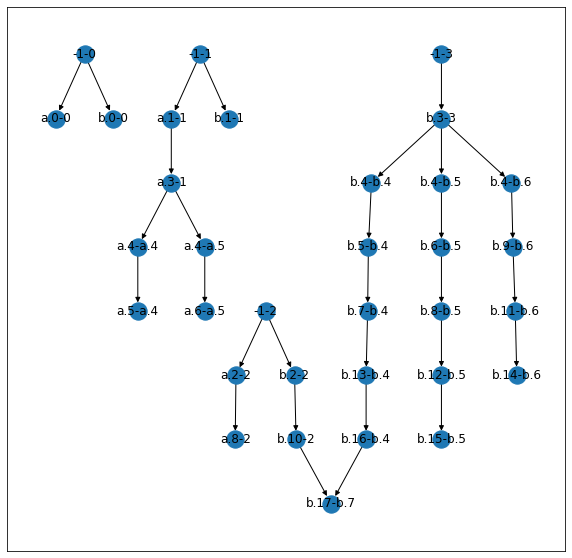

In [39]:
logging.basicConfig(level=logging.INFO)
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
pos = nx.nx_pydot.graphviz_layout(workflow_graph,prog="dot")
nx.draw_networkx(workflow_graph,pos)

In [40]:
state_detail_dict = dict(state_detail)
state_detail_dict

{-1: {'op': 'initial'},
 'a.0': {'id': 1629921380068,
  'description': "Text transform on 0 cells in column Book Title: value.replace(/\\s+/,' ')",
  'operation': {'op': 'core/text-transform',
   'engineConfig': {'facets': [], 'mode': 'row-based'},
   'columnName': 'Book Title',
   'expression': "value.replace(/\\s+/,' ')",
   'onError': 'keep-original',
   'repeat': False,
   'repeatCount': 10,
   'description': "Text transform on cells in column Book Title using expression value.replace(/\\s+/,' ')"},
  'time': '2021-08-25T19:47:07Z'},
 'a.1': {'id': 1629920931745,
  'description': "Text transform on 0 cells in column Author: value.replace(/\\s+/,' ')",
  'operation': {'op': 'core/text-transform',
   'engineConfig': {'facets': [], 'mode': 'row-based'},
   'columnName': 'Author',
   'expression': "value.replace(/\\s+/,' ')",
   'onError': 'keep-original',
   'repeat': False,
   'repeatCount': 10,
   'description': "Text transform on cells in column Author using expression value.replac

In [41]:
dcm1.column_position

[(0, 0, -1, 'Book Title', -1, -1),
 (1, 1, -1, 'Author', 0, -1),
 (2, 2, -1, 'Date', 1, -1),
 (3, 3, -1, 'Entrance Date', 2, -1),
 (4, 4, 4, 'Author 1', 1, -1),
 (5, 5, 4, 'Author 2', 4, -1),
 (6, 2, 4, 'Date', 5, 2),
 (7, 4, 5, 'Last Name', 1, 4),
 (8, 5, 6, 'First Name', 4, 5)]

In [42]:
column_position_pd = pd.DataFrame(column_position)
column_position_pd[column_position_pd[1]=="a.4"].values[0].tolist()

['a.4', 'a.4', 'a.4', 'Author 1', 1, -1]

In [43]:
state_graph = nx.DiGraph()
for x in state:
    state_graph.add_edge(x[1],x[0])
nx.shortest_path(state_graph,-1,"a.4")

[-1, 'a.0', 'a.1', 'a.2', 'a.3', 'a.4']

In [44]:
def col_name(colid,state,column_position,state_list):
    state_graph = nx.DiGraph()
    for x in state_list:
        state_graph.add_edge(x[1],x[0])
    #print(state_graph.edges)
    temp_state = nx.shortest_path(state_graph,-1,state)
    col_pd = pd.DataFrame(column_position)
    col_name_pd = col_pd[(col_pd[1]==colid)&(col_pd[2].isin(temp_state))]
    return col_name_pd.iloc[-1][3]
    

In [45]:
col_name("a.4","a.4",column_position,state)

'Author 1'

In [46]:
# visualize using graphviz yw layout


nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=TB

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


side_b_process = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

side_b_data = """
node[shape=box style="rounded,filled" fillcolor="#FFDDDD" peripheries=1 fontname=Helvetica]
"""

side_a_data = """
node[shape=box style="rounded,filled" fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""


freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """
/* End of double cluster for drawing box around nodes in workflow */
}}

/* End of top-level graph */
}
"""

column_key = set()
process_key = set()

for x in col_dependency:
    input_process = x[3]
    input_data = x[2]
    output_process = x[0]
    output_data = x[1]    
    
    key = output_process
    step_name = "Step {}".format(key)
    
    detail = ""

    temp_val = state_detail_dict[output_process]
    
    val = {}
    
    try:
        json_recipe = temp_val["operation"]
        val["op"] = json_recipe["op"]
        val["desc"] = json_recipe["description"]
        val["annotation"] = ""
    except:
        json_recipe = {}
        json_recipe["op"] = "single-operation"
        val["op"] = "single-operation"
        val["desc"] = "single-operation"
        val["annotation"] = ""
    
    process_name = json_recipe["op"].split("/")[-1]
    
    
    """
    if json_recipe["op"]=="core/mass-edit":
        cells_variance = sum([len(x["from"]) for x in json_recipe["edits"]])
        cells_affected = int(temp_val["description"].split("edit")[-1].split("cells")[0])
        detail+="| {} =\> {}, {} cells".format(cells_variance,len(json_recipe["edits"]),cells_affected)
    else:
        try:
            cells_affected = int(temp_val["desc"].split("Text transform on")[-1].split("cells")[0])        
            detail += "| {}, {} changed".format(json_recipe["expression"].replace('"','\\"'),cells_affected)
        except:
            pass
    """
    
    description = ""

    if str(key).startswith("b."):
        side_b_process+='''
        "{state_id}" [shape=record rankdir=LR label="{{<f0> {step_name} ({is_group}{function_name}) {detail} {description}}}"];
        '''.format(state_id=key,step_name=step_name,is_group="",function_name=process_name,detail=detail,description=description)
    else:
        single_process+='''
        "{state_id}" [shape=record rankdir=LR label="{{<f0> {step_name} ({is_group}{function_name}) {detail} {description}}}"];
        '''.format(state_id=key,step_name=step_name,is_group="",function_name=process_name,detail=detail,description=description)

    temp_name = "{state}\\n".format(state=key)
    temp_desc = ""
    temp_desc += val["desc"]
    nodes_def+="""
        {x} [label="{label}" id="{id}" fontsize=18 shape=box tooltip="{tt}" color="#b20400" fillcolor="#edd6d5"]
    """.format(x=key,label=temp_name+temp_desc.replace('"',"'"),id=key,tt="")

    #colkey = key.split("_")[-1]
    #parallel_graph.add_node(key,label=temp_desc,type="state",t_id=colkey)

    temp_process_yw = """
    #@begin {key} #@desc {desc} 
    """.format(key=key,desc=temp_desc.replace('"',"'"))
    #format(key=key,desc=key)

    #colkey = "{}-{}".format(input_process,input_data)
    colkey = "{}-{}".format(input_process,input_data)

    if "{}-{}".format(input_process,input_data) not in column_key:
        #print("test")
        #colname = column_position_pd[column_position_pd[1]==input_data].values[0].tolist()[3]
        #print(input_data,key)
        colname = col_name(input_data,key,column_position,state)

        nodes_def+="""
            {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
        """.format(x=colkey,label=colname,id=colkey,tt="")

                
        edge_def+="""
            {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=colkey,output=output_process,data="")            

        temp_process_yw += """
        #@in """+ """{key}-{colname}""".format(key=colkey,colname=colname).replace(" ","_")

        col_label = "{}_{}".format(colname,colkey) 
        col_label = "{}".format(colname) 
        
        if str(colkey).startswith("b."):
            side_b_data+="""
            "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
            """.format(node_name=colkey,label=col_label)
        elif str(colkey).startswith("a."):
            side_a_data+="""
            "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
            """.format(node_name=colkey,label=col_label)
        else:
            column_nodes+="""
            "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
            """.format(node_name=colkey,label=col_label)
                
        column_key.add("{}-{}".format(input_process,input_data))

    #if input_data=="b.4":
    #    print(colkey,key)
    
    if "{}|{}".format(colkey,key) not in process_key:
        edges+="""
            "{}" -> "{}"
            """.format(colkey,key)
        process_key.add("{}|{}".format(colkey,key))
    
    colkey = "{}-{}".format(output_process,output_data)
    
    if "{}-{}".format(output_process,output_data) not in column_key:
        #colname = column_position_pd[column_position_pd[1]==output_data].values[0].tolist()[3]
        colname = col_name(output_data,key,column_position,state)
        
        nodes_def+="""
            {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
        """.format(x=colkey,label=colname,id=colkey,tt="")

        edge_def+="""
            {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=output_process,output=colkey,data="")

        temp_process_yw += """
        #@in """+ """{key}-{colname}""".format(key=colkey,colname=colname).replace(" ","_")

        #col_label = "{}_{}".format(colname,colkey) 
        col_label = "{}".format(colname) 
        if str(colkey).startswith("b."):
            side_b_data+="""
            "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
            """.format(node_name=colkey,label=col_label)       
        elif str(colkey).startswith("a."):
            side_a_data+="""
            "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
            """.format(node_name=colkey,label=col_label)            
        else: 
            column_nodes+="""
            "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
            """.format(node_name=colkey,label=col_label)
                
        column_key.add("{}-{}".format(output_process,output_data))

    if "{}|{}".format(key,colkey) not in process_key:            
        edges+="""
            "{}" -> "{}"
            """.format(key,colkey)
        process_key.add("{}|{}".format(key,colkey))

    
    

gv_string = header+single_process+column_nodes+parameters_nodes+side_b_process+side_a_data+side_b_data+freq_pattern_nodes+edges+footer



In [47]:
dcm2.col_dependency

[(0, 0, 0),
 (1, 1, 1),
 (2, 2, 2),
 (3, 3, 3),
 (4, 4, 3),
 (4, 5, 3),
 (4, 6, 3),
 (5, 4, 4),
 (6, 5, 5),
 (7, 4, 4),
 (8, 5, 5),
 (9, 6, 6),
 (10, 2, 2),
 (10, 2, 2),
 (11, 6, 6),
 (12, 5, 5),
 (13, 4, 4),
 (14, 6, 6),
 (15, 5, 5),
 (16, 4, 4),
 (17, 7, 4),
 (17, 7, 2)]

In [48]:
dcm2.value_derived_from

[(0, -1, -1),
 (1, -1, -1),
 (2, -1, -1),
 (3, -1, -1),
 (4, -1, -1),
 (5, -1, -1),
 (6, -1, -1),
 (7, -1, -1),
 (8, -1, -1),
 (9, -1, -1),
 (10, -1, -1),
 (11, -1, -1),
 (12, -1, -1),
 (13, -1, -1),
 (14, -1, -1),
 (15, -1, -1),
 (16, 4, 3),
 (17, 4, 7),
 (18, 4, 11),
 (19, 4, 15),
 (20, 4, 3),
 (21, 4, 7),
 (22, 4, 11),
 (23, 4, 15),
 (24, 4, 3),
 (25, 4, 7),
 (26, 4, 11),
 (27, 4, 15),
 (28, 10, 2),
 (29, 10, 6),
 (30, 10, 10),
 (31, 10, 14),
 (32, 11, 26),
 (33, 12, 22),
 (34, 13, 18),
 (35, 14, 27),
 (36, 15, 23),
 (37, 17, 16),
 (37, 17, 28),
 (38, 17, 17),
 (38, 17, 29),
 (39, 17, 34),
 (39, 17, 30),
 (40, 17, 19),
 (40, 17, 31)]

In [49]:
pd.DataFrame(col_dependency)

,0,1,2,3
0,a.0,0,0,-1
1,a.1,1,1,-1
2,a.2,2,2,-1
3,a.3,1,1,a.1
4,a.4,a.4,1,a.3
5,a.4,a.5,1,a.3
6,a.5,a.4,a.4,a.4
7,a.6,a.5,a.5,a.4
8,a.8,2,2,a.2
9,b.0,0,0,-1


In [50]:
from IPython.display import Image
def generate_pdf(gv_string,filename="temp"):
    input = filename+".gv"
    with open(input,"w") as file:
        file.write(gv_string)
    output = filename+".png"    
    !dot -Tpng -o $output $input 
    return Image(filename=output) 


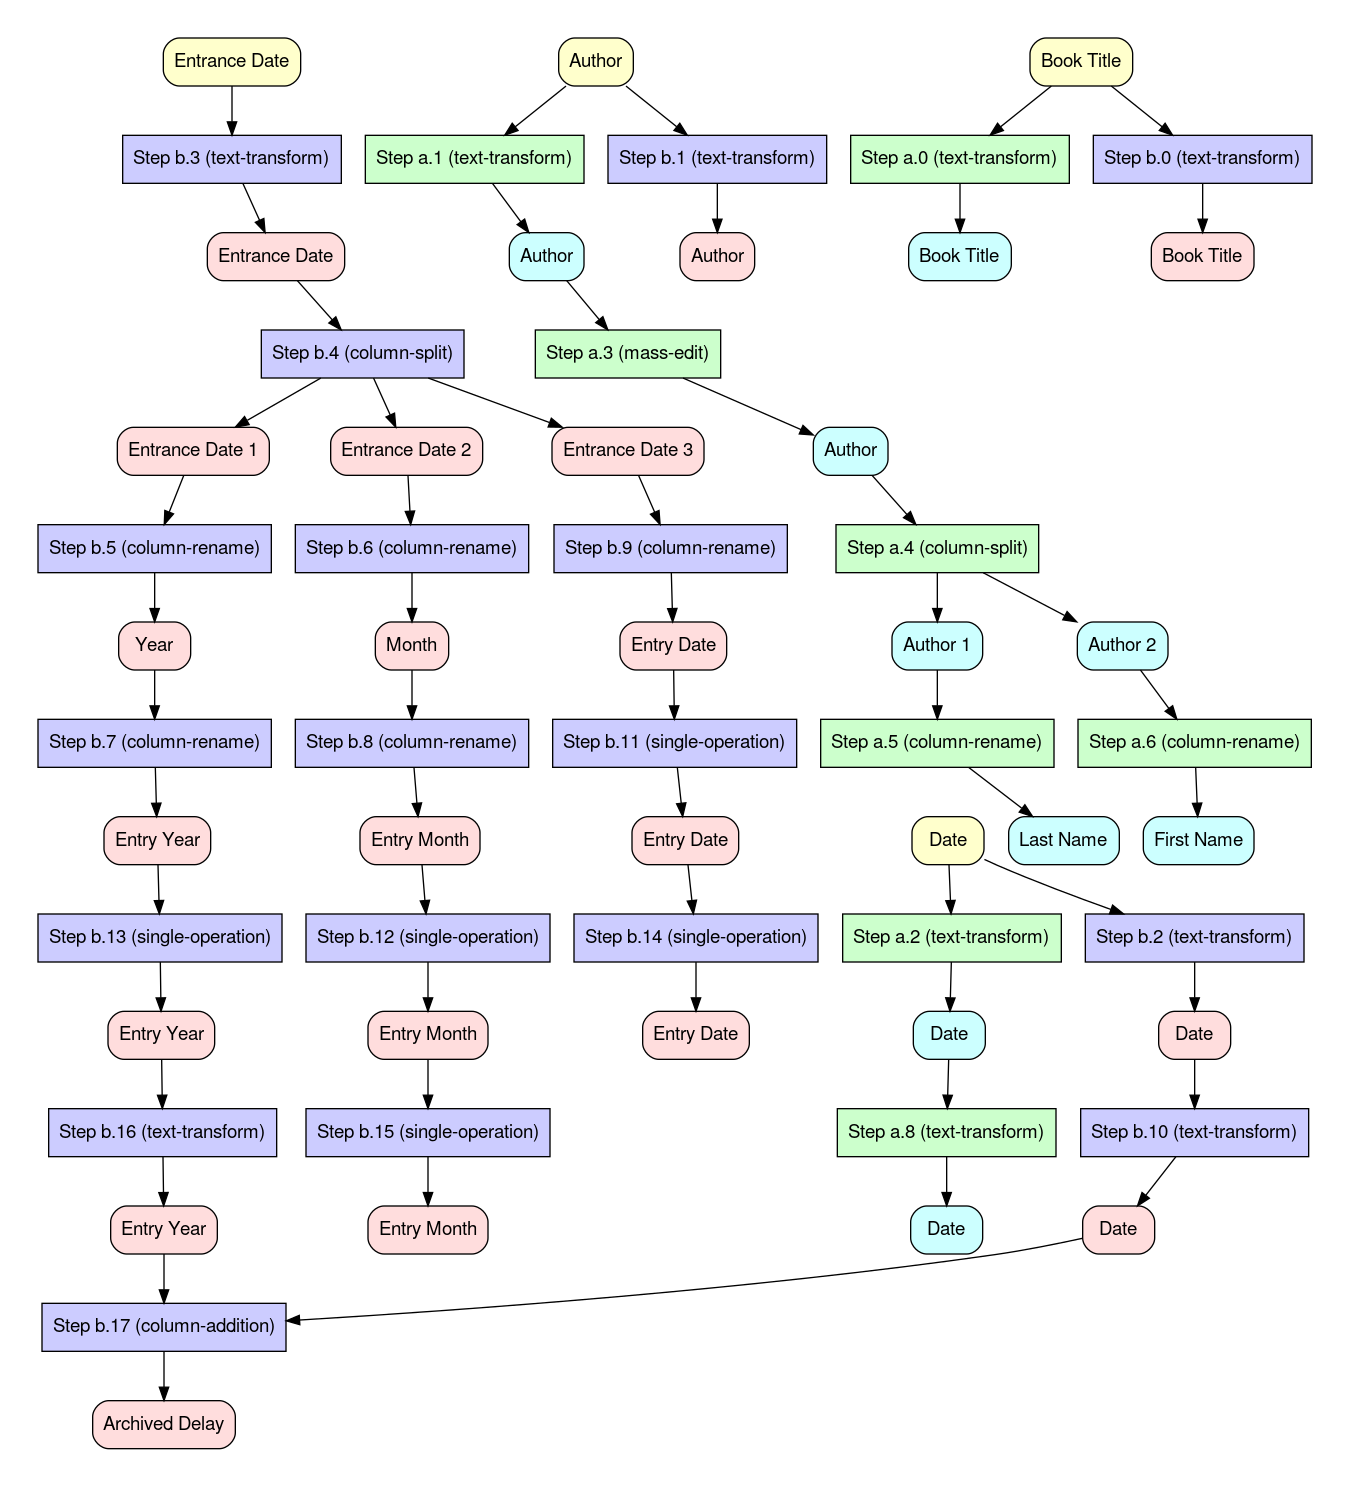

In [51]:
generate_pdf(gv_string)

In [52]:
col_map,cell_map,state_map,cell_values,

({'a.0': 0,
  'b.0': 0,
  'a.1': 1,
  'b.1': 1,
  'a.2': 2,
  'b.2': 2,
  'a.3': 3,
  'b.3': 3,
  'a.4': 'a.4',
  'a.5': 'a.5',
  'b.4': 'b.4',
  'b.5': 'b.5',
  'b.6': 'b.6',
  'b.7': 'b.7'},
 {'a.0': 0,
  'b.0': 0,
  'a.1': 1,
  'b.1': 1,
  'a.2': 2,
  'b.2': 2,
  'a.3': 3,
  'b.3': 3,
  'a.4': 4,
  'b.4': 4,
  'a.5': 5,
  'b.5': 5,
  'a.6': 6,
  'b.6': 6,
  'a.7': 7,
  'b.7': 7,
  'a.8': 8,
  'b.8': 8,
  'a.9': 9,
  'b.9': 9,
  'a.10': 10,
  'b.10': 10,
  'a.11': 11,
  'b.11': 11,
  'a.12': 12,
  'b.12': 12,
  'a.13': 13,
  'b.13': 13,
  'a.14': 14,
  'b.14': 14,
  'a.15': 15,
  'b.15': 15,
  'a.16': 'a.16',
  'a.17': 'a.17',
  'a.18': 'a.18',
  'a.19': 'a.19',
  'a.20': 'a.20',
  'a.21': 'a.21',
  'a.22': 'a.22',
  'a.23': 'a.23',
  'b.16': 'b.16',
  'b.17': 'b.17',
  'b.18': 'b.18',
  'b.19': 'b.19',
  'b.20': 'b.20',
  'b.21': 'b.21',
  'b.22': 'b.22',
  'b.23': 'b.23',
  'b.24': 'b.24',
  'b.25': 'b.25',
  'b.26': 'b.26',
  'b.27': 'b.27',
  'b.28': 'b.28',
  'b.29': 'b.29',
  '

In [53]:
col,row,cell,cell_values,col_dependency,value_derived_from,column_position

([(0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (1, 0),
  ('a.4', 0),
  ('a.4', 0),
  ('a.4', 0),
  ('a.4', 0),
  ('a.5', 0),
  ('a.5', 0),
  ('a.5', 0),
  ('a.5', 0),
  (2, 0),
  (2, 0),
  (2, 0),
  (2, 0),
  ('b.4', 0),
  ('b.4', 0),
  ('b.4', 0),
  ('b.4', 0),
  ('b.5', 0),
  ('b.5', 0),
  ('b.5', 0),
  ('b.5', 0),
  ('b.6', 0),
  ('b.6', 0),
  ('b.6', 0),
  ('b.6', 0),
  (2, 0),
  (2, 0),
  (2, 0),
  (2, 0),
  ('b.6', 0),
  ('b.5', 0),
  ('b.4', 0),
  ('b.6', 0),
  ('b.5', 0),
  ('b.7', 0),
  ('b.7', 0),
  ('b.7', 0),
  ('b.7', 0)],
 [(0, 0),
  (0, 0),
  (0, 0),
  (0, 0),
  (1, 0),
  (1, 0),
  (1, 0),
  (1, 0),
  (2, 0),
  (2, 0),
  (2, 0),
  (2, 0),
  (3, 0),
  (3, 0),
  (3, 0),
  (3, 0),
  (2, 0),
  (0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (0, 0),
  (

In [75]:
# write datalog facts
with open("align_merged.pl","w") as file:
    for x in set(col):
        file.write('column("{}").\n'.format('","'.join([str(y) for y in x])))
    for x in set(row):
        file.write('row("{}").\n'.format('","'.join([str(y) for y in x])))   
    for x in cell:
        file.write('cell("{}").\n'.format('","'.join([str(y) for y in x])))
    for x in cell_values:
        file.write('cell_values("{}").\n'.format('","'.join([str(y) for y in x])))
    for x in col_dependency:
        file.write('col_dependency("{}").\n'.format('","'.join([str(y) for y in x])))
    for x in value_derived_from:
        file.write('value_derived_from("{}").\n'.format('","'.join([str(y) for y in x])))
    for x in column_position:
        file.write('column_position("{}").\n'.format('","'.join([str(y) for y in x])))

In [76]:
!cat align_merged.pl

column("a.4","0").
column("0","0").
column("b.7","0").
column("3","0").
column("a.5","0").
column("2","0").
column("b.6","0").
column("b.5","0").
column("1","0").
column("b.4","0").
row("3","0").
row("2","0").
row("1","0").
row("0","0").
cell("0","0","0").
cell("1","1","0").
cell("2","2","0").
cell("3","3","0").
cell("4","0","1").
cell("5","1","1").
cell("6","2","1").
cell("7","3","1").
cell("8","0","2").
cell("9","1","2").
cell("10","2","2").
cell("11","3","2").
cell("12","0","3").
cell("13","1","3").
cell("14","2","3").
cell("15","3","3").
cell("9","1","2").
cell("a.16","a.4","0").
cell("a.17","a.4","1").
cell("a.18","a.4","2").
cell("a.19","a.4","3").
cell("a.20","a.5","0").
cell("a.21","a.5","1").
cell("a.22","a.5","2").
cell("a.23","a.5","3").
cell("2","2","0").
cell("6","2","1").
cell("10","2","2").
cell("14","2","3").
cell("b.16","b.4","0").
cell("b.17","b.4","1").
cell("b.18","b.4","2").
cell("b.19","b.4","3").
cell("b.20","b.5","0").
cell("b.21","b.5","1").
cell("b.22","b.5","

In [31]:
# align row
dcm1.row,dcm2.row

([(0, 0), (1, 0), (2, 0), (3, 0)], [(0, 0), (1, 0), (2, 0), (3, 0)])

In [32]:
# align schema
dcm1.column_position,dcm2.column_position

([(0, 0, -1, 'Book Title', -1, -1),
  (1, 1, -1, 'Author', 0, -1),
  (2, 2, -1, 'Date', 1, -1),
  (3, 3, -1, 'Entrance Date', 2, -1),
  (4, 4, 4, 'Author 1', 1, -1),
  (5, 5, 4, 'Author 2', 4, -1),
  (6, 2, 4, 'Date', 5, 2),
  (7, 4, 5, 'Last Name', 1, 4),
  (8, 5, 6, 'First Name', 4, 5)],
 [(0, 0, -1, 'Book Title', -1, -1),
  (1, 1, -1, 'Author', 0, -1),
  (2, 2, -1, 'Date', 1, -1),
  (3, 3, -1, 'Entrance Date', 2, -1),
  (4, 4, 4, 'Entrance Date 1', 3, -1),
  (5, 5, 4, 'Entrance Date 2', 4, -1),
  (6, 6, 4, 'Entrance Date 3', 5, -1),
  (7, 4, 5, 'Year', 3, 4),
  (8, 5, 6, 'Month', 4, 5),
  (9, 4, 7, 'Entry Year', 3, 7),
  (10, 5, 8, 'Entry Month', 4, 8),
  (11, 6, 9, 'Entry Date', 5, 6),
  (12, 7, 17, 'Archived Delay', 6, -1)])

In [33]:
# align column
dcm1.column,dcm2.column

([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)],
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)])

In [34]:
# align values
dcm1.cell_values,dcm2.cell_values,dcm2.column

([(0, 0, -1, 'Against Method', -1),
  (1, 1, -1, 'Feyerabend, P.', -1),
  (2, 2, -1, ' 1975', -1),
  (3, 3, -1, '1996-02-01', -1),
  (4, 4, -1, 'Changing Order', -1),
  (5, 5, -1, 'Collins, H.M.', -1),
  (6, 6, -1, ' 1985', -1),
  (7, 7, -1, '2003-12-31', -1),
  (8, 8, -1, 'Exceeding Our Grasp', -1),
  (9, 9, -1, ' P. Kyle Stanford', -1),
  (10, 10, -1, ' 2006', -1),
  (11, 11, -1, 'Feb, 29 2008', -1),
  (12, 12, -1, 'Theory of Information', -1),
  (13, 13, -1, ' ', -1),
  (14, 14, -1, ' 1992', -1),
  (15, 15, -1, '2010-31-01', -1),
  (16, 9, 3, 'Stanford, P. Kyle', 9),
  (17, 16, 4, 'Feyerabend', -1),
  (18, 17, 4, 'Collins', -1),
  (19, 18, 4, 'Stanford', -1),
  (20, 19, 4, ' ', -1),
  (21, 20, 4, ' P.', -1),
  (22, 21, 4, ' H.M.', -1),
  (23, 22, 4, ' P. Kyle', -1),
  (24, 23, 4, None, -1),
  (25, 2, 8, '1975', 2),
  (26, 6, 8, '1985', 6),
  (27, 10, 8, '2006', 10),
  (28, 14, 8, '1992', 14)],
 [(0, 0, -1, 'Against Method', -1),
  (1, 1, -1, 'Feyerabend, P.', -1),
  (2, 2, -1, ' 197

In [35]:
cell_union_pd = dcm1_val_pd[dcm1_val_pd[4]==-1].merge(dcm2_val_pd[dcm2_val_pd[4]==-1],left_on=1,right_on=1,how="outer")

In [36]:
# similar
cell_values = []
cell_values_map = {}
cell = []
cell_map = {}
col = []
col_map = {}
row = []
row_map = {}
cell_values_id = 0
cell_id = 0
col_id = 0
row_id =0
for x in cell_union_pd[cell_union_pd["3_x"]==cell_union_pd["3_y"]].to_records():
    #cell_values.append((x["0_x"],x["1"],x["2_x"],x["3_x"],x["4_x"]))
    #cell_values_map["a-{}".format(int(x["0_x"]))] = x["0_x"]
    #cell_values_map["b-{}".format(int(x["0_y"]))] = x["0_x"]

    cell_idt = dcm1_cell_pd[dcm1_cell_pd[0]==x["1"]].values[0]

    try:
        col_map["a-{}".format(cell_idt[1])] 
    except:
        #col_map["a-{}".format(cell_id[2])] = cell_id[2]
        #col_map["b-{}".format(cell_id[2])] = cell_id[2]
        col_map["a-{}".format(cell_idt[1])] = col_id
        col_map["b-{}".format(cell_idt[1])] = col_id
        col_idt = dcm1_col_pd[dcm1_col_pd[0]==cell_idt[1]].values[0]
        col.append((col_id,col_idt[1]))
        col_id+=1
        
    try:
        row_map["a-{}".format(cell_idt[2])]
    except:
        #row_map["a-{}".format(cell_id[1])] = cell_id[1]
        #row_map["b-{}".format(cell_id[1])] = cell_id[1]
        row_map["a-{}".format(cell_idt[2])] = row_id
        row_map["b-{}".format(cell_idt[2])] = row_id
        row_idt = dcm1_row_pd[dcm1_row_pd[0]==cell_idt[2]].values[0]
        row.append((row_id,row_idt[1]))
        row_id+=1

    try:
        cell_map["a-{}".format(int(x["1"]))] 
    except:
        #cell_map["a-{}".format(int(x["1"]))] = x["1"]
        #cell_map["b-{}".format(int(x["1"]))] = x["1"]
        cell_map["a-{}".format(int(x["1"]))] = cell_id
        cell_map["b-{}".format(int(x["1"]))] = cell_id
        #cell.append((cell_id,row_id,col_id))
        cell.append((cell_id,col_map["a-{}".format(cell_idt[1])],row_map["a-{}".format(cell_idt[2])]))
        cell_id+=1
        
    cell_values.append((cell_values_id,cell_map["a-{}".format(int(x["1"]))] ,x["2_x"],x["3_x"],x["4_x"]))
    cell_values_map["a-{}".format(int(x["0_x"]))] = cell_values_id
    cell_values_map["b-{}".format(int(x["0_y"]))] = cell_values_id
    cell_values_id+=1

In [37]:
for x in cell_union_pd[cell_union_pd["3_x"]!=cell_union_pd["3_y"]].to_records():
    #cell_values.append((x["0_x"],x["1"],x["2_x"],x["3_x"],x["4_x"]))
    #cell_values_map["a-{}".format(int(x["0_x"]))] = x["0_x"]
    #cell_values_map["b-{}".format(int(x["0_y"]))] = x["0_x"]

    if not np.isnan(x["0_x"]):
        cell_idt = dcm1_cell_pd[dcm1_cell_pd[0]==x["1"]].values[0]
        try:
            col_map["a-{}".format(cell_idt[1])] 
        except:
            #col_map["a-{}".format(cell_id[2])] = cell_id[2]
            #col_map["b-{}".format(cell_id[2])] = cell_id[2]
            col_map["a-{}".format(cell_idt[1])] = col_id
            col_idt = dcm1_col_pd[dcm1_col_pd[0]==cell_idt[1]].values[0]
            col.append((col_id,col_idt[1]))
            col_id+=1

        try:
            row_map["a-{}".format(cell_idt[2])]
        except:
            row_map["a-{}".format(cell_idt[2])] = row_id
            row_idt = dcm1_row_pd[dcm1_row_pd[0]==cell_idt[2]].values[0]
            row.append((row_id,row_idt[2]))
            row_id+=1

        try:
            cell_map["a-{}".format(int(x["1"]))] 
        except:
            cell_map["a-{}".format(int(x["1"]))] = cell_id
            cell.append((cell_id,col_map["a-{}".format(cell_idt[1])],row_map["a-{}".format(cell_idt[2])]))
            cell_id+=1

        cell_values.append((cell_values_id,cell_map["a-{}".format(int(x["1"]))] ,x["2_x"],x["3_x"],x["4_x"]))
        cell_values_map["a-{}".format(int(x["0_x"]))] = cell_values_id
        cell_values_id+=1
        
    if not np.isnan(x["0_y"]):
        cell_idt = dcm2_cell_pd[dcm2_cell_pd[0]==x["1"]].values[0]
        try:
            col_map["b-{}".format(cell_idt[1])] 
        except:
            col_map["b-{}".format(cell_idt[1])] = col_id
            col_idt = dcm2_col_pd[dcm2_col_pd[0]==cell_idt[1]].values[0]
            col.append((col_id,col_idt[1]))
            col_id+=1

        try:
            row_map["b-{}".format(cell_idt[2])]
        except:
            row_map["b-{}".format(cell_idt[2])] = row_id
            row_idt = dcm2_row_pd[dcm2_row_pd[0]==cell_idt[2]].values[0]
            row.append((row_id,row_idt[1]))

        try:
            cell_map["b-{}".format(int(x["1"]))] 
        except:
            cell_map["b-{}".format(int(x["1"]))] = cell_id
            cell.append((cell_id,col_map["b-{}".format(cell_idt[1])],row_map["b-{}".format(cell_idt[2])]))
            cell_id+=1

        cell_values.append((cell_values_id,cell_map["b-{}".format(int(x["1"]))] ,x["2_y"],x["3_y"],x["4_y"]))
        cell_values_map["b-{}".format(int(x["0_y"]))] = cell_values_id
        cell_values_id+=1

In [38]:
dcm1.column_position,dcm2.column_position

([(0, 0, -1, 'Book Title', -1, -1),
  (1, 1, -1, 'Author', 0, -1),
  (2, 2, -1, 'Date', 1, -1),
  (3, 3, -1, 'Entrance Date', 2, -1),
  (4, 4, 4, 'Author 1', 1, -1),
  (5, 5, 4, 'Author 2', 4, -1),
  (6, 2, 4, 'Date', 5, 2),
  (7, 4, 5, 'Last Name', 1, 4),
  (8, 5, 6, 'First Name', 4, 5)],
 [(0, 0, -1, 'Book Title', -1, -1),
  (1, 1, -1, 'Author', 0, -1),
  (2, 2, -1, 'Date', 1, -1),
  (3, 3, -1, 'Entrance Date', 2, -1),
  (4, 4, 4, 'Entrance Date 1', 3, -1),
  (5, 5, 4, 'Entrance Date 2', 4, -1),
  (6, 6, 4, 'Entrance Date 3', 5, -1),
  (7, 4, 5, 'Year', 3, 4),
  (8, 5, 6, 'Month', 4, 5),
  (9, 4, 7, 'Entry Year', 3, 7),
  (10, 5, 8, 'Entry Month', 4, 8),
  (11, 6, 9, 'Entry Date', 5, 6),
  (12, 7, 17, 'Archived Delay', 6, -1)])

In [39]:
col,row,cell,cell_values

([(0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (4, 0),
  (5, 0),
  (6, 0),
  (7, 0),
  (8, 0),
  (9, 0)],
 [(0, 0), (1, 0), (2, 0), (3, 0)],
 [(0, 0, 0),
  (1, 1, 0),
  (2, 2, 0),
  (3, 3, 0),
  (4, 0, 1),
  (5, 1, 1),
  (6, 2, 1),
  (7, 3, 1),
  (8, 0, 2),
  (9, 1, 2),
  (10, 2, 2),
  (11, 3, 2),
  (12, 0, 3),
  (13, 1, 3),
  (14, 2, 3),
  (15, 3, 3),
  (16, 4, 0),
  (17, 5, 0),
  (18, 4, 1),
  (19, 5, 1),
  (20, 4, 2),
  (21, 5, 2),
  (22, 4, 3),
  (23, 5, 3),
  (24, 6, 0),
  (25, 7, 0),
  (26, 6, 1),
  (27, 7, 1),
  (28, 6, 2),
  (29, 7, 2),
  (30, 6, 3),
  (31, 7, 3),
  (32, 8, 0),
  (33, 8, 1),
  (34, 8, 2),
  (35, 8, 3),
  (36, 9, 0),
  (37, 9, 1),
  (38, 9, 2),
  (39, 9, 3)],
 [(0, 0, -1.0, 'Against Method', -1.0),
  (1, 1, -1.0, 'Feyerabend, P.', -1.0),
  (2, 2, -1.0, ' 1975', -1.0),
  (3, 3, -1.0, '1996-02-01', -1.0),
  (4, 4, -1.0, 'Changing Order', -1.0),
  (5, 5, -1.0, 'Collins, H.M.', -1.0),
  (6, 6, -1.0, ' 1985', -1.0),
  (7, 7, -1.0, '2003-12-31', -1.0),
  (8, 8, -1.0, 'Exce

In [40]:
col_map

{'a-0': 0,
 'b-0': 0,
 'a-1': 1,
 'b-1': 1,
 'a-2': 2,
 'b-2': 2,
 'a-3': 3,
 'b-3': 3,
 'a-4': 4,
 'b-4': 5,
 'a-5': 6,
 'b-5': 7,
 'b-6': 8,
 'b-7': 9}

In [337]:
row_map,cell_map

({'a-0': 0,
  'b-0': 0,
  'a-1': 1,
  'b-1': 1,
  'a-2': 2,
  'b-2': 2,
  'a-3': 3,
  'b-3': 3},
 {'a-0': 0,
  'b-0': 0,
  'a-1': 1,
  'b-1': 1,
  'a-2': 2,
  'b-2': 2,
  'a-3': 3,
  'b-3': 3,
  'a-4': 4,
  'b-4': 4,
  'a-5': 5,
  'b-5': 5,
  'a-6': 6,
  'b-6': 6,
  'a-7': 7,
  'b-7': 7,
  'a-8': 8,
  'b-8': 8,
  'a-9': 9,
  'b-9': 9,
  'a-10': 10,
  'b-10': 10,
  'a-11': 11,
  'b-11': 11,
  'a-12': 12,
  'b-12': 12,
  'a-13': 13,
  'b-13': 13,
  'a-14': 14,
  'b-14': 14,
  'a-15': 15,
  'b-15': 15,
  'a-16': 16,
  'b-16': 17,
  'a-17': 18,
  'b-17': 19,
  'a-18': 20,
  'b-18': 21,
  'a-19': 22,
  'b-19': 23,
  'a-20': 24,
  'b-20': 25,
  'a-21': 26,
  'b-21': 27,
  'a-22': 28,
  'b-22': 29,
  'a-23': 30,
  'b-23': 31,
  'b-24': 32,
  'b-25': 33,
  'b-26': 34,
  'b-27': 35,
  'b-28': 36,
  'b-29': 37,
  'b-30': 38,
  'b-31': 39})

In [323]:
# new/different cell
cell_union_pd[cell_union_pd["3_x"]!=cell_union_pd["3_y"]]

,0_x,1,2_x,3_x,4_x,0_y,2_y,3_y,4_y
16,17.0,16,4.0,Feyerabend,-1.0,16,4,1996,-1
17,18.0,17,4.0,Collins,-1.0,17,4,2003,-1
18,19.0,18,4.0,Stanford,-1.0,18,4,"Feb, 29 2008",-1
19,20.0,19,4.0,,-1.0,19,4,2010,-1
20,21.0,20,4.0,P.,-1.0,20,4,2,-1
21,22.0,21,4.0,H.M.,-1.0,21,4,12,-1
22,23.0,22,4.0,P. Kyle,-1.0,22,4,,-1
23,24.0,23,4.0,None,-1.0,23,4,31,-1
24,NaN,24,NaN,NaN,NaN,24,4,1,-1
25,NaN,25,NaN,NaN,NaN,25,4,31,-1


In [212]:
?dcm1_val_pd.merge

In [49]:
import json
json.loads(x[5])["operation"]

{'op': 'core/row-removal',
 'engineConfig': {'facets': [{'type': 'list',
    'name': 'Flagged Rows',
    'expression': 'row.flagged',
    'columnName': '',
    'invert': False,
    'omitBlank': False,
    'omitError': False,
    'selection': [{'v': {'v': True, 'l': 'true'}}],
    'selectBlank': False,
    'selectError': False}],
  'mode': 'row-based'},
 'description': 'Remove rows'}

In [45]:
dcm1.cell_values

[(0, 0, -1, ('Against Method', 0, 0), -1),
 (1, 1, -1, ('Feyerabend, P.', 0, 1), -1),
 (2, 2, -1, (' 1975', 0, 2), -1),
 (3, 3, -1, ('1996-02-01', 0, 3), -1),
 (4, 4, -1, ('Changing Order', 1, 0), -1),
 (5, 5, -1, ('Collins, H.M.', 1, 1), -1),
 (6, 6, -1, (' 1985', 1, 2), -1),
 (7, 7, -1, ('2003-12-31', 1, 3), -1),
 (8, 8, -1, ('Exceeding Our Grasp', 2, 0), -1),
 (9, 9, -1, (' P. Kyle Stanford', 2, 1), -1),
 (10, 10, -1, (' 2006', 2, 2), -1),
 (11, 11, -1, ('Feb, 29 2008', 2, 3), -1),
 (12, 12, -1, ('Theory of Information', 3, 0), -1),
 (13, 13, -1, (' ', 3, 1), -1),
 (14, 14, -1, (' 1992', 3, 2), -1),
 (15, 15, -1, ('2010-31-01', 3, 3), -1)]

In [31]:
print("raw:")
print(op2.get_snapshot_at_state(int(op2.get_state_to_step(len(op2.get_all_state_command())))+1))
for x in op2.get_all_state_command().sort_values("state_id",ascending=False).to_records():
    print(x[5])
    print(op2.get_snapshot_at_state(int(op2.get_state_to_step(x.state_id)+1)))
    #op2.get_snapshot_at_state()

raw:
get_values_state 17
                      Book Title                     Author           Date  \
0         (Against Method, 0, 0)     (Feyerabend, P., 0, 1)  ( 1975, 0, 2)   
1         (Changing Order, 1, 0)      (Collins, H.M., 1, 1)  ( 1985, 1, 2)   
2    (Exceeding Our Grasp, 2, 0)  ( P. Kyle Stanford, 2, 1)  ( 2006, 2, 2)   
3  (Theory of Information, 3, 0)                  ( , 3, 1)  ( 1992, 3, 2)   

          Entrance Date  
0    (1996-02-01, 0, 3)  
1    (2003-12-31, 1, 3)  
2  (Feb, 29 2008, 2, 3)  
3    (2010-31-01, 3, 3)  
{"id": 1629921348453, "description": "Text transform on 0 cells in column Book Title: value.replace(/\\s+/,' ')", "operation": {"op": "core/text-transform", "engineConfig": {"facets": [], "mode": "row-based"}, "columnName": "Book Title", "expression": "value.replace(/\\s+/,' ')", "onError": "keep-original", "repeat": false, "repeatCount": 10, "description": "Text transform on cells in column Book Title using expression value.replace(/\\s+/,' ')"}, "t

In [ ]:
op1.get_all_state_command().sort_values("state_id",ascending)

In [ ]:
import networkx as nx

In [ ]:
with open("test_gv.dot","w") as file:
    file.write(gv_string)

In [ ]:
gg = nx.nx_pydot.read_dot("test_gv.dot")

In [ ]:
parallel_graph.edges

In [ ]:
!cat test_gv.dot

In [ ]:
gg.nodes

In [ ]:
op1.get_col_at_state_order(state=10)

In [ ]:
op2.get_col_at_state_order(state=10)

In [ ]:
import os

db_files = []
for x in os.listdir():
    if x.endswith(".db"):
        db_files.append(x)

global orpe,num_state

@interact
def interactive_form(file=db_files):
    global orpe,num_state
    #orpe = ProvenanceExplorer(file)
    #orpe = ProvenanceExplorer("workflow-demo-3.openrefine.db")
    orpe = ProvenanceExplorer("airbnb_demo.db")
    num_state = orpe.get_number_of_state().num_state.values[0]    

In [ ]:
temp_parallel = orpe.gv_template(orpe.parallel_workflow())
collapsed,freq_pattern = orpe.collapsed_iterative(orpe.parallel_workflow(),temp_parallel[1])

In [ ]:
orpe.gv_template(freq_pattern,orpe.parallel_workflow())

In [ ]:
temp_parallel

In [ ]:
orpe.get_column_at_state(0)

In [ ]:
num_state

# Serial Workflow

In [ ]:
orpe.get_linear_recipe()

In [ ]:
orpe.get_all_state_command()

In [ ]:
import json

linear_recipe = orpe.get_linear_recipe()

params = set()
process = {}

max_state = orpe.get_number_of_state()

for x in linear_recipe.to_records():
    xx = json.loads(x.detail)

    real_state = max_state.values[0][0]-x.state_id    
    prev_state = max_state.values[0][0]-x.prev_state_id

    if real_state == 0:
        input_name = "tableoriginal"
    else:
        input_name = "table{}".format(real_state) 

    process["state{}".format(prev_state)] = {}
    process["state{}".format(prev_state)]["input"] = input_name
    process["state{}".format(prev_state)]["output"] = "table{}".format(prev_state)
    process["state{}".format(prev_state)]["desc"] = xx["description"]
    try:
        process["state{}".format(prev_state)]["op"] = xx["operation"]["op"]
        process["state{}".format(prev_state)]["operation"] = xx["operation"]
    except:
        pass
    #print(xx)

    

In [ ]:
process

In [ ]:

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

isinput = set()

process_nodes = []
data_nodes_in = set()
data_nodes_out = set()

for key,val in process.items():
    temp_name = "{state}\\n".format(state=key)
    temp_desc = ""
    try:
        temp_desc += val["op"] +"\\n"
    except:
        pass
    temp_desc += val["desc"]
    nodes_def+="""
        {x} [label="{label}" id="{id}" fontsize=18 shape=box tooltip="{tt}" color="#b20400" fillcolor="#edd6d5"]
    """.format(x=key,label=temp_name+temp_desc.replace('"',"'"),id=key,tt="")
    
    temp_process_yw = """
    #@begin {key} #@desc {desc} 
    """.format(key=key,desc=temp_desc.replace('"',"'"))
    
    if val["input"] not in isinput:
        nodes_def+="""
            {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
        """.format(x=val["input"],label=val["input"].replace('"',"'"),id=key,tt="")
        isinput.add(val["input"])
        

    if val["output"] not in isinput:
        nodes_def+="""
            {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
        """.format(x=val["output"],label=val["output"].replace('"',"'"),id=key,tt="")
        isinput.add(val["output"])
        
        
    edge_def+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=val["input"],output=key,data="")
    
    data_nodes_in.add("{key}".format(key=val["input"]).replace(" ","_"))
    temp_process_yw += """
    #@in """+ """{key}
        """.format(key=val["input"]).replace(" ","_")   
    
    
    edge_def+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=key,output=val["output"],data="")
    
    data_nodes_out.add("{key}".format(key=val["output"]).replace(" ","_"))
    temp_process_yw += """
    #@out """+"""{key}
    """.format(key=val["output"]).replace(" ","_")            
    
    temp_process_yw += """
    #@end {key}     
    """.format(key=key)
    process_nodes.append(temp_process_yw)

In [ ]:
compiled_yw = """#@begin test_or
"""
for x in data_nodes_in-data_nodes_out:
    compiled_yw+="#@in {}\n".format(x)
for x in data_nodes_out-data_nodes_in:
    compiled_yw+="#@out {}\n".format(x)    
for x in process_nodes:
    compiled_yw+=x+"\n"
compiled_yw += """#@end test_or"""

In [ ]:
print(compiled_yw.strip())

In [ ]:
def display_yw(compiled_yw,output="temporary.png"):
    with open("temporary.yw","w") as file:
        file.write(compiled_yw)
    !java -jar yesworkflow-0.2.2.0-SNAPSHOT-jar-with-dependencies.jar  graph temporary.yw -c extract.comment="#" | dot -Tpng -o $output
    from IPython.display import Image
    return Image(filename=output) 
def save_pdf_yw(compiled_yw,output="temporary.pdf"):
    with open("temporary.yw","w") as file:
        file.write(compiled_yw)
    !java -jar yesworkflow-0.2.2.0-SNAPSHOT-jar-with-dependencies.jar  graph temporary.yw -c extract.comment="#" | dot -Tpdf -o $output

In [ ]:
save_pdf_yw(compiled_yw)
#display_yw(compiled_yw)

In [ ]:
#save_pdf_yw(compiled_yw,"linear_test.pdf")

In [ ]:
#print(nodes_def+edge_def+"\n}")
from graphviz import Source

temp = nodes_def+edge_def+"\n}"
s = Source(temp)
#s

# Parallel Workflow

In [ ]:
col_dependency = orpe.get_all_column_dependency()
state_order = orpe.get_state_order()
state_col_dep = col_dependency.merge(state_order)
state_col_dep.head()

In [ ]:
state_col_dep

In [ ]:
orpe.get_linear_recipe()

In [ ]:
linear_recipe = orpe.get_linear_recipe()

process = {}
col_counter = {}

for x in linear_recipe.sort_values("state_id",ascending=False).to_records():
    sid = x.state_id    
    print(sid)


    xx = json.loads(x.detail)

    real_state = max_state.values[0][0]-x.state_id    
    prev_state = max_state.values[0][0]-x.prev_state_id

    if real_state == 0:
        input_name = "tableoriginal"
    else:
        input_name = "table{}".format(real_state) 

    process["state_{}".format(prev_state)] = {}
    try:
        state_pd = state_col_dep.groupby("state_id").get_group(sid)
        process["state_{}".format(prev_state)]["input"] = []
        process["state_{}".format(prev_state)]["output"] = []

        icol = set()
        ocol = set()
        for y in state_pd.to_records():
            colname = "col{}".format(y.input_column)
            if colname not in icol:
                try:
                    col_counter[colname] #+= 1
                except:
                    col_counter[colname] = 0                                                
                process["state_{}".format(prev_state)]["input"].append("{colname}_{counter}".format(colname=colname,counter=col_counter[colname]))
                icol.add(colname)
            
            if y.output_column==-2:
                colname = "col_removed"
            else:
                colname = "col{}".format(y.output_column)
            if colname not in ocol:
                try:
                    col_counter[colname] += 1
                except:
                    col_counter[colname] = 0     
                process["state_{}".format(prev_state)]["output"].append("{colname}_{counter}".format(colname=colname,counter=col_counter[colname]))
                ocol.add(colname)
        #print(state_pd)
    except:
        #print(x.command)
        pass

    process["state_{}".format(prev_state)]["desc"] = xx["description"]
    
    try:
        process["state_{}".format(prev_state)]["op"] = xx["operation"]["op"]
        try:
            process["state_{}".format(prev_state)]["annotation"] = x.process_annotation
        except:
            process["state_{}".format(prev_state)]["annotation"] =  xx["operation"]["op"]
        process["state_{}".format(prev_state)]["operation"] = xx["operation"]
    except:
        pass        

In [ ]:
#x.prod

In [ ]:
linear_recipe = orpe.get_linear_recipe()

process = {}
col_counter = {}
max_state = orpe.get_number_of_state()

for x in linear_recipe.sort_values("state_id",ascending=False).to_records():
    sid = x.state_id    
    print(sid)


    xx = json.loads(x.detail)

    real_state = max_state.values[0][0]-x.state_id    
    prev_state = max_state.values[0][0]-x.prev_state_id
    print(x.prev_state_id)

    if real_state == 0:
        input_name = "tableoriginal"
    else:
        input_name = "table{}".format(real_state) 

    process["state_{}".format(prev_state)] = {}
    try:
        state_pd = state_col_dep.groupby("state_id").get_group(sid)
        process["state_{}".format(prev_state)]["input"] = []
        process["state_{}".format(prev_state)]["output"] = []

        icol = set()
        ocol = set()
        for y in state_pd.to_records():
            colname = "col{}".format(y.input_column)
            if colname not in icol:
                try:
                    col_counter[colname] #+= 1
                except:
                    col_counter[colname] = 0                                                
                process["state_{}".format(prev_state)]["input"].append("{colname}_{counter}".format(colname=colname,counter=col_counter[colname]))
                icol.add(colname)
            
            if y.output_column==-2:
                colname = "col_removed"
            else:
                colname = "col{}".format(y.output_column)
            if colname not in ocol:
                try:
                    col_counter[colname] += 1
                except:
                    col_counter[colname] = 0     
                process["state_{}".format(prev_state)]["output"].append("{colname}_{counter}".format(colname=colname,counter=col_counter[colname]))
                ocol.add(colname)
        #print(state_pd)
    except:
        pass
        #print(x.command)

    process["state_{}".format(prev_state)]["desc"] = xx["description"]
    try:
        process["state_{}".format(prev_state)]["annotation"] = x.process_annotation
    except:
        process["state_{}".format(prev_state)]["annotation"] =  ""
    try:
        process["state_{}".format(prev_state)]["op"] = xx["operation"]["op"]
        if process["state_{}".format(prev_state)]["annotation"] == "":
            process["state_{}".format(prev_state)]["annotation"] = xx["operation"]["op"]
        process["state_{}".format(prev_state)]["operation"] = xx["operation"]
    except:
        pass           

In [ ]:
orpe.get_number_of_state()

In [ ]:

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

isinput = set()

parallel_graph = nx.DiGraph()


for key,val in process.items():
    temp_desc = "{state}\\n".format(state=key)
    try:
        temp_desc += val["op"] +"\\n" + val["annotation"] +"\\n"
    except:
        pass
    temp_desc += val["desc"]
    nodes_def+="""
        {x} [label="{label}" id="{id}" fontsize=18 shape=box tooltip="{tt}" color="#b20400" fillcolor="#edd6d5"]
    """.format(x=key,label=temp_desc.replace('"',"'"),id=key,tt="")
    colkey = key.split("_")[-1]
    parallel_graph.add_node(key,label=temp_desc,type="state",t_id=colkey)
    try:
        val["input"]
    except:
        continue
    
    col_state = orpe.get_column_at_state(key.split("_")[-1])
    #print(col_state)
    
    for valinput in val["input"]:
        if valinput not in isinput:
            try:
                colkey = valinput.split("_")[0].split("col")[-1]
                #print(colkey)
                colname = col_state[col_state.col_id==int(colkey)].col_name.values[0]
                #print(colname)
            except:
                #print(colkey)
                colname = ""
            nodes_def+="""
                {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
            """.format(x=valinput,label=valinput.replace('"',"'")+"\\n"+colname,id=key,tt="")
            isinput.add(valinput)
            
            parallel_graph.add_node(valinput,label=valinput,type="col",t_id=colkey)

        edge_def+="""
            {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=valinput,output=key,data="")

        parallel_graph.add_edge(valinput,key)
    for valoutput in val["output"]:
        if valoutput not in isinput:
            try:
                colkey = valoutput.split("_")[0].split("col")[-1]
                #print(colkey)
                colname = col_state[col_state.col_id==int(colkey)].col_name.values[0]
                #print(colname)
            except:
                #print(colkey)
                colname = ""
            nodes_def+="""
                {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
            """.format(x=valoutput,label=valoutput.replace('"',"'")+"\\n"+colname,id=key,tt="")
            isinput.add(valoutput)

            parallel_graph.add_node(valoutput,label=valoutput,type="col",t_id=colkey)

        edge_def+="""
            {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=key,output=valoutput,data="")

        parallel_graph.add_edge(key,valoutput)


In [ ]:
orpe.get_column_at_state(0)

In [ ]:
_, test = reuse_recipe(0)
_, test2 = reuse_recipe(1)
test.extend(test2)
_, test2 = reuse_recipe(7)
test.extend(test2)
_, test2 = reuse_recipe(8)
test.extend(test2)

simple_process = {}
for x in test:
    st = orpe.get_state_to_step(x)+1
    try:
        simple_process["state_{}".format(st)] = freq_pattern_process["state_{}".format(st)]
    except:
        continue


In [ ]:
simple_process

In [ ]:
len(simple_process)

In [ ]:
# parallel yesworkflow format

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

isinput = set()

process_nodes = []
data_nodes_in = set()
data_nodes_out = set()

parallel_graph = nx.DiGraph()

for key,val in process.items():
#for key,val in collapsed_process.items():
#for key,val in freq_pattern.items():
#for key,val in simple_process.items():
    temp_name = "{state}\\n".format(state=key)
    temp_desc = ""
    try:
        temp_desc += val["op"] +"\\n" + val["annotation"] +"\\n"
    except:
        pass
    temp_desc += val["desc"]
    nodes_def+="""
        {x} [label="{label}" id="{id}" fontsize=18 shape=box tooltip="{tt}" color="#b20400" fillcolor="#edd6d5"]
    """.format(x=key,label=temp_name+temp_desc.replace('"',"'"),id=key,tt="")
    colkey = key.split("_")[-1]
    parallel_graph.add_node(key,label=temp_desc,type="state",t_id=colkey)
    try:
        val["input"]
    except:
        continue

    temp_process_yw = """
    #@begin {key} #@desc {desc} 
    """.format(key=key,desc=temp_desc.replace('"',"'"))
    #format(key=key,desc=key)
    
    
    col_state = orpe.get_column_at_state(int(key.split("_")[-1]))
    
    prev_col_state = orpe.get_column_at_state(int(key.split("_")[-1])-1)
    
    if int(key.split("_")[-1])==25:
        print("cstate",key,col_state)
        print("pstate",key,prev_col_state)

    
    for valinput in val["input"]:
        try:
            colkey = valinput.split("_")[0].split("col")[-1]
            #print(colkey)
            colname = prev_col_state[prev_col_state.col_id==int(colkey)].col_name.values[0]
            #print("colname-x",colname)
        except:
            #print(colkey)
            colname = ""        
        if valinput not in isinput:            
            #prev_col_state = orpe.get_column_at_state(int(key.split("_")[-1])+1)            
            nodes_def+="""
                {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
            """.format(x=valinput,label=valinput.replace('"',"'")+"\\n"+colname,id=key,tt="")
            isinput.add(valinput)
            
            parallel_graph.add_node(valinput,label=valinput,type="col",t_id=colkey)
        
        #print(col_state)

        edge_def+="""
            {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=valinput,output=key,data="")

        parallel_graph.add_edge(valinput,key)
        data_nodes_in.add("{key}-{colname}".format(key=valinput,colname=colname).replace(" ","_"))
        temp_process_yw += """
        #@in """+ """{key}-{colname}
            """.format(key=valinput,colname=colname).replace(" ","_")
    for valoutput in val["output"]:
        try:
            colkey = valoutput.split("_")[0].split("col")[-1]
            #print(colkey)
            colname = col_state[col_state.col_id==int(colkey)].col_name.values[0]
            #print(colname)
        except:
            #print(colkey)
            colname = ""       
            
        if valoutput not in isinput:
            nodes_def+="""
                {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
            """.format(x=valoutput,label=valoutput.replace('"',"'")+"\\n"+colname,id=key,tt="")
            isinput.add(valoutput)

            parallel_graph.add_node(valoutput,label=valoutput,type="col",t_id=colkey)

        #print(col_state)
        
        edge_def+="""
            {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=key,output=valoutput,data="")

        parallel_graph.add_edge(key,valoutput)
        data_nodes_out.add("{key}-{colname}".format(key=valoutput,colname=colname).replace(" ","_"))
        temp_process_yw += """
        #@out """+"""{key}-{colname}
        """.format(key=valoutput,colname=colname).replace(" ","_")

    temp_process_yw += """
    #@end {key}     
    """.format(key=key)
    process_nodes.append(temp_process_yw)


In [ ]:
# workflow template gv format

header = """
/* Start of top-level graph */
digraph Workflow {
rankdir=TB

/* Start of double cluster for drawing box around nodes in workflow */
subgraph cluster_workflow_box_outer { label=""; penwidth=0
subgraph cluster_workflow_box_inner { label=""; penwidth=0
"""

single_process = """
/* Style for nodes representing atomic programs in workflow */
node[shape=box style=filled fillcolor="#CCFFCC" peripheries=1 fontname=Helvetica]

/* Nodes representing atomic programs in workflow */
"""
#state_4 [shape=record rankdir=LR label="{<f0> step 4 (to_date) | grel\:value.replace(/\\/i,'') | 16492 cells changed}"];


group_process_nodes = """
node[shape=box style=filled fillcolor="#CCCCFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

freq_pattern_nodes = """
node[shape=box style=filled fillcolor="#CCFFFF" peripheries=1 fontname=Helvetica]
"""
#state_5 [shape=record rankdir=LR label="{<f0> state_5 |<f1> core/mass-edit\nclustering\ngroup clustering 4 processes}"];

column_nodes = """
/* Style for nodes representing non-parameter data channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FFFFCC" peripheries=1 fontname=Helvetica]

/* Nodes for non-parameter data channels in workflow */
"""
#"col12_0-date" [shape=record rankdir=LR label="{<f0> date_0 }"]

parameters_nodes = """
/* Style for nodes representing parameter channels in workflow */
node[shape=box style="rounded,filled" fillcolor="#FCFCFC" peripheries=1 fontname=Helvetica]

/* Nodes representing parameter channels in workflow */
"""

edges = """
/* Edges representing connections between programs and channels */
"""
#"col12_0-date" -> state_4


footer = """
/* End of double cluster for drawing box around nodes in workflow */
}}

/* End of top-level graph */
}
"""

isinput = set()

process_nodes = []
data_nodes_in = set()
data_nodes_out = set()

parallel_graph = nx.DiGraph()

for key,val in process.items():
#for key,val in collapsed_process.items():
#for key,val in freq_pattern_process.items():
#for key,val in simple_process.items():
    try:
        # remove single process
        val["input"]
    except:
        continue 

    try:
        group_process = val["group_process"]
        step_name = "Step {}".format(key.split("_")[-1])
    except:
        group_process = []
        step_name = "Step {}".format(key.split("_")[-1])

    try:
        freq_pattern = val["freq_pattern"]
        step_name = "Step {}".format(key.split("_")[-1])
    except:
        freq_pattern = []
        step_name = "Step {}".format(key.split("_")[-1])

    try:
        json_recipe = val["operation"]
    except:
        json_recipe = {}
        json_recipe["op"] = "single-operation"
        val["op"] = "single-operation"

    detail = ""

    #if (len(group_process)==0) & (len(freq_pattern)==0) & () 

    #if len(freq_pattern_process)>0:
        
    if len(group_process)==0:
        if len(freq_pattern)>0:
            for y in freq_pattern[1]:
                pname = y[0][2]
                internal_group = [y[0]] + y[2]
                detail += "| {}{} ".format("group-" if len(internal_group)>1 else "",pname)
                # if freq_pattern is cluster
                if len(internal_group)>0:                    
                    detail+=" ({}, {})".format(internal_group[0][0],len(internal_group))

                    for x in internal_group:
                        temp_val = process[x[0]]
                        try:
                            json_recipe = temp_val["operation"]
                        except:
                            json_recipe = {}
                            json_recipe["op"] = "single-operation"
                            temp_val["op"] = "single-operation"
                                                
                        """
                        if temp_val["op"]=="core/mass-edit":
                            cells_variance = sum([len(x["from"]) for x in json_recipe["edits"]])
                            cells_affected = int(temp_val["desc"].split("edit")[-1].split("cells")[0])
                            detail+="| {} =\> {}, {} cells".format(cells_variance,len(json_recipe["edits"]),cells_affected)
                        else:
                            try:
                                cells_affected = int(temp_val["desc"].split("Text transform on")[-1].split("cells")[0])        
                                detail += "| {}, {} changed".format(json_recipe["expression"].replace('"','\\"'),cells_affected)
                            except:
                                pass
                            #break
                        """
                else:                    
                    temp_val = process[y[0][0]]
                    try:
                        json_recipe = temp_val["operation"]
                    except:
                        json_recipe = {}
                        json_recipe["op"] = "single-operation"   
                        temp_val["op"] = "single-operation"
                              
                    if temp_val["op"]=="core/mass-edit":
                        cells_variance = sum([len(x["from"]) for x in json_recipe["edits"]])
                        cells_affected = int(temp_val["desc"].split("edit")[-1].split("cells")[0])
                        detail+="| {} =\> {}, {} cells".format(cells_variance,len(json_recipe["edits"]),cells_affected)
                    else:
                        try:
                            cells_affected = int(temp_val["desc"].split("Text transform on")[-1].split("cells")[0])        
                            detail += "| {}, {} changed".format(json_recipe["expression"].replace('"','\\"'),cells_affected)
                        except:
                            pass
                            
        else:
            if val["op"]!="core/mass-edit":
                try:
                    detail += "| {} ".format(json_recipe["expression"].replace('"','\\"'))
                except:
                    pass
            else:
                """
                for x in json_recipe["edits"]:
                    detail+=",".join(x["from"])[:25]+" ({})".format(len(x["from"]))+" => "+x["to"][:25]+"\n"
                """
                cells_variance = sum([len(x["from"]) for x in json_recipe["edits"]])
                
                detail+="| {} =\> {} clusters".format(cells_variance,len(json_recipe["edits"]))
    else:
        for x in group_process:
            temp_val = process[x[0]]
            try:
                json_recipe = temp_val["operation"]
            except:
                json_recipe = {}
                json_recipe["op"] = "single-operation"
                val["op"] = "single-operation"
            if temp_val["op"]=="core/mass-edit":
                cells_variance = sum([len(x["from"]) for x in json_recipe["edits"]])
                cells_affected = int(temp_val["desc"].split("edit")[-1].split("cells")[0])
                detail+="| {} =\> {}, {} cells".format(cells_variance,len(json_recipe["edits"]),cells_affected)
            else:
                try:
                    cells_affected = int(temp_val["desc"].split("Text transform on")[-1].split("cells")[0])        
                    detail += "| {}, {} changed".format(json_recipe["expression"].replace('"','\\"'),cells_affected)
                except:
                    pass
    
    description = ""
    if (len(group_process)==0) & (len(freq_pattern)==0):
        if val["op"]=="core/mass-edit":
            cells_affected = int(val["desc"].split("edit")[-1].split("cells")[0])
            description+="| {} cells affected".format(cells_affected)
        elif val["op"]=="core/text-transform":
            cells_affected = int(val["desc"].split("Text transform on")[-1].split("cells")[0])        
            description+="| {} cells changed".format(cells_affected)

    if len(freq_pattern)>0:
        freq_pattern_nodes+='''
        {state_id} [shape=record rankdir=LR label="{{<f0> {step_name} ({function_name}) {detail} {description}}}"];
        '''.format(state_id=key,step_name=step_name,function_name=freq_pattern[0],detail=detail,description=description)    
    elif len(group_process)>0:
        group_process_nodes+='''
        {state_id} [shape=record rankdir=LR label="{{<f0> {step_name} ({is_group}{function_name}) {detail} {description}}}"];
        '''.format(state_id=key,step_name=step_name,is_group="group-" if len(group_process)>0 else "",function_name=val["annotation"],detail=detail,description=description)
    else:  
        single_process+='''
        {state_id} [shape=record rankdir=LR label="{{<f0> {step_name} ({is_group}{function_name}) {detail} {description}}}"];
        '''.format(state_id=key,step_name=step_name,is_group="group-" if len(group_process)>0 else "",function_name=val["annotation"],detail=detail,description=description)
        #print(single_process)

    

    temp_name = "{state}\\n".format(state=key)
    temp_desc = ""
    try:
        temp_desc += val["op"] +"\\n" + val["annotation"] +"\\n"
    except:
        pass
    temp_desc += val["desc"]
    nodes_def+="""
        {x} [label="{label}" id="{id}" fontsize=18 shape=box tooltip="{tt}" color="#b20400" fillcolor="#edd6d5"]
    """.format(x=key,label=temp_name+temp_desc.replace('"',"'"),id=key,tt="")
        
    colkey = key.split("_")[-1]
    parallel_graph.add_node(key,label=temp_desc,type="state",t_id=colkey)
    try:
        val["input"]
    except:
        continue

    temp_process_yw = """
    #@begin {key} #@desc {desc} 
    """.format(key=key,desc=temp_desc.replace('"',"'"))
    #format(key=key,desc=key)
    
    
    col_state = orpe.get_column_at_state(int(key.split("_")[-1]))
    
    prev_col_state = orpe.get_column_at_state(int(key.split("_")[-1])-1)
    
    #if int(key.split("_")[-1])==25:
    #    print("cstate",key,col_state)
    #    print("pstate",key,prev_col_state)

    
    for valinput in val["input"]:
        try:
            colkey = valinput.split("_")[0].split("col")[-1]
            #print(colkey)
            colname = prev_col_state[prev_col_state.col_id==int(colkey)].col_name.values[0]
            #print("colname-x",colname)
        except:
            print(colkey)
            colname = colkey 
        if valinput not in isinput:            
            #prev_col_state = orpe.get_column_at_state(int(key.split("_")[-1])+1)            
            nodes_def+="""
                {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
            """.format(x=valinput,label=valinput.replace('"',"'")+"\\n"+colname,id=key,tt="")
            isinput.add(valinput)
            
            parallel_graph.add_node(valinput,label=valinput,type="col",t_id=colkey)
        
        #print(col_state)

        edge_def+="""
            {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=valinput,output=key,data="")

        parallel_graph.add_edge(valinput,key)
        data_nodes_in.add("{key}-{colname}".format(key=valinput,colname=colname).replace(" ","_"))
        temp_process_yw += """
        #@in """+ """{key}-{colname}
            """.format(key=valinput,colname=colname).replace(" ","_")
        
        col_label = "{}_{}".format(colname,valinput.split("_")[-1]) 
        column_nodes+="""
        "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
        """.format(node_name=valinput,label=col_label)

        edges+="""
        "{}" -> {}
        """.format(valinput,key)

    for valoutput in val["output"]:
        try:
            colkey = valoutput.split("_")[0].split("col")[-1]
            #print(colkey)
            colname = col_state[col_state.col_id==int(colkey)].col_name.values[0]
            #print(colname)
        except:
            #print(colkey)
            colname = "_".join(valoutput.split("_")[:-1])
            
        if valoutput not in isinput:
            nodes_def+="""
                {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
            """.format(x=valoutput,label=valoutput.replace('"',"'")+"\\n"+colname,id=key,tt="")
            isinput.add(valoutput)

            parallel_graph.add_node(valoutput,label=valoutput,type="col",t_id=colkey)

        #print(col_state)
        
        edge_def+="""
            {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
        """.format(input=key,output=valoutput,data="")

        parallel_graph.add_edge(key,valoutput)
        data_nodes_out.add("{key}-{colname}".format(key=valoutput,colname=colname).replace(" ","_"))
        temp_process_yw += """
        #@out """+"""{key}-{colname}
        """.format(key=valoutput,colname=colname).replace(" ","_")

        col_label = "{}_{}".format(colname,valoutput.split("_")[-1]) 
        column_nodes+="""
        "{node_name}" [shape=record rankdir=LR label="{{<f0> {label} }}"]
        """.format(node_name=valoutput,label=col_label)

        edges+="""
        "{}" -> {}
        """.format(key,valoutput)

    temp_process_yw += """
    #@end {key}     in
    """.format(key=key)
    process_nodes.append(temp_process_yw)



In [ ]:
json_recipe

In [ ]:
#for x in json_recipe["edits"]:
#    print(",".join(x["from"])[:25]+" ({})".format(len(x["from"]))+" to "+x["to"][:25])

In [ ]:
def generate_pdf(gv_string,filename="temp"):
    input = filename+".gv"
    with open(input,"w") as file:
        file.write(gv_string)
    output = filename+".pdf"    
    !dot -Tpdf -o $output $input 

In [ ]:
gv_string = header+single_process+column_nodes+parameters_nodes+group_process_nodes+freq_pattern_nodes+edges+footer
generate_pdf(gv_string)
display_yw(gv_string)

In [ ]:
process_nodes,data_nodes_in-data_nodes_out,data_nodes_out-data_nodes_in

In [ ]:
compiled_yw = """#@begin test_or
"""
for x in data_nodes_in-data_nodes_out:
    compiled_yw+="#@in {}\n".format(x)
for x in data_nodes_out-data_nodes_in:
    compiled_yw+="#@out {}\n".format(x)    
for x in process_nodes:
    compiled_yw+=x+"\n"
compiled_yw += """#@end test_or"""

In [ ]:
print(compiled_yw.strip())

In [ ]:
def display_yw(compiled_yw,output="temporary.png"):
    with open("temporary.yw","w") as file:
        file.write(compiled_yw)
    !java -jar yesworkflow-0.2.2.0-SNAPSHOT-jar-with-dependencies.jar  graph temporary.yw -c extract.comment="#" | dot -Tpng -o $output
    from IPython.display import Image
    return Image(filename=output) 

In [ ]:
def save_pdf_yw(compiled_yw,output="temporary.pdf"):
    with open("temporary.yw","w") as file:
        file.write(compiled_yw)
    !java -jar yesworkflow-0.2.2.0-SNAPSHOT-jar-with-dependencies.jar  graph temporary.yw -c extract.comment="#" | dot -Tpdf -o $output

In [ ]:
#!java -jar yesworkflow-0.2.2.0-SNAPSHOT-jar-with-dependencies.jar  graph temporary.yw -c extract.comment="#" > collapsed_2.gv

In [ ]:
!dot -Tpdf -o collapsed_2.pdf "collapsed_2 copy.gv"

In [ ]:
save_pdf_yw(compiled_yw)
display_yw(compiled_yw)

In [ ]:
freq_pattern = collapsed_process.copy()

In [ ]:
freq_pattern["state_58"]["annotation"] = "freq_pattern_analysis"
freq_pattern["state_5"]["annotation"] = "freq_pattern_analysis"
freq_pattern["state_13"]["annotation"] = "freq_pattern_analysis"
freq_pattern["state_12"]["annotation"] = "freq_pattern_analysis"
freq_pattern["state_11"]["annotation"] = "freq_pattern_analysis"
freq_pattern["state_10"]["annotation"] = "freq_pattern_analysis"
freq_pattern["state_10"]["annotation"] = "freq_pattern_analysis"
freq_pattern["state_36"]["annotation"] = "freq_pattern_analysis"
freq_pattern["state_69"]["annotation"] = "freq_pattern_analysis"



In [ ]:
freq_pattern["state_58"]["output"] = freq_pattern["state_65"]["output"]
freq_pattern["state_58"]["desc"] = "sub_process_1"
freq_pattern["state_58"]["op"] = "clustering, remove_char"
del(freq_pattern["state_65"])

In [ ]:
freq_pattern["state_5"]["output"] = freq_pattern["state_67"]["output"]
freq_pattern["state_5"]["desc"] = "sub_process_1"
freq_pattern["state_5"]["op"] = "clustering, remove_char"
del(freq_pattern["state_67"])

In [ ]:
freq_pattern["state_13"]["output"] = freq_pattern["state_47"]["output"]
freq_pattern["state_13"]["desc"] = "sub_process_2"
freq_pattern["state_13"]["op"] = "upper_case, clustering"
del(freq_pattern["state_47"])

In [ ]:
freq_pattern["state_12"]["output"] = freq_pattern["state_30"]["output"]
freq_pattern["state_12"]["desc"] = "sub_process_2"
freq_pattern["state_12"]["op"] = "upper_case, clustering"
del(freq_pattern["state_30"])

In [ ]:
freq_pattern["state_11"]["output"] = freq_pattern["state_23"]["output"]
freq_pattern["state_11"]["desc"] = "sub_process_2"
freq_pattern["state_11"]["op"] = "upper_case, clustering"
del(freq_pattern["state_23"])

In [ ]:
freq_pattern["state_10"]["output"] = freq_pattern["state_15"]["output"]
freq_pattern["state_10"]["desc"] = "sub_process_2"
freq_pattern["state_10"]["op"] = "upper_case, clustering"
del(freq_pattern["state_15"])

In [ ]:
freq_pattern["state_36"]["output"] = freq_pattern["state_41"]["output"]
freq_pattern["state_36"]["desc"] = "sub_process_3"
freq_pattern["state_36"]["op"] = "remove_char, clustering, remove_char, clustering"
del(freq_pattern["state_39"])
del(freq_pattern["state_40"])
del(freq_pattern["state_41"])

In [ ]:
freq_pattern["state_69"]["output"] = freq_pattern["state_86"]["output"]
freq_pattern["state_69"]["desc"] = "sub_process_3"
freq_pattern["state_69"]["op"] = "remove_char, clustering, remove_char, clustering"
del(freq_pattern["state_81"])
del(freq_pattern["state_85"])
del(freq_pattern["state_86"])

In [ ]:
#print(nodes_def+edge_def+"\n}")
from graphviz import Source

temp = nodes_def+edge_def+"\n}"
s = Source(temp)
s

In [ ]:
process

In [ ]:
parallel_graph.edges

In [ ]:
#from matplotlib import pyplot as plt 
#plt.figure(figsize=(10,10))
#nx.draw_kamada_kawai(parallel_graph)

In [ ]:
#col_state[col_state.col_id==int(colkey)]

In [ ]:
"""
def parallel_state(parallel_graph,col_name):
    state_op_dict = dict(orpe.get_all_state_command().apply(lambda x:(x.state_id,json.loads(x.detail)["operation"]),axis=1).to_list())    
    state_graph = nx.DiGraph()
    all_path = nx.dfs_successors(parallel_graph,col_name)
    print(all_path)
    for key,val in all_path.items():
        if key.startswith("state"):
            try:
                print(key)
                for vv in all_path[key]:
                    for jj in all_path[vv]:
                        print("out",jj)            
                        state_graph.add_edge(key,jj)
            except:
                pass
    print(state_graph.edges)
    sink_nodes = [node for node, outdegree in dict(state_graph.out_degree(state_graph.nodes())).items() if outdegree == 0]
    source_nodes = [node for node, indegree in dict(state_graph.in_degree(state_graph.nodes())).items() if indegree == 0]
    recipes = []
    paths = []
    for x in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        for path in nx.all_simple_paths(state_graph, source=x[0], target=x[1]):
            print(x)
            temp_path_recipe = list(filter(lambda x:x!=None,[json.loads(state_cmd[state_cmd.state_id==orpe.get_state_to_step(int(yy.split("_")[-1])-1)].detail.values[0])["operation"] for yy in path]))
            recipes.append(temp_path_recipe)
            paths.append(path)
    return recipes,paths
"""


# Parallel process / recipe

In [ ]:
def parallel_state(parallel_graph,col_name):
    sink_nodes = [node for node, outdegree in dict(parallel_graph.out_degree(parallel_graph.nodes())).items() if outdegree == 0]
    source_nodes = [col_name]
    recipes = []
    data = []
    paths = []
    for x in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        a_simple_path = list(nx.all_simple_paths(parallel_graph, source=x[0], target=x[1]))
        a_state_path = [list(filter(lambda x:x.startswith("state"), x)) for x in a_simple_path]
        #print(a_simple_path)
        a_data = [list(filter(lambda x:x.startswith("col"), x)) for x in a_simple_path]
        for i,path in enumerate(a_state_path):
            print(x)
            temp_path_recipe = list(filter(lambda x:x!=None,[json.loads(state_cmd[state_cmd.state_id==orpe.get_state_to_step(int(yy.split("_")[-1])-1)].detail.values[0])["operation"] for yy in path]))
            recipes.append(temp_path_recipe)
            paths.append((path,a_data[i]))
    return recipes,paths


In [ ]:
def cluster_nodes(parallel_graph):
    sink_nodes = [node for node, outdegree in dict(parallel_graph.out_degree(parallel_graph.nodes())).items() if outdegree == 0]
    source_nodes = [node for node, indegree in dict(parallel_graph.in_degree(parallel_graph.nodes())).items() if indegree == 0]
    #res_cluster = {}
    res_cluster = {x:[] for x in source_nodes}
    #print(res_cluster)
    #try:
    #        res_cluster[x[0]] = []
    #except:
    #    pass
    for x in [(source, sink) for sink in sink_nodes for source in source_nodes]:
        #print(x)
        all_simple_path = list(nx.all_simple_paths(parallel_graph, source=x[0], target=x[1]))
        all_state_path = [list(filter(lambda x:x.startswith("state"), x)) for x in all_simple_path]
        all_data = [list(filter(lambda x:x.startswith("col"), x)) for x in all_simple_path]


        #a_state_path = [list(filter(lambda x:x.startswith("state"), x)) for x in a_simple_path]
        #a_data = [list(filter(lambda x:x.startswith("col"), x)) for x in a_simple_path]
        
        for ii,a_simple_path in enumerate(all_simple_path):
            #print(set(a_simple_path))
            if len(a_simple_path) > 0:
                #if len()
                is_intersect = False
                for y in res_cluster.copy():
                    if len(res_cluster[y])>0:
                        for j in res_cluster[y].copy(): 
                            #print(j)                   
                            if len(set(a_simple_path).intersection(j[0]))>0:
                                res_cluster[y].append((a_simple_path,all_state_path[ii],all_data[ii]))
                                is_intersect = True
                            #else:
                            #    res_cluster[x[0]].append(a_simple_path)     
                if not is_intersect:
                    res_cluster[x[0]].append((a_simple_path,all_state_path[ii],all_data[ii]))     
    return res_cluster                                   

In [ ]:
a_cluster_nodes = cluster_nodes(parallel_graph)
a_cluster_nodes

In [ ]:
class TraceTicker:
    ticker = -1
    def __init__(self,path,possible_set,id):
        self.path = path
        #print(self.path)
        self.len_path = len(path)
        self.possible_set = possible_set
        self.id = id

    def is_end_ticker(self):
        #print(self.len_path, self.ticker)
        if self.len_path-1 == self.ticker:
            return True
        return False
    
    def next_pos_ticker(self):
        try:
            self.possible_set[self.path[self.ticker+1]].remove(self.id)
            return False
        except:
            pass

        return self.path[self.ticker+1]

    def move_up_ticker(self):
        is_pass = False
        #print(self.is_end_ticker())
        if (not self.is_end_ticker()):
            if not self.next_pos_ticker():
                return None

        try:
            is_pass = len(self.possible_set[self.path[self.ticker+1]]) == 0            
        except:
            #if no lock
            is_pass = True            

        #print(is_pass,self.is_end_ticker)

        if (not self.is_end_ticker()) and is_pass:
            self.ticker+=1
            return self.path[self.ticker]


for key,val in a_cluster_nodes.items():
    #print(key,val)
    all_parallel_test = val
    #print(all_parallel_test)

    possible_set = {}
    for i,x in enumerate(all_parallel_test[:-1]):
        for j,y in enumerate(all_parallel_test[i+1:]):
            #print(x,y)
            temp_intersect = set(x[1]).intersection(y[1])
            #print(i,j+i+1,temp_intersect)
            for xx in temp_intersect:
                try:
                    possible_set[xx]
                except:
                    possible_set[xx] = set()
                possible_set[xx].add(i)
                possible_set[xx].add(j+i+1)

    #print(possible_set)

    ticker = [TraceTicker(x[1],possible_set,id) for id,x in  enumerate(all_parallel_test)]
    # check end condition
    end_condition = np.sum([x.is_end_ticker() for x in ticker])


    trace_ticker = set()

    combined_recipe = []

    while not end_condition:
        for id,x in enumerate(ticker):
            xx = x.move_up_ticker()
            if xx != None:
                if xx not in trace_ticker:
                    trace_ticker.add(xx)
                    #print(id,xx)
                    combined_recipe.append(xx)
        end_condition = np.sum([x.is_end_ticker() for x in ticker]) == len(ticker)
    
    print(key,combined_recipe)


In [ ]:
cluster_recipe = {}
for key,value in a_cluster_nodes.items(): 
    cluster_recipe[key] = value
cluster_recipe

In [ ]:
state_cmd = orpe.get_all_state_command()

In [ ]:
parallel_graph.nodes()

In [ ]:
sink_nodes = [node for node, outdegree in dict(parallel_graph.out_degree(parallel_graph.nodes())).items() if outdegree == 0]
source_nodes = [node for node, indegree in dict(parallel_graph.in_degree(parallel_graph.nodes())).items() if indegree == 0]

all_parallel_test = []
for x in source_nodes: 
    all_parallel_test.extend(parallel_state(parallel_graph,x)[1])

In [ ]:
all_parallel_test

In [ ]:
all_parallel_test

In [ ]:
import networkx as nx
state_graph = nx.DiGraph()
for x in all_parallel_test:
    #print(x[0])
    if len(x[0])>1:
        for i,y in enumerate(x[0][:-1]):
            state_graph.add_edge(y,x[0][i+1])
    else:
        #print(y)
        state_graph.add_node(x[0][0])

In [ ]:
end_sink_nodes = [node for node, outdegree in dict(state_graph.out_degree(state_graph.nodes())).items() if outdegree == 0]
start_source_nodes = [node for node, indegree in dict(state_graph.in_degree(state_graph.nodes())).items() if indegree == 0]
end_split =  [node for node, outdegree in dict(state_graph.out_degree(state_graph.nodes())).items() if outdegree > 1]
start_split =   list(set([x[1] for x in state_graph.out_edges(end_split)]))
start_merge = [node for node, indegree in dict(state_graph.in_degree(state_graph.nodes())).items() if indegree > 1]
end_merge =   list(set([x[0] for x in state_graph.in_edges(start_merge)]))


In [ ]:
sink_nodes = [node for node, outdegree in dict(parallel_graph.out_degree(parallel_graph.nodes())).items() if outdegree == 0]
source_nodes = [node for node, indegree in dict(parallel_graph.in_degree(parallel_graph.nodes())).items() if indegree == 0]

all_parallel_test = []
for x in source_nodes: 
    all_parallel_test.extend(parallel_state(parallel_graph,x)[1])

import networkx as nx
state_graph = nx.DiGraph()
for x in all_parallel_test:
    #print(x[0])
    if len(x[0])>1:
        for i,y in enumerate(x[0][:-1]):
            state_graph.add_edge(y,x[0][i+1])
    else:
        #print(y)
        state_graph.add_node(x[0][0])

end_sink_nodes = [node for node, outdegree in dict(state_graph.out_degree(state_graph.nodes())).items() if outdegree == 0]
start_source_nodes = [node for node, indegree in dict(state_graph.in_degree(state_graph.nodes())).items() if indegree == 0]
end_split =  [node for node, outdegree in dict(state_graph.out_degree(state_graph.nodes())).items() if outdegree > 1]
start_split =   list(set([x[1] for x in state_graph.out_edges(end_split)]))
start_merge = [node for node, indegree in dict(state_graph.in_degree(state_graph.nodes())).items() if indegree > 1]
end_merge =   list(set([x[0] for x in state_graph.in_edges(start_merge)]))


start_points = start_source_nodes+start_split+start_merge
end_points = end_sink_nodes+end_split+end_merge

cluster = {}
for x in start_points:
    for y in end_points:
        try:
            #print(x)
            ps = nx.shortest_path(state_graph,x,y)
            try:
                if len(ps) < len(cluster[ps[-1]]):
                    cluster[ps[-1]] = ps
            except:
                cluster[ps[-1]] = ps
            #print(ps)
        except:
            pass

In [ ]:
start_points = start_source_nodes+start_split+start_merge
end_points = end_sink_nodes+end_split+end_merge

In [ ]:
start_points,end_points

In [ ]:
#nx.shortest_path(state_graph,"state_12","state_77")

In [ ]:
cluster = {}
for x in start_points:
    for y in end_points:
        try:
            #print(x)
            ps = nx.shortest_path(state_graph,x,y)
            try:
                if len(ps) < len(cluster[ps[-1]]):
                    cluster[ps[-1]] = ps
            except:
                cluster[ps[-1]] = ps
            #print(ps)
        except:
            pass

In [ ]:
cluster.keys()

In [ ]:
cluster

In [ ]:
#cluster["state_14"]

In [ ]:
#for x in state_graph.edges(end_split[0]):
#    print(x[1])

In [ ]:
# intersection of columns at state derived from all_parallel_test (return index of the parallel test)

possible_set = {}
for i,x in enumerate(all_parallel_test[:-1]):
    for j,y in enumerate(all_parallel_test[i+1:]):
        temp_intersect = set(x[0]).intersection(y[0])
        #print(i,j+i+1,temp_intersect)
        for xx in temp_intersect:
            try:
                possible_set[xx]
            except:
                possible_set[xx] = set()
            possible_set[xx].add(i)
            possible_set[xx].add(j+i+1)
            

In [ ]:
ind_set = set()
for x in possible_set.values():
    for y in x:
        ind_set.add(y)
ind_set

In [ ]:
ind_list = list(filter(lambda x:x is not None,[x[0] if i not in ind_set else None for i,x in enumerate(all_parallel_test)]))

In [ ]:
possible_set = {}
for i,x in enumerate(all_parallel_test[:-1]):
    for j,y in enumerate(all_parallel_test[i+1:]):
        temp_intersect = set(x[0]).intersection(y[0])
        print(i,j+i+1,temp_intersect)
        for xx in temp_intersect:
            try:
                possible_set[xx]
            except:
                possible_set[xx] = set()
            possible_set[xx].add(i)
            possible_set[xx].add(j+i+1)
                         

In [ ]:
temp_set = set()
intertwined_set = []
for x,xx in possible_set.items():
    temp_combined = []
    if tuple(xx) not in temp_set:
        #temp_combined = [(x,xx,[all_parallel_test[xi] for xi in xx])] 
        temp_combined = [(x,xx)] 
        temp_set.add(tuple(xx))   
        for y,yy in possible_set.items():
            if x!=y:
                if tuple(yy) not in temp_set:
                    if len(set(xx).intersection(yy))>0:
                        #temp_combined.append((y,yy,[all_parallel_test[xi] for xi in yy]))
                        temp_combined.append((y,yy))
                        temp_set.add(tuple(yy))
    if len(temp_combined)>0:
        intertwined_set.append(temp_combined)
    

In [ ]:
def intersection_check(next_set,temp,result=[]):
    #print(temp,next_set)
    if len(temp)==0:
        return
    for i,x in enumerate(next_set):
        temp_set = set.intersection(*map(set,[temp,x]))
        print("intersection",temp_set)
        if len(temp_set)>0:            
            result.append(temp_set)
        if i<len(next_set)-1 and len(temp_set)>0:
            intersection_check(next_set[1:],temp_set,result)

ind_intertw = []
for x in intertwined_set:    
    yy = [y[1] for y in x]
    temp_set = set()
    for y in yy:
        for z in y:
            temp_set.add(z)
    yy = [all_parallel_test[y][0] for y in temp_set]
    
    result = []
    for y in range(len(yy)-1):
        intersection_check(yy[y+1:],yy[y],result)
    #print(result)
    for y in yy:
        yc = y.copy()
        for r in result:
            for rr in r:
                try:
                    yc.remove(rr)
                except:
                    continue    
        #print("yc",yc)
        if len(yc)>0:
            ind_intertw.append(yc)

    for r in result:
        for y in yy:
            is_int = len(r-set(y))==0
            if is_int:
                temp_int = []
                for yi in y:
                    if yi in r:
                        temp_int.append(yi)
                ind_intertw.append(temp_int)
                break

    #print(yy)
    #print(set.intersection(*map(set,yy)))

In [ ]:
all_parallel_test

In [ ]:
ind_intertw

In [ ]:
ind_combined = ind_intertw + ind_list

In [ ]:
ind_combined = list(cluster.values())
ind_combined

In [ ]:
cluster

In [ ]:
detail_parallel = []
for x in ind_combined:
    #it_process = [(y,process[y]["op"],process[y]["annotation"],process[y]["input"],process[y]["output"]) for y in x]
    it_process = []
    for y in x:
        try:
            it_process.append((y,process[y]["op"],process[y]["annotation"],process[y]["input"],process[y]["output"]))
        except:
            it_process.append((y,"single-op","single-op",process[y]["input"],process[y]["output"]))
    #print(it_process)
    temp = it_process[0][2]
    temp_y = it_process[0]
    #print("tt",it_process)
    let_temp = []
    details = []
    #print(len(it_process))
    if len(it_process)==1:
        let_temp = [(temp_y,None,details)]
    else:
        #print(temp_y[0])
        test_break = False
        is_collapsed = False        
        if temp_y[0]=="state_14":
            print(it_process)
            test_break = True
        for y in it_process[1:]:
            #if test_break:
            #    print(y,temp,let_temp)
            if temp!=y[2]:            
                let_temp.append((temp_y,details[-1][4] if len(details)>0 else None,details))
                temp = y[2]
                temp_y = y
                details = []
                is_collapsed = False        
            else:
                details.append(y)
                is_collapsed = True
        if is_collapsed:
            let_temp.append((temp_y,details[-1][4] if len(details)>0 else None,details))
        if len(details)==0 and not is_collapsed:
            let_temp.append((temp_y,details[-1][4] if len(details)>0 else None,details))
        #print(let_temp)        
    detail_parallel.append(let_temp)


In [ ]:
sink_nodes = [node for node, outdegree in dict(parallel_graph.out_degree(parallel_graph.nodes())).items() if outdegree == 0]
source_nodes = [node for node, indegree in dict(parallel_graph.in_degree(parallel_graph.nodes())).items() if indegree == 0]

all_parallel_test = []
for x in source_nodes: 
    all_parallel_test.extend(parallel_state(parallel_graph,x)[1])

import networkx as nx
state_graph = nx.DiGraph()
for x in all_parallel_test:
    #print(x[0])
    if len(x[0])>1:
        for i,y in enumerate(x[0][:-1]):
            state_graph.add_edge(y,x[0][i+1])
    else:
        #print(y)
        state_graph.add_node(x[0][0])

end_sink_nodes = [node for node, outdegree in dict(state_graph.out_degree(state_graph.nodes())).items() if outdegree == 0]
start_source_nodes = [node for node, indegree in dict(state_graph.in_degree(state_graph.nodes())).items() if indegree == 0]
end_split =  [node for node, outdegree in dict(state_graph.out_degree(state_graph.nodes())).items() if outdegree > 1]
start_split =   list(set([x[1] for x in state_graph.out_edges(end_split)]))
start_merge = [node for node, indegree in dict(state_graph.in_degree(state_graph.nodes())).items() if indegree > 1]
end_merge =   list(set([x[0] for x in state_graph.in_edges(start_merge)]))


start_points = start_source_nodes+start_split+start_merge
end_points = end_sink_nodes+end_split+end_merge

cluster = {}
for x in start_points:
    for y in end_points:
        try:
            #print(x)
            ps = nx.shortest_path(state_graph,x,y)
            try:
                if len(ps) < len(cluster[ps[-1]]):
                    cluster[ps[-1]] = ps
            except:
                cluster[ps[-1]] = ps
            #print(ps)
        except:
            pass
        
ind_combined = list(cluster.values())

detail_parallel = []
for x in ind_combined:
    #it_process = [(y,process[y]["op"],process[y]["annotation"],process[y]["input"],process[y]["output"]) for y in x]
    it_process = []
    for y in x:
        try:
            it_process.append((y,process[y]["op"],process[y]["annotation"],process[y]["input"],process[y]["output"]))
        except:
            it_process.append((y,"single-op","single-op",process[y]["input"],process[y]["output"]))
    #print(it_process)
    temp = it_process[0][2]
    temp_y = it_process[0]
    #print("tt",it_process)
    let_temp = []
    details = []
    #print(len(it_process))
    if len(it_process)==1:
        let_temp = [(temp_y,None,details)]
    else:
        #print(temp_y[0])
        test_break = False
        is_collapsed = False        
        if temp_y[0]=="state_14":
            print(it_process)
            test_break = True
        for y in it_process[1:]:
            #if test_break:
            #    print(y,temp,let_temp)
            if temp!=y[2]:            
                let_temp.append((temp_y,details[-1][4] if len(details)>0 else None,details))
                temp = y[2]
                temp_y = y
                details = []
                is_collapsed = False        
            else:
                details.append(y)
                is_collapsed = True
        if is_collapsed:
            let_temp.append((temp_y,details[-1][4] if len(details)>0 else None,details))
        if len(details)==0 and not is_collapsed:
            let_temp.append((temp_y,details[-1][4] if len(details)>0 else None,details))
        #print(let_temp)        
    detail_parallel.append(let_temp)

collapsed_process = {}
skip_orphan_nodes = False
for x in detail_parallel:
    if (len(x)==1) and (len(x[0][2])!=2) and skip_orphan_nodes :
        continue    
    for y in x:           
        print(y[0][0])
        group_process = y[2]
        group_detail = []
        try:
            temp_process = collapsed_process[y[0][0]]
        except:
            temp_process = process[y[0][0]].copy()
        if len(group_process)>0:
            temp_process["output"] = group_process[-1][4]
            #temp_process["desc"] = "group {} {} processes".format(temp_process["annotation"],len(group_process)+1)
            temp_process["group_process"] = [y[0]] + group_process
            #print(group_process[-1][4])            
        collapsed_process[y[0][0]] = temp_process
        
import itertools


def lookup(iterable, length):
    tees = itertools.tee(iterable, length)
    for i, t in enumerate(tees):
        for _ in range(i):
            next(t, None)
    return zip(*tees)

def has_sequence(array, sequence):
    sequence = tuple(sequence)
    group_index = []
    j = 0
    for i,group in enumerate(lookup(array, len(sequence))):
        #if j>0:
        #    j-=1
        #    continue
        if group == sequence:
            #print(i,array,group)
            #array=array[i+len(group):]
            #group_index.append((i,array,group))
            #j=len(group)
            return [i,array,group]
        
    #return any(group == sequence for group in lookup(array, len(sequence)))
    return None


all_new_proc = []
all_det_proc = []
for x in detail_parallel:
    proces_det = [y[0][2] for y in x]
    j=0
    new_proc = []
    det_proc = []
    for i,y in enumerate(sub_workflow):
        sequence = has_sequence(proces_det[j:],y)
        if sequence!=None:
            sequence[0] = sequence[0]+j
            sequence[1] = proces_det
            print(sequence)
            new_proc = new_proc + proces_det[j:sequence[0]] + ["sub_process_{}".format(i)]
            det_proc = det_proc + x[j:sequence[0]] + [ (("sub_process_{}".format(i),x[j+sequence[0]:(j+sequence[0]+len(sequence[2]))]),) ]
            j+=sequence[0]+len(sequence[2])
    if j == 0:
        new_proc = proces_det
        det_proc = x
    else:
        new_proc = new_proc + proces_det[j:]
        det_proc = det_proc + x[j:]
    all_new_proc.append(new_proc)
    all_det_proc.append(det_proc)


freq_pattern_process = {}
for x in all_det_proc:
    # skip orphan process
    if (len(x)==1) and (len(x[0][0])!=2) and skip_orphan_nodes :
        continue
    for y in x:           
        state = y[0][0]
        #print(state)
        # check freq_pattern_output
        #if len(y[0])
        #print(state)
        #if state=="sub_process_1":
        #    break
        if len(y[0]) == 2:
            first_process = y[0][1][0]
            #print(first_process)
            temp_process = process[first_process[0][0]].copy()
            last_process = y[0][1][-1]
            group_process = last_process[2]
            #group_process = last_process[0]
            if len(group_process)>0:
                temp_process["output"] = group_process[-1][4]                
            else:
                temp_process["output"] = last_process[0][4]

            #if len(group_process)>0:
            #        temp_process["output"] = group_process[-1][4]
            
            if state=="sub_process_1":
                print(group_process)

            """
            inside_group = []
            for z in y[0][1]:
                inside_state = z[0][0]
                group_process = z[2]
                temp_process = process[inside_state].copy()
                if len(group_process)>0:
                    temp_process["group_process"] = [z[0]] + group_process
                inside_group.append(temp_process)
            
            temp_process["inside_group"] = inside_group
            """
            
            temp_process["freq_pattern"] = y[0]
            freq_pattern_process[first_process[0][0]] = temp_process
        else:
            #if state=="sub_process_1":
            #    print(temp_process)

            group_process = y[2]
            temp_process = process[state].copy()
            if len(group_process)>0:
                temp_process["output"] = group_process[-1][4]
                temp_process["group_process"] = [y[0]] + group_process
            freq_pattern_process[state] = temp_process
        

        """
        group_process = y[2]
        group_detail = []
        try:
            temp_process = collapsed_process[y[0][0]]
        except:
            temp_process = process[y[0][0]].copy()
        if len(group_process)>0:
            temp_process["output"] = group_process[-1][4]
            #temp_process["desc"] = "group {} {} processes".format(temp_process["annotation"],len(group_process)+1)
            temp_process["group_process"] = [y[0]] + group_process
            #print(group_process[-1][4])            
        collapsed_process[y[0][0]] = temp_process
        """


In [ ]:
collapsed_process = {}
skip_orphan_nodes = False
for x in detail_parallel:
    if (len(x)==1) and (len(x[0][2])!=2) and skip_orphan_nodes :
        continue    
    for y in x:           
        print(y[0][0])
        group_process = y[2]
        group_detail = []
        try:
            temp_process = collapsed_process[y[0][0]]
        except:
            temp_process = process[y[0][0]].copy()
        if len(group_process)>0:
            temp_process["output"] = group_process[-1][4]
            #temp_process["desc"] = "group {} {} processes".format(temp_process["annotation"],len(group_process)+1)
            temp_process["group_process"] = [y[0]] + group_process
            #print(group_process[-1][4])            
        collapsed_process[y[0][0]] = temp_process
        


In [ ]:
collapsed_process

In [ ]:
count_details = {}
for x in detail_parallel:
    for y in x:
        try:
            count_details[y[0][2]]
        except:
            count_details[y[0][2]] = 0
        count_details[y[0][2]]+=1

In [ ]:
count_details

In [ ]:
from nltk import ngrams

In [ ]:
n = 1
is_recur = True
all_n_count = {}
while is_recur:
    n_count = {}
    for x in detail_parallel:
        yy = [y[0][2] for y in x]
        for y in ngrams(yy,n):
            try:
                n_count[y]
            except:
                n_count[y] = 0
            n_count[y]+=1
    if sum(n_count.values()) == len(n_count.values()):
        is_recur=False        
    else:
        all_n_count[n] = n_count
        #print(sum(n_count.values()),len(n_count.values()))
        n+=1
        #is_recur=False

    


In [ ]:
pd.DataFrame(all_n_count)

In [ ]:
max_keys = max(all_n_count.keys())
filtered_freq = []
temp_all_n_count = all_n_count.copy()
for x in range(max_keys,0,-1):
    temp = filter(lambda x:x[1]>1,list(temp_all_n_count[x].items()))
    for y in temp:
        for ii in range(x-1,0,-1):
            for j in list(ngrams(y[0],x-ii)):
                temp_all_n_count[x-ii][j]-=y[1]
    print(list(temp))

In [ ]:
flattened_items = []
for y in [list(x.items()) for x in temp_all_n_count.values()]:
    for x in y:
        flattened_items.append(x)
list(filter(lambda x:x[1]>1,flattened_items))

In [ ]:
combined_ops = []
for i,x in enumerate(temp_all_n_count.values()):
    if i == 0:
        combined_ops.extend(list(filter(lambda x: x[1]> 0, list(x.items()))))
    else:
        combined_ops.extend(list(filter(lambda x: x[1]> 1, list(x.items()))))
combined_ops    

In [ ]:
pd.DataFrame(combined_ops)

In [ ]:
sub_workflow = [x[0] for x in list(filter(lambda x: len(x[0])>1,combined_ops))]

In [ ]:
n = 1
is_recur = True
all_n_count = {}
while is_recur:
    n_count = {}
    for x in detail_parallel:
        yy = [y[0][2] for y in x]
        for y in ngrams(yy,n):
            try:
                n_count[y]
            except:
                n_count[y] = 0
            n_count[y]+=1
    if sum(n_count.values()) == len(n_count.values()):
        is_recur=False        
    else:
        all_n_count[n] = n_count
        #print(sum(n_count.values()),len(n_count.values()))
        n+=1
        #is_recur=False

max_keys = max(all_n_count.keys())
filtered_freq = []
temp_all_n_count = all_n_count.copy()
for x in range(max_keys,0,-1):
    temp = filter(lambda x:x[1]>1,list(temp_all_n_count[x].items()))
    for y in temp:
        for ii in range(x-1,0,-1):
            for j in list(ngrams(y[0],x-ii)):
                temp_all_n_count[x-ii][j]-=y[1]
    print(list(temp))


flattened_items = []
for y in [list(x.items()) for x in temp_all_n_count.values()]:
    for x in y:
        flattened_items.append(x)
list(filter(lambda x:x[1]>1,flattened_items))

combined_ops = []
for i,x in enumerate(temp_all_n_count.values()):
    if i == 0:
        combined_ops.extend(list(filter(lambda x: x[1]> 0, list(x.items()))))
    else:
        combined_ops.extend(list(filter(lambda x: x[1]> 1, list(x.items()))))


sub_workflow = [x[0] for x in list(filter(lambda x: len(x[0])>1,combined_ops))]

In [ ]:
import itertools


def lookup(iterable, length):
    tees = itertools.tee(iterable, length)
    for i, t in enumerate(tees):
        for _ in range(i):
            next(t, None)
    return zip(*tees)

def has_sequence(array, sequence):
    sequence = tuple(sequence)
    group_index = []
    j = 0
    for i,group in enumerate(lookup(array, len(sequence))):
        #if j>0:
        #    j-=1
        #    continue
        if group == sequence:
            #print(i,array,group)
            #array=array[i+len(group):]
            #group_index.append((i,array,group))
            #j=len(group)
            return [i,array,group]
        
    #return any(group == sequence for group in lookup(array, len(sequence)))
    return None


all_new_proc = []
all_det_proc = []
for x in detail_parallel:
    proces_det = [y[0][2] for y in x]
    j=0
    new_proc = []
    det_proc = []
    for i,y in enumerate(sub_workflow):
        sequence = has_sequence(proces_det[j:],y)
        if sequence!=None:
            sequence[0] = sequence[0]+j
            sequence[1] = proces_det
            print(sequence)
            new_proc = new_proc + proces_det[j:sequence[0]] + ["sub_process_{}".format(i)]
            det_proc = det_proc + x[j:sequence[0]] + [ (("sub_process_{}".format(i),x[j+sequence[0]:(j+sequence[0]+len(sequence[2]))]),) ]
            j+=sequence[0]+len(sequence[2])
    if j == 0:
        new_proc = proces_det
        det_proc = x
    else:
        new_proc = new_proc + proces_det[j:]
        det_proc = det_proc + x[j:]
    all_new_proc.append(new_proc)
    all_det_proc.append(det_proc)



In [ ]:
all_det_proc

In [ ]:
freq_pattern_process = {}
for x in all_det_proc:
    # skip orphan process
    if (len(x)==1) and (len(x[0][0])!=2) and skip_orphan_nodes :
        continue
    for y in x:           
        state = y[0][0]
        #print(state)
        # check freq_pattern_output
        #if len(y[0])
        #print(state)
        #if state=="sub_process_1":
        #    break
        if len(y[0]) == 2:
            first_process = y[0][1][0]
            #print(first_process)
            temp_process = process[first_process[0][0]].copy()
            last_process = y[0][1][-1]
            group_process = last_process[2]
            #group_process = last_process[0]
            if len(group_process)>0:
                temp_process["output"] = group_process[-1][4]                
            else:
                temp_process["output"] = last_process[0][4]

            #if len(group_process)>0:
            #        temp_process["output"] = group_process[-1][4]
            
            if state=="sub_process_1":
                print(group_process)

            """
            inside_group = []
            for z in y[0][1]:
                inside_state = z[0][0]
                group_process = z[2]
                temp_process = process[inside_state].copy()
                if len(group_process)>0:
                    temp_process["group_process"] = [z[0]] + group_process
                inside_group.append(temp_process)
            
            temp_process["inside_group"] = inside_group
            """
            
            temp_process["freq_pattern"] = y[0]
            freq_pattern_process[first_process[0][0]] = temp_process
        else:
            #if state=="sub_process_1":
            #    print(temp_process)

            group_process = y[2]
            temp_process = process[state].copy()
            if len(group_process)>0:
                temp_process["output"] = group_process[-1][4]
                temp_process["group_process"] = [y[0]] + group_process
            freq_pattern_process[state] = temp_process
        

        """
        group_process = y[2]
        group_detail = []
        try:
            temp_process = collapsed_process[y[0][0]]
        except:
            temp_process = process[y[0][0]].copy()
        if len(group_process)>0:
            temp_process["output"] = group_process[-1][4]
            #temp_process["desc"] = "group {} {} processes".format(temp_process["annotation"],len(group_process)+1)
            temp_process["group_process"] = [y[0]] + group_process
            #print(group_process[-1][4])            
        collapsed_process[y[0][0]] = temp_process
        """


In [ ]:
y[0][1][-1][0][4]

In [ ]:
last_process

In [ ]:
y

In [ ]:
last_proces

In [ ]:
freq_pattern_process["state_20"]

In [ ]:
detail_singular = []
for y in process.keys():
    try:
        detail_singular.append((y,process[y]["op"],process[y]["annotation"],process[y]["input"],process[y]["output"]))
    except:
        pass

In [ ]:
detail_singular

In [ ]:
all_parallel_test

In [ ]:
mg = nx.DiGraph()

In [ ]:
for x in detail_parallel:
    for y in x:
        print(y)
        z = y[0]
        for zz in z[3]:
            mg.add_edge(zz,z[0])
        if len(y[2])>0:
            for zz in y[2][-1][4]:
                print(zz)
                mg.add_edge(z[0],zz)
        else:
            for zz in z[4]:
                mg.add_edge(z[0],zz)
        #mg.add_edge(y[0])

In [ ]:
nx.draw_networkx(mg)

In [ ]:
sink_nodes = [node for node, outdegree in dict(mg.out_degree(mg.nodes())).items() if outdegree == 0]
source_nodes = [node for node, indegree in dict(mg.in_degree(mg.nodes())).items() if indegree == 0]

In [ ]:
sink_nodes,source_nodes

In [ ]:
recipes_par = []
for x in [(source, sink) for sink in sink_nodes for source in source_nodes]:
    #print(x)
    for path in nx.all_simple_paths(mg, source=x[0], target=x[1]):
        print(path[0])
        path = list(filter(lambda x:x.startswith("state"),path))
        print(path)
        recipes_par.append(list(filter(lambda x:x!=None,[json.loads(state_cmd[state_cmd.state_id==orpe.get_state_to_step(int(yy.split("_")[-1])-1)].detail.values[0])["operation"] for yy in path])))
#recipes_par

In [ ]:
import jellyfish

jellyfish.levenshtein_distance('abcbab','bcab'),jellyfish.jaro_distance('abcbab','bcab'),jellyfish.hamming_distance('abcbab','bcab'),jellyfish.jaro_similarity('abcbab','bcab')

In [ ]:
dir(jellyfish)

In [ ]:
list(filter(lambda x:x[-2:]=="_0",list(mg.nodes)))

In [ ]:
list(mg.nodes)

In [ ]:
detail_parallel

In [ ]:
bigram_count = {}
#for x in detail_parallel:
yy = [y[2] for y in detail_singular]
for y in ngrams(yy,1):
    try:
        bigram_count[y]
    except:
        bigram_count[y] = 0
    bigram_count[y]+=1


In [ ]:
yy

In [ ]:
pd.DataFrame(bigram_count.items())

In [ ]:
pd.DataFrame(bigram_count.items())

In [ ]:
trigram_count = {}
for x in detail_parallel:
    yy = [y[0][2] for y in x]
    for y in ngrams(yy,1):
        try:
            trigram_count[y]
        except:
            trigram_count[y] = 0
        trigram_count[y]+=1


In [ ]:
trigram_count

In [ ]:
fourgram_count = {}
for x in detail_parallel:
    yy = [y[0][2] for y in x]
    for y in ngrams(yy,4):
        try:
            fourgram_count[y]
        except:
            fourgram_count[y] = 0
        fourgram_count[y]+=1


In [ ]:
fourgram_count

In [ ]:
set(all_parallel_test[9][1]) - set(all_parallel_test[10][1]),set(all_parallel_test[10][1]) - set(all_parallel_test[9][1])

In [ ]:
possible_set = {}
for i,x in enumerate(all_parallel_test[:-1]):
    for j,y in enumerate(all_parallel_test[i+1:]):
        temp_intersect = set(x[0]).intersection(y[0])
        print(i,j+i+1,temp_intersect)
        for xx in temp_intersect:
            try:
                possible_set[xx]
            except:
                possible_set[xx] = set()
            possible_set[xx].add(i)
            possible_set[xx].add(j+i+1)
                         
class TraceTicker:
    ticker = -1
    def __init__(self,path,possible_set,id):
        self.path = path
        #print(self.path)
        self.len_path = len(path)
        self.possible_set = possible_set
        self.id = id

    def is_end_ticker(self):
        #print(self.len_path, self.ticker)
        if self.len_path-1 == self.ticker:
            return True
        return False
    
    def next_pos_ticker(self):
        try:
            self.possible_set[self.path[self.ticker+1]].remove(self.id)
            return False
        except:
            pass

        return self.path[self.ticker+1]

    def move_up_ticker(self):
        is_pass = False
        #print(self.is_end_ticker())
        if (not self.is_end_ticker()):
            if not self.next_pos_ticker():
                return None

        try:
            is_pass = len(self.possible_set[self.path[self.ticker+1]]) == 0            
        except:
            #if no lock
            is_pass = True            

        #print(is_pass,self.is_end_ticker)

        if (not self.is_end_ticker()) and is_pass:
            self.ticker+=1
            return self.path[self.ticker]

ticker = [TraceTicker(x[0],possible_set,id) for id,x in  enumerate(all_parallel_test)]
# check end condition
end_condition = np.sum([x.is_end_ticker() for x in ticker])


trace_ticker = set()

combined_recipe = []


while not end_condition:
    for id,x in enumerate(ticker):
        xx = x.move_up_ticker()
        #print(xx)
        if xx != None:
            if xx not in trace_ticker:
                trace_ticker.add(xx)
                #print(id,xx)
                combined_recipe.append(xx)
    end_condition = np.sum([x.is_end_ticker() for x in ticker]) == len(ticker)




In [ ]:
ticker[3].move_up_ticker()

In [ ]:
len(combined_recipe)

In [ ]:
state_cmd = orpe.get_all_state_command()
temp_path_recipe = list(filter(lambda x:x!=None,[json.loads(state_cmd[state_cmd.state_id==orpe.get_state_to_step(int(yy.split("_")[-1])-1)].detail.values[0])["operation"] for yy in combined_recipe]))
temp_path_recipe

In [ ]:
possible_set

In [ ]:
all_parallel_test

In [ ]:
#all_path = nx.all_simple_paths(parallel_graph, source="col3_0", target="col10_0")
#list(all_path)


In [ ]:
#parallel_state(parallel_graph,"col3_0")

In [ ]:
state_cmd = orpe.get_all_state_command()

In [ ]:
source_nodes = [node for node, indegree in dict(parallel_graph.in_degree(parallel_graph.nodes())).items() if indegree == 0]

for x in source_nodes:
    if x.startswith("col"):
        test = parallel_state(parallel_graph,x)
        print(x,parallel_state(parallel_graph,x)[1])

In [ ]:
atomic_recipe = test[1]
#set(atomic_recipe[1]).intersection(atomic_recipe[1])

In [ ]:
atomic_recipe

In [ ]:
test

In [ ]:
source_nodes = [node for node, indegree in dict(parallel_graph.in_degree(parallel_graph.nodes())).items() if indegree == 0]
source_nodes

In [ ]:
nx.dfs_successors(parallel_graph,"col3_0")

In [ ]:
graph_dict = parallel_graph.nodes(data=True)
graph_dict["state_1"]

In [ ]:
state_graph = nx.DiGraph()
all_path = nx.dfs_successors(parallel_graph,"col3_0")
for key,val in all_path.items():
    if key.startswith("state"):
        try:
            for vv in all_path[key]:
                for jj in all_path[vv]:            
                    state_graph.add_edge(key,jj)
        except:
            pass


In [ ]:
nx.draw_networkx(state_graph)

In [ ]:
sink_nodes = [node for node, outdegree in dict(state_graph.out_degree(state_graph.nodes())).items() if outdegree == 0]
source_nodes = [node for node, indegree in dict(state_graph.in_degree(state_graph.nodes())).items() if indegree == 0]


In [ ]:
state_graph.nodes

In [ ]:
recipes = []
for x in [(source, sink) for sink in sink_nodes for source in source_nodes]:
    for path in nx.all_simple_paths(state_graph, source=x[0], target=x[1]):
        #print(path)
        recipes.append(list(filter(lambda x:x!=None,[json.loads(state_cmd[state_cmd.state_id==orpe.get_state_to_step(int(yy.split("_")[-1])-1)].detail.values[0])["operation"] for yy in path])))
recipes

In [ ]:
orpe.get_column_at_state(0)

In [ ]:
#print(nodes_def+edge_def+"\n}")
from graphviz import Source

temp = nodes_def+edge_def+"\n}"
s = Source(temp)
s

# Reuse recipe

In [ ]:
# select recipe based on column
def reuse_recipe(col_id):
    state_dep = orpe.get_state_dependency(orpe.get_column_dependency(col_id).state.tolist())
    print(",".join([str(x) for x in state_dep.dep_state.unique()]))
    state_det = pd.read_sql("select * from state_detail where state_id in ({})".format(",".join([str(orpe.get_step_to_state(x)+1) for x in state_dep.dep_state.unique()])),orpe.conn) #orpe.conn reuse_recipe(3).state.unique()
    state_det = {x.state_id:json.loads(x.detail)["operation"] for x in state_det[["detail","state_id"]].to_records()}
    #print(state_det)
    state_list = []
    state_ids = []
    for x in orpe.get_state_order().sort_values("ord",ascending=False).to_records():
        try:
            #print(state_det[x.state_id])
            state_list.append(state_det[x.state_id])
            state_ids.append(x.state_id)
        except:
            pass
    
    #state_list = list(filter(lambda x: x!=None,[json.loads(x)["operation"] for x in state_det.detail]))
    return state_list,state_ids



In [ ]:
import json
test = reuse_recipe(3)

In [ ]:
test

In [ ]:
state_dep = orpe.get_state_dependency(orpe.get_column_dependency(3).state.tolist())
for x in set(state_dep["input_column"]):
    print(x)
    test = reuse_recipe(x)
    print(test)

In [ ]:
state_dep

In [ ]:
test

# end of reusable recipe

In [ ]:
state_dep = orpe.get_state_dependency(orpe.get_column_dependency(1).state.tolist())
state_dep

In [ ]:
orpe.get_all_column_dependency()

In [ ]:

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

isinput = set()

col_order = {}

params = set()
process = {}

max_state = orpe.get_number_of_state()

for x in state_col_dep.to_records():
    xx = json.loads(x.detail)

    real_state = max_state.values[0][0]-x.state_id    
    prev_state = max_state.values[0][0]-x.prev_state_id

    if real_state == 0:
        input_name = "tableoriginal"
    else:
        input_name = "table{}".format(real_state) 

    process["state{}".format(prev_state)] = {}
    process["state{}".format(prev_state)]["input"] = input_name
    process["state{}".format(prev_state)]["output"] = "table{}".format(prev_state)
    process["state{}".format(prev_state)]["desc"] = xx["description"]
    try:
        process["state{}".format(prev_state)]["op"] = xx["operation"]["op"]
        process["state{}".format(prev_state)]["operation"] = xx["operation"]
    except:
        pass
    print(xx)


In [ ]:

nodes_def = """
digraph "[stackcollapse]" {
node [style=filled fillcolor="#f8f8f8"]
"""

edge_def = ""

isinput = set()

for key,val in process.items():
    temp_desc = "{state}\\n".format(state=key)
    try:
        temp_desc += val["op"] +"\\n"
    except:
        pass
    temp_desc += val["desc"]
    nodes_def+="""
        {x} [label="{label}" id="{id}" fontsize=18 shape=box tooltip="{tt}" color="#b20400" fillcolor="#edd6d5"]
    """.format(x=key,label=temp_desc.replace('"',"'"),id=key,tt="")
    if val["input"] not in isinput:
        nodes_def+="""
            {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
        """.format(x=val["input"],label=val["input"].replace('"',"'"),id=key,tt="")
        isinput.add(val["input"])
    if val["output"] not in isinput:
        nodes_def+="""
            {x} [label="{label}" id="{id}" fontsize=18 shape=oval tooltip="" color="#b20400" fillcolor="#edd6d5"]
        """.format(x=val["output"],label=val["output"].replace('"',"'"),id=key,tt="")
        isinput.add(val["output"])
    edge_def+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=val["input"],output=key,data="")
    edge_def+="""
        {input} -> {output} [label="{data}" weight=14 color="#b26e37" tooltip="" labeltooltip=""]    
    """.format(input=key,output=val["output"],data="")

In [ ]:
import json

linear_recipe = orpe.get_linear_recipe()

params = set()
process = {}

max_state = orpe.get_number_of_state()

for x in linear_recipe.to_records():
    xx = json.loads(x.detail)

    if x.prev_state_id == -1:
        input_name = "table-original"
    else:
        input_name = "table-{}".format(x.prev_state_id) 

    process["state-{}".format(x.state_id)] = {}
    process["state-{}".format(x.state_id)]["input"] = input_name
    process["state-{}".format(x.state_id)]["output"] = "table-{}".format(x.state_id)
    process["state-{}".format(x.state_id)]["desc"] = xx["description"]
    try:
        process["state-{}".format(x.state_id)]["op"] = xx["operation"]["op"]
        process["state-{}".format(x.state_id)]["operation"] = xx["operation"]
    except:
        pass
    print(xx)

    

In [ ]:
process

In [ ]:
"""
#@begin Linear_OR #@desc Linear OpenRefine Workflow
#@param col-name:\nevent
#@param GRELEXPRESSION:\ngrel:cells.year.value+'-'+cells.month.value+'-'+cells.day.value
#@param newColumnName:\nday
#@param separator:\n"-"
#@param col-name:\ndate
#@param oldColumnName:\ndate_2
#@param col-name:\nyear
#@param InsertPosition:\n13
#@param oldColumnName:\ndate_3
#@param newColumnName:\nyear
#@param newColumnName:\nmonth
#@param newColumnName:\nrepaired_date
#@param EXPRESSION:\nvalue.toNumber()
#@param EXPRESSION:\nvalue.toUppercase()
#@param removeOriginalColumn:\nTrue
#@param col-name:\ndish_count
#@param oldColumnName:\ndate_1
#@in table0
#@out table8
"""

In [ ]:
# visualize linear workflow

output_trace = []
for i,x in enumerate(dep_state[1:]):
    dep_x = all_dep[all_dep.state==x]
    #print(dep_x)
    for y in dep_x[["input_column","output_column"]].to_records():
        xx_input = xx_hist[y.input_column]
        xx_output = xx_hist[y.output_column]
        #print(dep_state[i-1],x)
        #print("input",xx_input[xx_input.state==dep_state[(i+1)-1]])
        #print("output",xx_output[xx_output.state==x])
        output_trace.append((dep_state[(i+1)-1],x,y.input_column,y.output_column,xx_input[xx_input.state==dep_state[(i+1)-1]],xx_output[xx_output.state==x]))
    #print(dep_x)

from graphviz import Source
temp = """
digraph {
rankdir=TB;
node [ shape=record ];
splines="line";
"""
s_coll=""
s_port=""
is_processed = []

s_ah = {}
for s in output_trace:
    try:
        s_ah[s[0]]
    except:
        s_ah[s[0]] = []
    s_ah[s[0]].append(s)
    if s[0]>0:
        try:
            s_ah[s[0]-1]
        except:
            s_ah[s[0]-1] = []
        s_ah[s[0]-1].append(s)

        
#print(s_ah)

s0_s1_rel = []

for s in output_trace:
    s0 = s[0]
    s1 = s[1]
    row_logic_s0 = self.get_row_at_state_order(s0)
    row_logic_s1 = self.get_row_at_state_order(s1)
    
    s0_ex_col = False
    s1_ex_col =False

    if col in self.get_col_at_state_order(s0).col_id.values:
        s0_ex_col = True
    
    if col in self.get_col_at_state_order(s1).col_id.values:
        s1_ex_col = True

    if s0 not in is_processed:
        col_port = []
        for x in self.get_col_at_state_order(s0).to_records():
            is_ss = False
            for ss in s_ah[s0]:
                if (x.col_id==col):
                    xx_col = xx_hist[col]
                    #print(xx_col)
                    #xx_col = xx_col[xx_col.state_id==self.get_state_to_step(ss[0])]
                    xx_col = xx_col[xx_col.state==s0]
                    #print(xx_col)
                    xx = "{{<port{col_id}i>{col_name}|row:{row}|<port{col_id}o>{value}}}".format(col_id=x.col_id,col_name=x.col_name,value=xx_col.value_text.values[0],row=row_logic_s1[row_logic_s1.row_id==row].level.values[0])
                    is_ss = True
                elif (x.col_id==ss[4].col_id.values[0]):
                    xx = "{{<port{col_id}i>{col_name}|row:{row}|<port{col_id}o>{value}}}".format(col_id=x.col_id,col_name=x.col_name,value=ss[4].value_text.values[0],row=row_logic_s0[row_logic_s0.row_id==row].level.values[0])
                    #xx = "{{<port{col_id}>{col_name}|row:{row}|<port{col_id}>{value}}}".format(col_id=x.col_id,col_name=x.col_name,value=ss[4].value_text.values[0],row=row_logic_s0.iloc[row].row_id)
                    is_ss = True

            #print(x.col_id)

            if not is_ss:
                #xx = "{{<port{col_id}>{col_name}}}".format(col_id=x.col_id,col_name=x.col_name)
                xx = "{{<port{}i>{}|<port{}o>}}".format(x.col_id,x.col_name,x.col_id)
                #xx = "<port{}>{}\n{}".format(x.col_id,x.col_name,s[4].value_text.values[0])
            col_port.append(xx)

        s_coll+="""
        subgraph cluster_{step} {{
            label="step {step}";

            struct{s_num}[
                label = "{s_label}";
            ];
        }}
        """.format(step=s[0],s_num=s0,s_label="|".join(col_port))
        is_processed.append(s0)

    if s1 not in is_processed:
        col_port = []
        for x in self.get_col_at_state_order(s1).to_records():
            is_ss = False
            for ss in s_ah[s0]:
                if (x.col_id==col):
                    xx_col = xx_hist[col]
                    #xx_col = xx_col[xx_col.state_id==self.get_state_to_step(ss[0])]
                    xx_col = xx_col[xx_col.state==s1]
                    #print(xx_col)
                    xx = "{{<port{col_id}i>{col_name}|row:{row}|<port{col_id}o>{value}}}".format(col_id=x.col_id,col_name=x.col_name,value=xx_col.value_text.values[0],row=row_logic_s1[row_logic_s1.row_id==row].level.values[0])
                    is_ss = True
                elif (x.col_id==ss[5].col_id.values[0]):
                    #xx = "{{<port{col_id}>{col_name}|row:{row}|<port{col_id}>{value}}}".format(col_id=x.col_id,col_name=x.col_name,value=ss[5].value_text.values[0],row=row_logic_s1.iloc[row].row_id)                                         
                    xx = "{{<port{col_id}i>{col_name}|row:{row}|<port{col_id}o>{value}}}".format(col_id=x.col_id,col_name=x.col_name,value=ss[5].value_text.values[0],row=row_logic_s1[row_logic_s1.row_id==row].level.values[0])
                    is_ss = True
                    
                    #xx = "{{<port{}i>{}|<port{}o>{}}}".format(x.col_id,x.col_name,x.col_id,s[5].value_text.values[0])
                    #xx = "<port{}>{}\n{}".format(x.col_id,x.col_name,s[5].value_text.values[0])

            #print(x.col_id)
            if x.col_id == col:
                s1_ex_col = True

            if not is_ss:
                #xx = "{{<port{col_id}>{col_name}}}".format(col_id=x.col_id,col_name=x.col_name)
                xx = "{{<port{}i>{}|<port{}o>}}".format(x.col_id,x.col_name,x.col_id)                    

            col_port.append(xx)
        '''
        for x in orpe.get_col_at_state_order(s1).to_records():
            xx = "<port{}>".format(x.col_id)+x.col_name
            col_port.append(xx)
        '''
        s_coll+="""
        subgraph cluster_{step} {{
            label="step {step}";
            struct{s_num}[
                label = "{s_label}";
            ];
        }}
        """.format(step=s1,s_num=s1,s_label="|".join(col_port))
        is_processed.append(s1)
    
    
    s_port+="""
    struct{}:port{}o -> struct{}:port{}i [ label="{}" ];
    """.format(s0,s[2],s1,s[3],all_dep[all_dep.state==s1].command.values[0])
    s0_s1_rel.append((s0,s[2],s1,s[3]))

    #print(col,s0_ex_col,s1_ex_col)

    
    if s0_ex_col and s1_ex_col and ((s0,col,s1,col) not in s0_s1_rel):
        #s_port+="""
        #struct{}:port{}o -> struct{}:port{}i [ label="{}" ];
        #""".format(s0,col,s1,col,all_dep[all_dep.state==s1].command.values[0])
        s_port+="""
        struct{}:port{}o -> struct{}:port{}i [ label="{}" ];
        """.format(s0,col,s1,col,"")
        s0_s1_rel.append((s0,col,s1,col))

    #print(s0_s1_rel)

    '''
    s_port+="""
    struct{source} -> struct{target} [
        tailport = port{porto}
        headport = port{porti}
        label = {label}
    ];
    """.format(source=s0,target=s1,porto=s[2],porti=s[3],label=all_dep[all_dep.state==s1].command.values[0])
    '''

    #if s>0:
    #    s_port+="""
    #    struct{}:port1 -> struct{}:port2 [ label="xyz" ];
    #    """.format(s-1,s)

temp+=s_coll
temp+="""
{}
}}
""".format(s_port)
s = Source(temp)
#s.view()
#s

In [ ]:
#dir(wf),wf.state_viz[0].data_list[0].value

In [ ]:
for x in wf.state_viz:
    label = []
    for y in x.data_list:
        if y.is_used:
            xx = "{{<port{col_id}i>{col_name}|row:{row}|<port{col_id}o>{value}}}".format(col_id=y.col_id,col_name=y.col_name,value=y.value,row=y.row)
        else:
            #xx = "{{<port{col_id}i>{col_name}|row:{row}|<port{col_id}o>{value}}}".format(col_id=y.col_id,col_name=y.col_name,value=y.value,row=y.row)
            xx = "{{<port{col_id}>{col_name}}}".format(col_id=y.col_id,col_name=y.col_name,value=y.value,row=y.row)
        label.append(xx)

    s_coll = ""
    s_coll+="""
    subgraph cluster_{step} {{
        label="step {step}";

        struct{s_num}[
            label = "{s_label}";
        ];
    }}
    """.format(step=x.step,s_num=x.step_id,s_label="|".join(label))
    print(s_coll)

    
for x in wf.relation:    
    s_port="""
    struct{}:port{}o -> struct{}:port{}i [ label="{}" ];
    """.format(x.input_step,x.input_col,x.output_col,x.output_col,x.relation)
    print(s_port)

    

In [ ]:
tt = wf.state_viz[0]
tt = tt.data_list[0]
tt.col_name

In [ ]:
from graphviz import Source
temp = """
digraph {
rankdir=TB;
node [ shape=record ];
splines="line";
"""



In [ ]:
wf.state_idx

In [ ]:
import os

db_files = []
for x in os.listdir():
    if x.endswith(".db"):
        db_files.append(x)

global orpe,num_state

@interact
def interactive_form(file=db_files):
    global orpe,num_state
    orpe = ProvenanceExplorer(file)
    num_state = orpe.get_number_of_state().num_state.values[0]
    


In [ ]:
@interact
def interactive_form(col="2",row="2",step="-1"):
    #return df.loc[df[column] > x]
    xx = orpe.get_cell_lineage(int(row),int(col))
    return xx[1]
#orpe.get_changes_each_state(2)

In [ ]:
xx = orpe.get_cell_lineage(2,1)
xx[1].save("demo.pdf")


In [ ]:
xx[1].render("demo")

In [ ]:
@interact
def interactive_form(col="2",row="3",step="4"):
    #return df.loc[df[column] > x]
    xx = orpe.get_cell_lineage(int(row),int(col),int(step))
    return xx[1]
#orpe.get_changes_each_state(2)

In [ ]:
state_dep = orpe.get_state_dependency(7)
dep_state = state_dep.dep_state.unique()
all_dep = orpe.get_all_column_dependency()
print(all_dep)
state_dep = all_dep[all_dep.state.isin(dep_state)]
#print(dep_state)        
#xx = state_dep[state_dep.command!=]state_dep[["input_column","output_column"]].values.flatten()
xx = state_dep[state_dep.command!="ColumnMoveChange"][["input_column","output_column"]].values.flatten()
#xx = state_dep[["input_column","output_column"]].values.flatten()
xx

In [ ]:
orpe.get_row_logic_to_idx(52,7561)

In [ ]:
orpe.get_step_to_state(52)
ehe = orpe.get_row_at_state_order(52) #.iloc[5].row_id
#ehe[ehe.level==14612]
ehe.iloc[14612]

In [ ]:
xx[1]

In [ ]:
xx[0]

In [ ]:
print(xx[1].source)

In [ ]:
pd.DataFrame(xx[0])

In [ ]:
xx[0]

In [ ]:
#orpe.get_state_dependency(55)
orpe.get_column_dependency(6).state.tolist()
orpe.get_state_dependency(orpe.get_column_dependency(6).state.tolist())


In [ ]:
col=6        
col_state_dep = orpe.get_column_dependency(col).state.tolist()
state_dep = orpe.get_state_dependency(col_state_dep)
state_dep.dep_state.unique()
state_dep[["input_column","output_column"]].values.flatten()

In [ ]:
xx = state_dep[["input_column","output_column"]].values.flatten()
{x:x for x in xx}

# Changes at state

In [ ]:
@interact
def interactive_form(start_state=range(0,num_state),end_state=range(0,num_state+2)):
    #return df.loc[df[column] > x]
    return orpe.get_changes_each_state(range(start_state,end_state+1))
#orpe.get_changes_each_state(2)

# Column Schema changes at state

In [ ]:
@interact
def interactive_form(start_state=range(0,num_state),end_state=range(0,num_state+2)):
    #return df.loc[df[column] > x]
    return orpe.get_col_at_state_order(range(start_state,end_state+1))

#orpe.get_col_at_state_order(range(2,5))

# Row order at state

In [ ]:
@interact
def interactive_form(state_id=range(0,num_state+2)):
    #return df.loc[df[column] > x]
    return orpe.get_row_at_state_order(state_id)

#orpe.get_row_at_state_order(5) 

# Cell History

In [ ]:
@interact
def interactive_form(col="0",row="3"):
    #return df.loc[df[column] > x]
    return orpe.get_cell_history(int(row),int(col))


# Snapshot at state

In [ ]:
@interact
def interactive_form(state=range(0,num_state+2)):
    #return df.loc[df[column] > x]
    return orpe.get_snapshot_at_state(state)


# Graphviz

In [ ]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()
dot2 = Digraph()

In [ ]:
orpe.get_number_of_state().num_state[0]

In [ ]:
temp

In [ ]:
from graphviz import Source
temp = """
digraph {
  rankdir=TB;
  node [ shape=record ];
"""
s_coll=""
s_port=""
for s in range(0,orpe.get_number_of_state().num_state[0]):    
    s_coll+="""
    struct{s_num}[
        label = "{s_label}";
    ];
    """.format(s_num=s,s_label="|".join(orpe.get_col_at_state_order(s).col_name.tolist()))
    if s>0:
        s_port+="""
        struct{}:port1 -> struct{}:port2 [ label="xyz" ];
        """.format(s-1,s)

temp+=s_coll
temp+="""
{}
}}
""".format(s_port)
s = Source(temp)
#s.view()
s

In [ ]:
digraph {
  rankdir=LR;
  node [ shape=record ];

  struct1 [
      label = "a|b|<port1>c";
  ];
  
  struct2 [
      label = "a|{<port2>b1|b2}|c";
  ];
  
  struct1:port1 -> struct2:port2 [ label="xyz" ];
}

In [ ]:
"|".join(orpe.get_col_at_state_order(0).col_name.tolist())

In [ ]:
print(temp)

In [ ]:
dot.subgraph(dot2)
dot.node('1')
dot.node('2')

# Add edge between 1 and 2
dot.edges(['12'])
dot2.node('1')
dot2.node('2')

# Add edge between 1 and 2
dot2.edges(['12'])
dot
dot2

In [ ]:
from graphviz import Graph

p = Graph(name='parent')
p.edge('spam', 'eggs')

c = Graph(name='child', node_attr={'shape': 'box'})
c.edge('foo', 'bar')

p.subgraph(c)
p

In [ ]:
from graphviz import Source
temp = """
digraph G {

  subgraph cluster_0 {
    style=filled;
    color=lightgrey;
    node [style=filled,color=white];
    a0 -> a1 -> a2 -> a3;
    label = "process #1";
  }

  subgraph cluster_1 {
    node [style=filled];
    b0 -> b1 -> b2 -> b3;
    label = "process #2";
    color=blue
  }
  start -> a0;
  start -> b0;
  a1 -> b3;
  b2 -> a3;
  a3 -> a0;
  a3 -> end;
  b3 -> end;

  start [shape=Mdiamond];
  end [shape=Msquare];
}
"""
s = Source(temp, filename="test.gv", format="png")
s.view()


In [ ]:
s

In [ ]:
s.

In [ ]:
# Add nodes 1 and 2
dot.node('1')
dot.node('2')

# Add edge between 1 and 2
dot.edges(['12'])
dot

In [ ]:
orpe.get_col_at_state_order(1)

In [ ]:
@interact
def interactive_form(x=range(0,num_state),y=range(0,num_state)):
    #return df.loc[df[column] > x]
    return orpe.get_column_at_state(range(x,y+1))


In [ ]:
tt = orpe.get_snapshot_at_state(0)

In [ ]:
tt

In [ ]:
orpe.get_cell_history(3,2)

In [ ]:
orpe.get_column_at_state(1)

In [ ]:
orpe.get_col_at_state_order(0)

In [ ]:
orpe.get_col_idx_to_logic(8,1)

In [ ]:
orpe.get_col_logic_to_idx(8,2)

In [ ]:
xx = orpe.get_row_at_state(1)
xx

In [ ]:
orpe.get_row_at_state_order(0)

In [ ]:
orpe.get_row_logic_to_idx(4,2)

In [ ]:
orpe.get_row_idx_to_logic(4,3)

In [ ]:
orpe.get_values_at_state(0)

In [ ]:
xx.row_pos_id.tolist().index(4)

In [ ]:
list(orpe.cursor.execute("select * from col_each_state where state=8"))
names = list(map(lambda x: x[0], orpe.cursor.description))
names

In [ ]:
xx = orpe.cursor.execute("select * from col_each_state where state=8")

In [ ]:
orpe.get_column_at_state(5)